In [1]:
%load_ext rpy2.ipython

from fig_builder import (
    TwinsFiguresData,
    TwinsFigures,
    condense_and_label_organism_positions,
)
from random import shuffle
from plotnine import *
import pandas as pd
import warnings
from glob import glob
from os.path import isfile
from os import environ

warnings.filterwarnings('ignore')

fig_data = TwinsFiguresData()
figs = TwinsFigures(fig_data)
ORGANISM = 'Chryseobacterium_indoltheticum'
SPARSE_N = 100
environ['CAP2_TMP_DIR'] = '/home/dcdanko/Fast_Data/cap_tmp'

In [2]:
a, b = condense_and_label_organism_positions(figs, 'Serratia proteamaculans')
a

seq     pos         oral       fecal                 both
438          NC_009832.1  298700    transient     unknown  mixed_part_transfer
482          NC_009832.1  303300  no_transfer  persistent  mixed_part_transfer
497          NC_009832.1  308500   persistent     unknown  mixed_part_transfer
646          NC_009832.1  337000  no_transfer  persistent  mixed_part_transfer
647          NC_009832.1  337100  no_transfer   transient  mixed_part_transfer
...                  ...     ...          ...         ...                  ...
18683  NZ_WBKI01000015.1     200  no_transfer   transient  mixed_part_transfer
18696  NZ_WBKI01000015.1    1600   persistent     unknown  mixed_part_transfer
18697  NZ_WBKI01000015.1    1700  no_transfer   transient  mixed_part_transfer
18714  NZ_WBKI01000019.1     100  no_transfer   transient  mixed_part_transfer
18725  NZ_WBKI01000021.1     500   persistent     unknown  mixed_part_transfer

[158 rows x 5 columns]

In [3]:
organisms = []
with open('strain_list.txt') as f:
    for line in f:
        organisms.append(line.strip())

transferred = {}
for organism in organisms:
    print('trying', organism)
    try:
        positions, pileup = condense_and_label_organism_positions(figs, organism)
        if positions.shape[0]:
            print('transferred', organism)
            transferred[organism] = (positions, pileup)
    except:
        print('error', organism)
        
list(transferred.keys())

trying Acholeplasma axanthum
transferred Acholeplasma axanthum
trying Acholeplasma oculi
transferred Acholeplasma oculi
trying Achromobacter ruhlandii
transferred Achromobacter ruhlandii
trying Actinobacillus succinogenes
transferred Actinobacillus succinogenes
trying Aerococcus urinaehominis
transferred Aerococcus urinaehominis
trying Aggregatibacter aphrophilus
transferred Aggregatibacter aphrophilus
trying Aminobacterium colombiense
transferred Aminobacterium colombiense
trying Anoxybacillus amylolyticus
transferred Anoxybacillus amylolyticus
trying Athalassotoga saccharophila
transferred Athalassotoga saccharophila
trying Atlantibacter hermannii
transferred Atlantibacter hermannii
trying Bacillus albus
transferred Bacillus albus
trying Bacillus miscanthi
transferred Bacillus miscanthi
trying Bacillus pseudofirmus
error Bacillus pseudofirmus
trying Bacillus tequilensis
transferred Bacillus tequilensis
trying Bacteroides caccae
transferred Bacteroides caccae
trying Bifidobacterium ca

['Acholeplasma axanthum',
 'Acholeplasma oculi',
 'Achromobacter ruhlandii',
 'Actinobacillus succinogenes',
 'Aerococcus urinaehominis',
 'Aggregatibacter aphrophilus',
 'Aminobacterium colombiense',
 'Anoxybacillus amylolyticus',
 'Athalassotoga saccharophila',
 'Atlantibacter hermannii',
 'Bacillus albus',
 'Bacillus miscanthi',
 'Bacillus tequilensis',
 'Bacteroides caccae',
 'Bifidobacterium catenulatum',
 'Bifidobacterium pseudocatenulatum',
 'Bradyrhizobium lablabi',
 'Brenneria rubrifaciens',
 'Brevibacterium siliguriense',
 'Butyricimonas faecalis',
 'Caldithrix abyssi',
 'Campylobacter helveticus',
 'Campylobacter lari',
 'Chitinophaga pinensis',
 'Chryseobacterium indoltheticum',
 'Coriobacterium glomerans',
 'Corynebacterium maris',
 'Crocosphaera subtropica',
 'Cronobacter condimenti',
 'Enterocloster bolteae',
 'Exiguobacterium antarcticum',
 'Fictibacillus phosphorivorans',
 'Fusobacterium hwasookii',
 'Fusobacterium necrophorum',
 'Geminocystis herdmanii',
 'Geobacillus

In [4]:
counts = {}
for organism, (positions, _) in transferred.items():
    counts[organism] = positions['both'].value_counts()
counts = pd.DataFrame.from_dict(counts, orient='index')
counts = counts.fillna(0)
counts['true_transfer'] = counts['persistent'] + counts['mixed_transfer'] + counts['transient']
counts

mixed_part_transfer  persistent  mixed_transfer  \
Acholeplasma axanthum                         19         1.0             0.0   
Acholeplasma oculi                            30         0.0             1.0   
Achromobacter ruhlandii                      235         1.0             4.0   
Actinobacillus succinogenes                   57         0.0             0.0   
Aerococcus urinaehominis                      28         0.0             0.0   
...                                          ...         ...             ...   
Tetragenococcus koreensis                     40         0.0             0.0   
Vibrio alginolyticus                         973         1.0             7.0   
Vibrio gazogenes                              72         0.0             0.0   
Xylella fastidiosa                           429         0.0             6.0   
Yersinia canariae                            142         0.0             1.0   

                             transient  true_transfer  
Acholeplasma axanthum              0.0            1.0  
Acholeplasma oculi                 0.0            1.0  
Achromobacter ruhlandii            0.0            5.0  
Actinobacillus succinogenes        0.0            0.0  
Aerococcus urinaehominis           0.0            0.0  
...                                ...            ...  
Tetragenococcus koreensis          0.0            0.0  
Vibrio alginolyticus               2.0           10.0  
Vibrio gazogenes                   1.0            1.0  
Xylella fastidiosa                 0.0            6.0  
Yersinia canariae                  1.0            2.0  

[98 rows x 5 columns]

In [5]:
(counts > 0).sum()

mixed_part_transfer    98
persistent             27
mixed_transfer         47
transient              26
true_transfer          55
dtype: int64

In [6]:
counts.sum()

mixed_part_transfer    24652.0
persistent                93.0
mixed_transfer           233.0
transient                 91.0
true_transfer            417.0
dtype: float64

In [7]:
counts.mean()

mixed_part_transfer    251.551020
persistent               0.948980
mixed_transfer           2.377551
transient                0.928571
true_transfer            4.255102
dtype: float64

In [8]:
counts['true_transfer'].sort_values(ascending=False).head(39) * 100

Bifidobacterium pseudocatenulatum    13600.0
Gordonibacter urolithinfaciens        2300.0
Enterocloster bolteae                 2200.0
Fusobacterium necrophorum             2000.0
Providencia rettgeri                  1900.0
Geobacillus stearothermophilus        1700.0
Bifidobacterium catenulatum           1300.0
Streptococcus viridans                1200.0
Vibrio alginolyticus                  1000.0
Bacteroides caccae                    1000.0
Pectobacterium parmentieri             800.0
Staphylococcus sciuri                  800.0
Cronobacter condimenti                 800.0
Salmonella bongori                     700.0
Campylobacter lari                     600.0
Atlantibacter hermannii                600.0
Xylella fastidiosa                     600.0
Hafnia alvei                           500.0
Bacillus tequilensis                   500.0
Paenibacillus kribbensis               500.0
Achromobacter ruhlandii                500.0
Fictibacillus phosphorivorans          500.0
Exiguobact

In [13]:
transferred['Gluconobacter albidus']

(                   seq        pos         oral        fecal  \
 35   NZ_BEWL01000031.1     4500.0   persistent      unknown   
 59       NZ_CP014689.1     3100.0   persistent      unknown   
 68       NZ_CP014689.1     4100.0  no_transfer    transient   
 69       NZ_CP014689.1     4200.0  no_transfer    transient   
 221      NZ_CP014689.1  1816400.0  no_transfer    transient   
 224      NZ_CP014689.1  1816700.0   persistent      unknown   
 280      NZ_CP014689.1  1967200.0    transient      unknown   
 305      NZ_CP014689.1  2299000.0   persistent      unknown   
 306      NZ_CP014689.1  2299100.0   persistent      unknown   
 327      NZ_CP014689.1  2302000.0  no_transfer    transient   
 330      NZ_CP014689.1  2302300.0  no_transfer    transient   
 393      NZ_CP014689.1  2956100.0   persistent      unknown   
 398      NZ_CP014689.1  2956600.0  no_transfer    transient   
 399      NZ_CP014689.1  2956700.0  no_transfer    transient   
 400      NZ_CP014689.1  2956800.0  no_t

In [99]:

def filter_positions(positions, pileup):
    positions, pileup = positions.copy(), pileup.copy()
    positions['combined_pos'] = list(zip(positions['seq'], positions['pos']))
    pileup['combined_pos'] = list(zip(pileup['seq'], pileup['pos']))
    poss = positions['combined_pos']
    pileup = pileup.query('combined_pos in @poss')
    return pileup

def filter_low_count_seqs(piles, min_count=2):
    unique_pos = piles.query('subject == "TW"')['combined_pos'].unique()
    seq_counts = {}
    for seq, _ in unique_pos:
        seq_counts[seq] = 1 + seq_counts.get(seq, 0)
    seq_counts = pd.Series(seq_counts)
    seqs = list(seq_counts[seq_counts >= min_count].index)
    piles = piles.query('seq in @seqs')
    return piles


def filter_iss_pos_to_tw(piles):
    
    def make_clusters(tbl):
        tbl = tbl.query('subject == "TW"')
        clusters = []
        for pos in tbl['pos'].sort_values():
            if not clusters:
                clusters.append([pos, pos])
            elif pos > (clusters[-1][1] + 10000):
                clusters.append([pos, pos])
            elif pos > clusters[-1][1]:
                clusters[-1][1] = pos
        clusters = [el for el in clusters if el[0] != el[1]]
        return clusters
    
    def add_clusters(seq, tbl):
        clusters = make_clusters(tbl)

        def getclusternum(pos):
            for j, (low, high) in enumerate(clusters):
                if pos >= low and pos <= high:
                    return f'{seq}-{j}'
            return float('nan')

        tbl['posclusts'] = tbl['pos'].apply(getclusternum) 
        return tbl
    tbls = [] 
    for seq in piles['seq'].unique():
        tbls.append(add_clusters(seq, piles.query('seq == @seq')))
    tbl = pd.concat(tbls)
    tbl = tbl.dropna()
    return tbl

def plot_organism(organism):
    positions, pileup = transferred[organism]
    piles_condensed = pileup
    piles_condensed = filter_iss_pos_to_tw(piles_condensed)
    #piles_condensed['combined_pos'] = list(zip(piles_condensed['seq'], piles_condensed['pos']))
    #piles_condensed = filter_positions(positions, piles_condensed)
    #piles_condensed = filter_low_count_seqs(piles_condensed, 2)
    subs = ['TW', 'ISS',]
    t = piles_condensed.query('subject in @subs')
    t['kind'] = t['kind'].map(lambda x: 'oral' if x in ['buccal', 'saliva'] else x)
    t['time_label'] = t['time_label'].map(lambda x: 'ISS' if x == 'unknown' else x)
    return (
        ggplot(t, aes(x='pos', y='read_count', fill='kind')) +
            facet_grid('time_label~posclusts', scales='free') +
            geom_col(width=100) +
            scale_y_log10() +
            ggtitle(f'TW and ISS, {organism}') +
            xlab(f'Position (Base Pairs)') +
            scale_fill_brewer(type='qualitative', palette=6, direction=1) +
            theme(
                text=element_text(size=20),
                axis_text_x=element_text(angle=90, hjust=1),
                figure_size=(36, 16),
                legend_position='right',
            )
    )


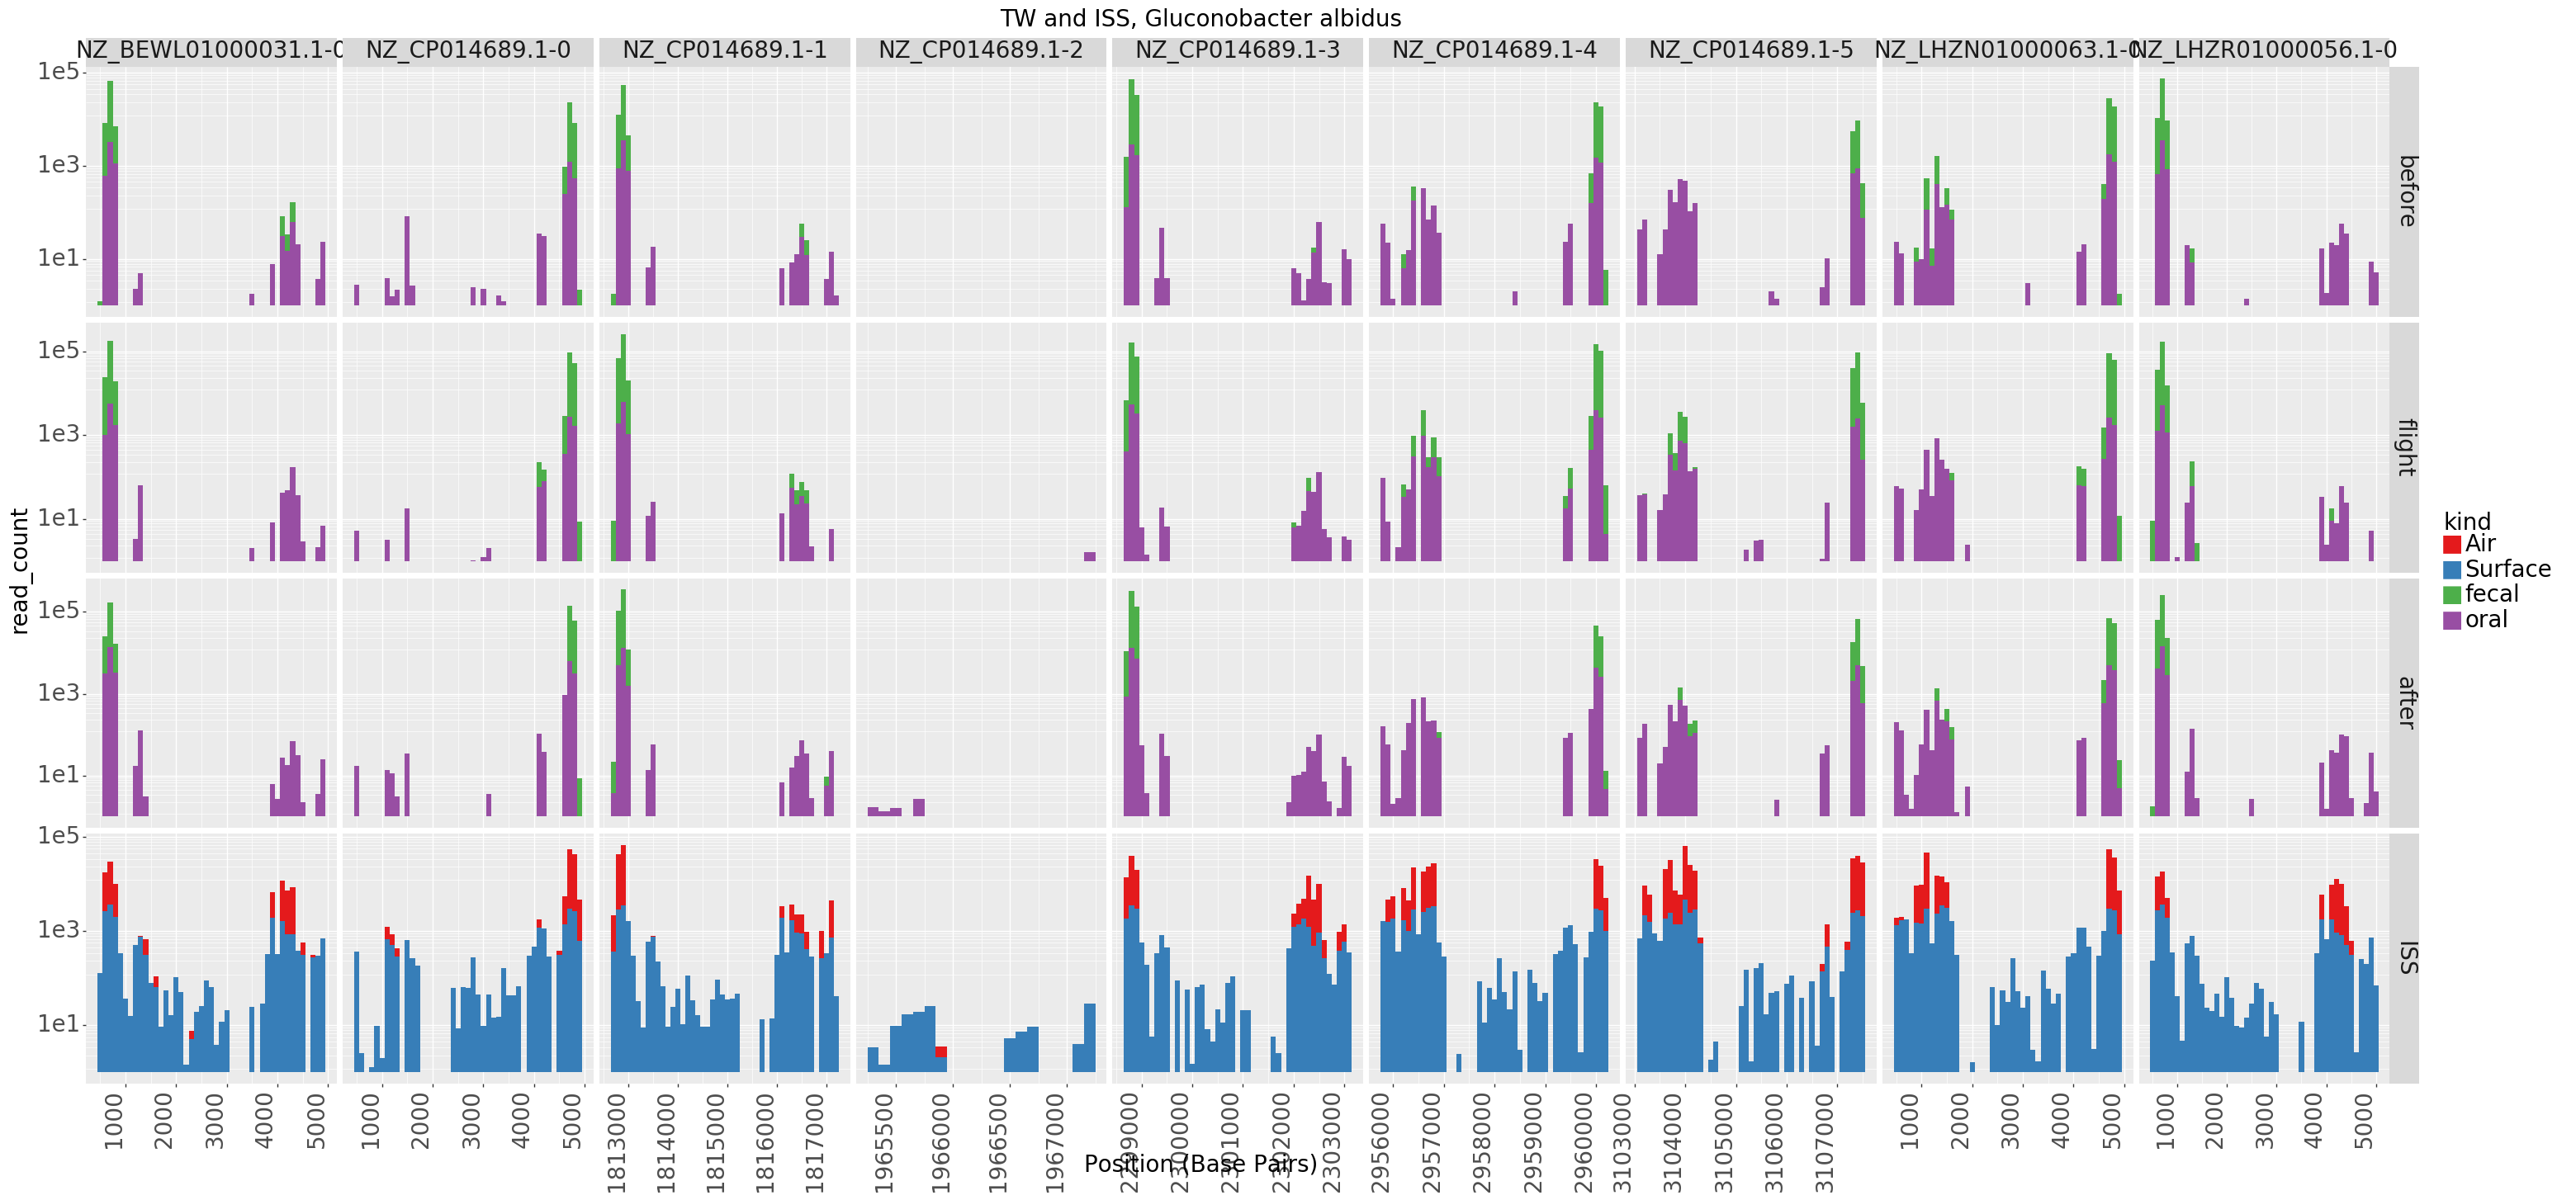

<ggplot: (-9223363303355291560)>

In [100]:
plot_organism('Gluconobacter albidus')

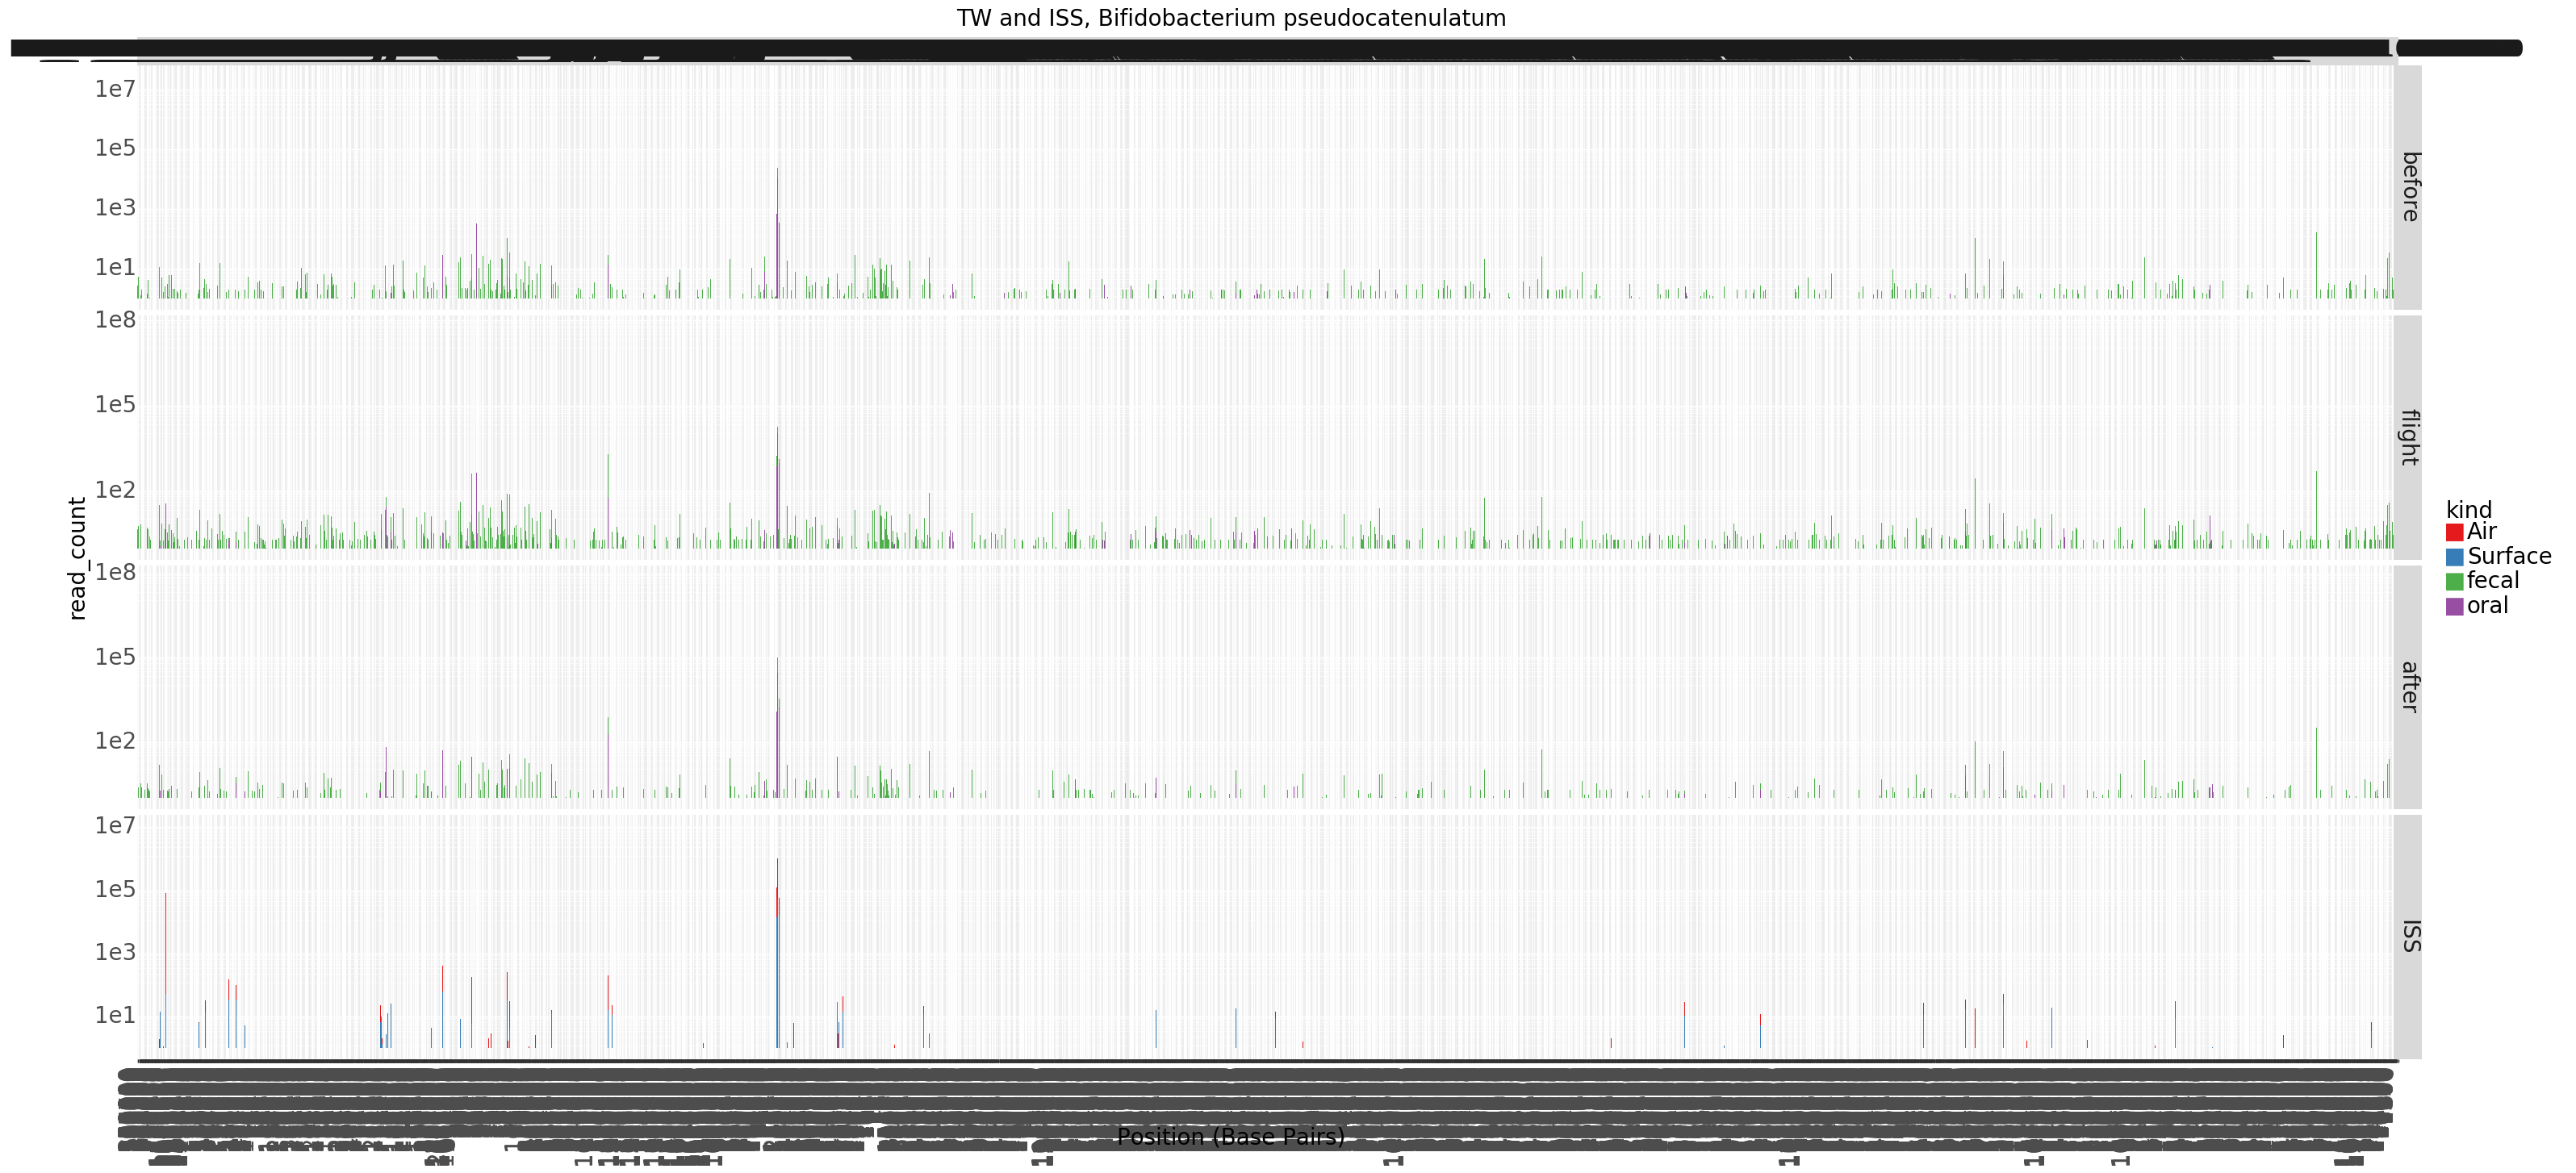

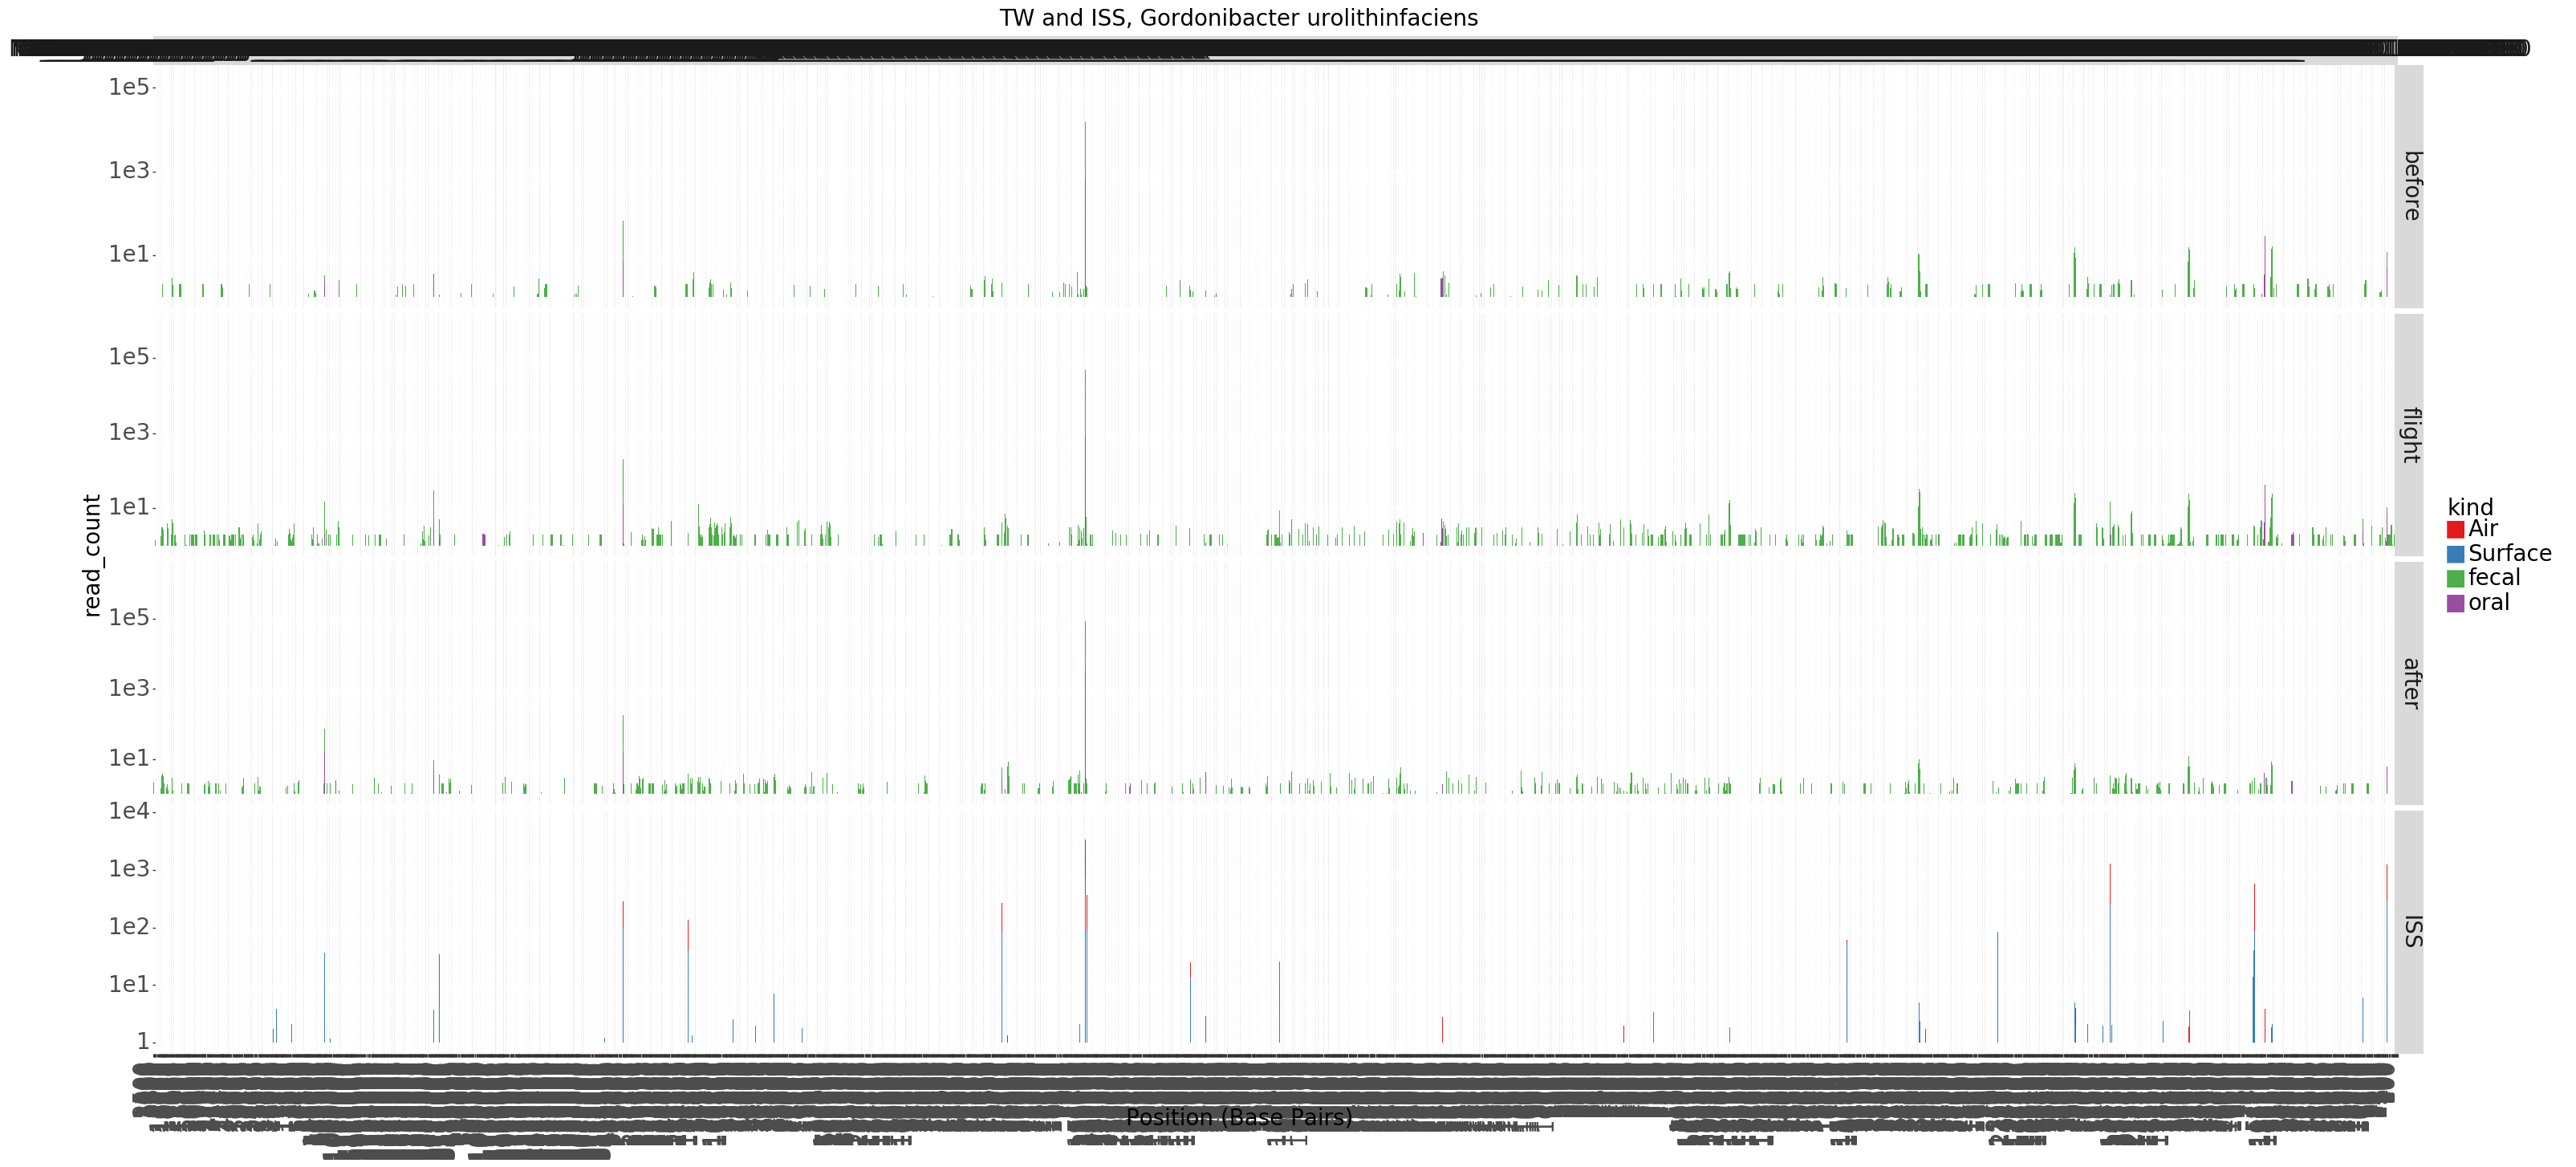

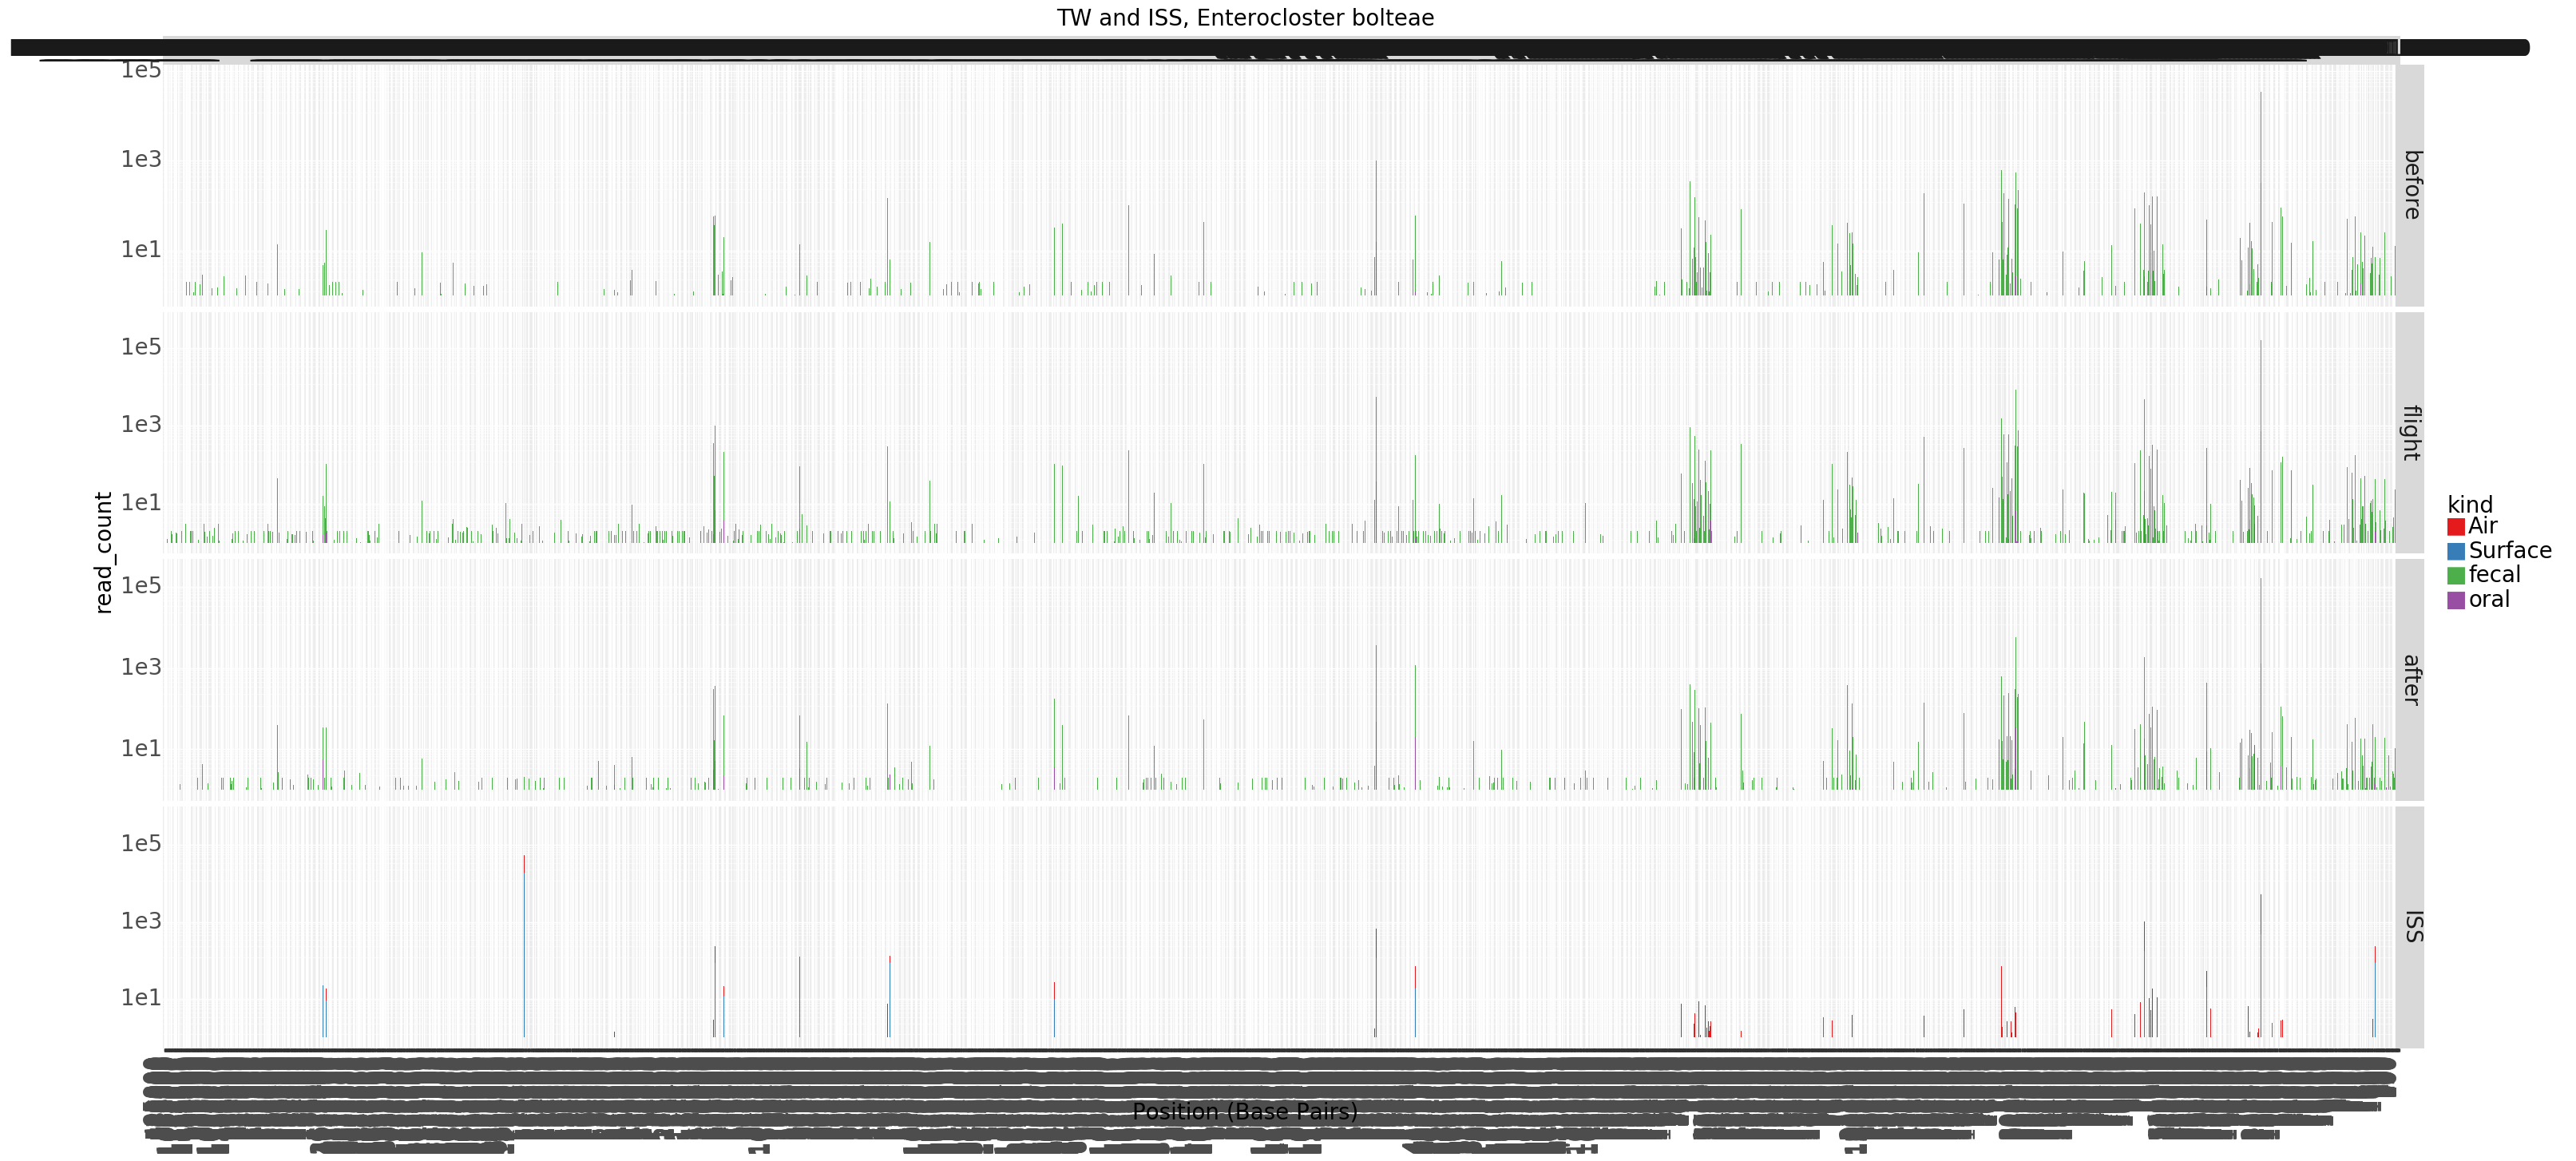

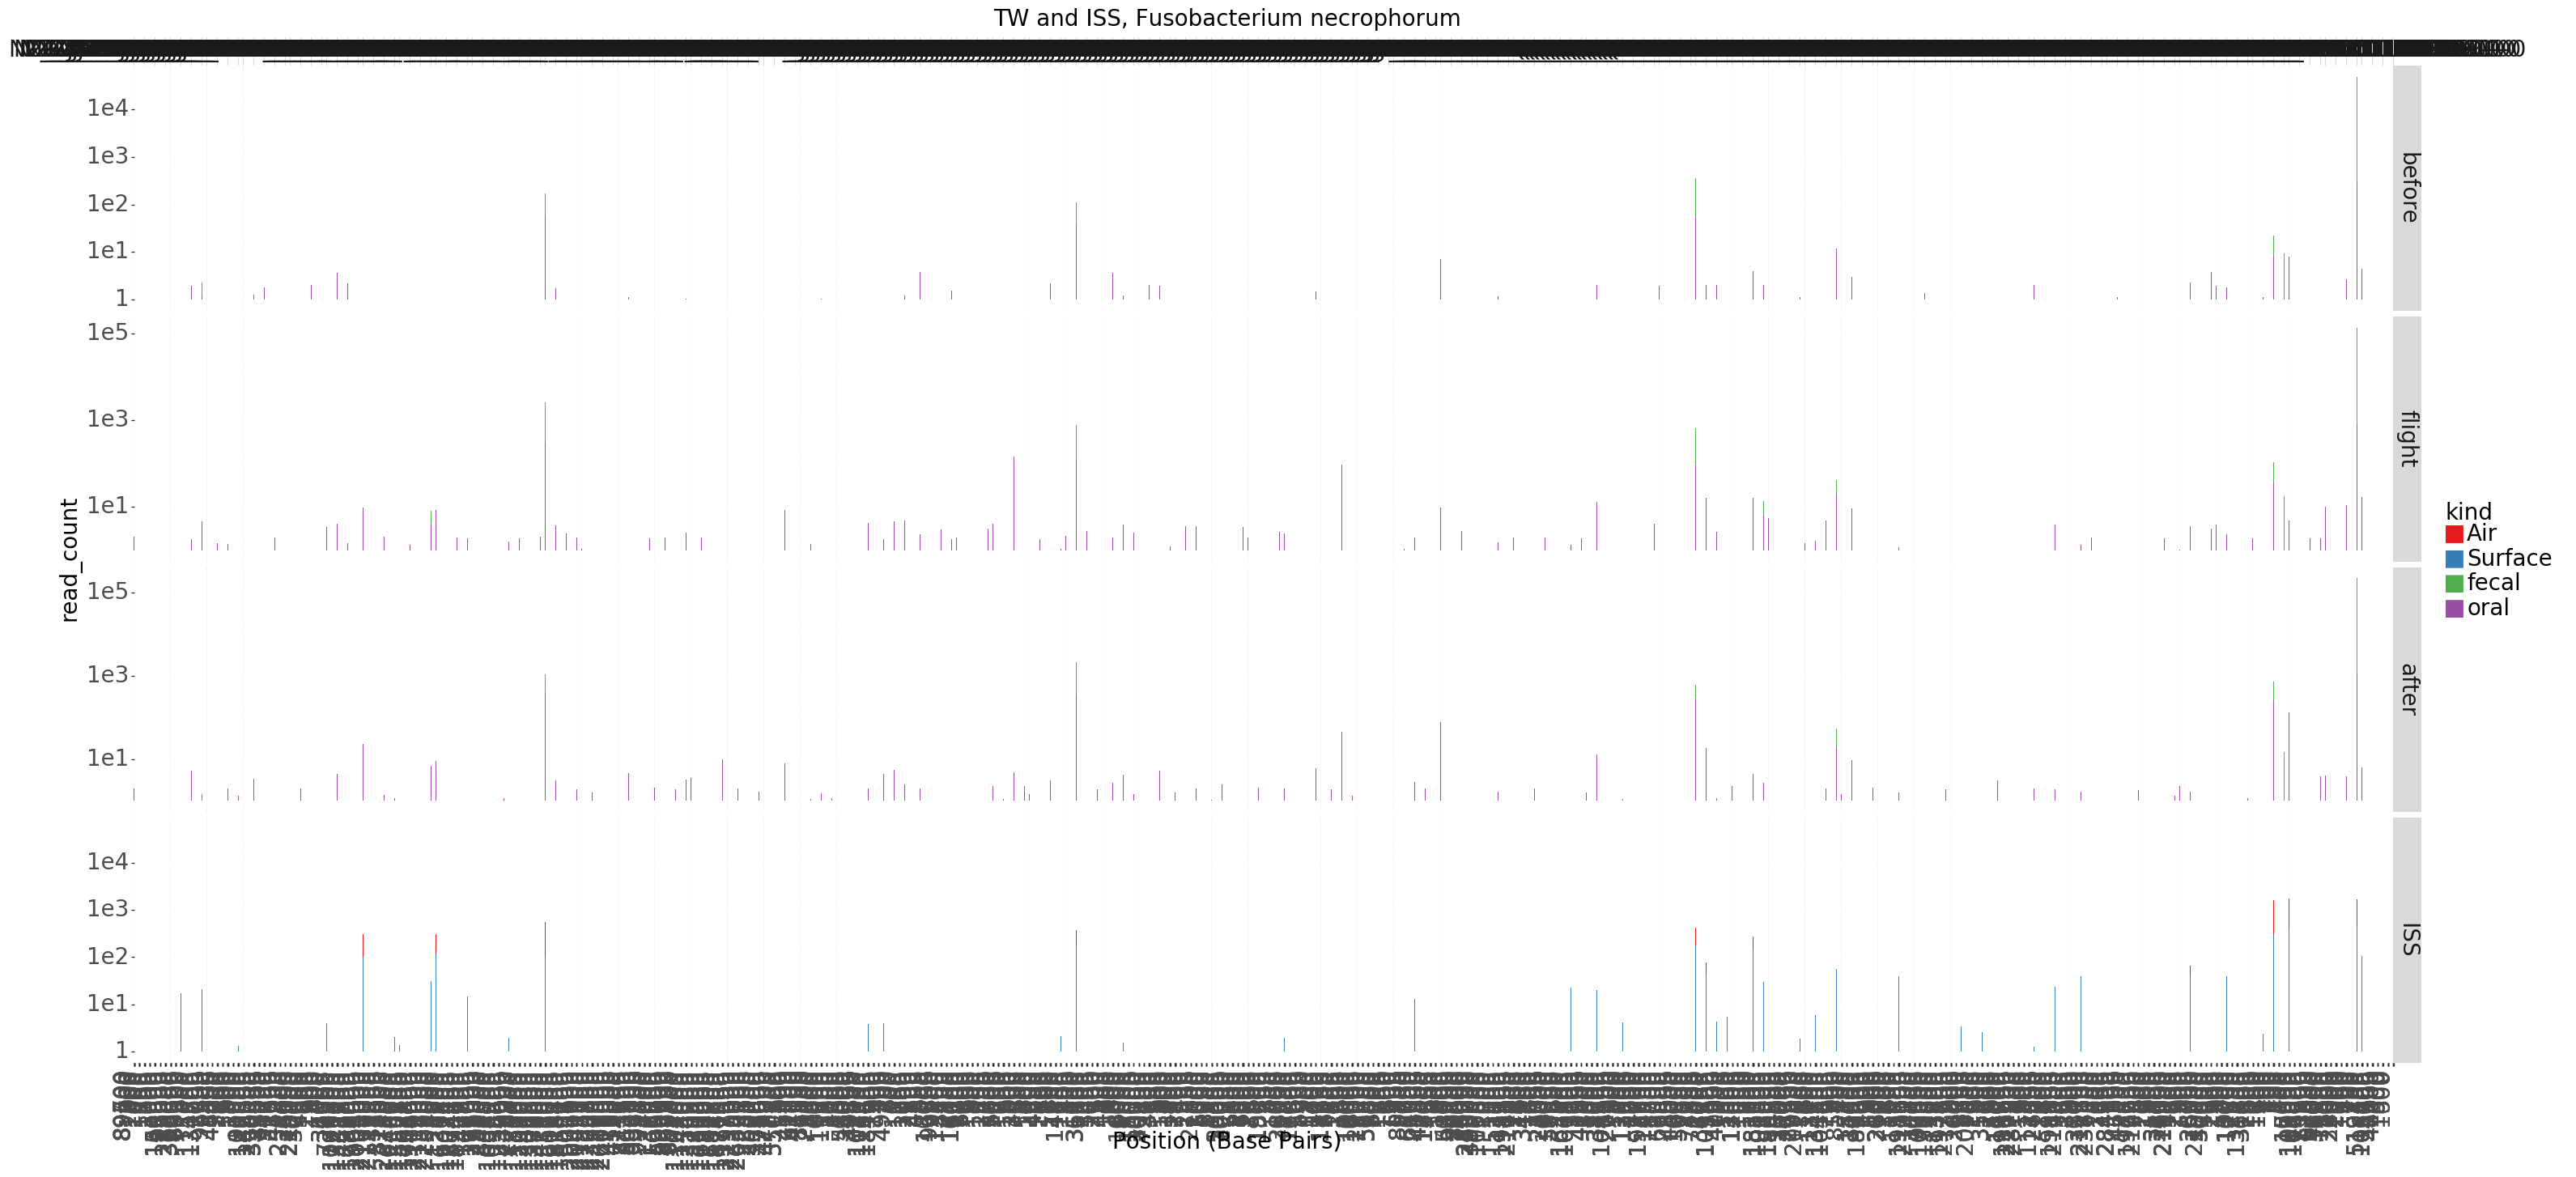

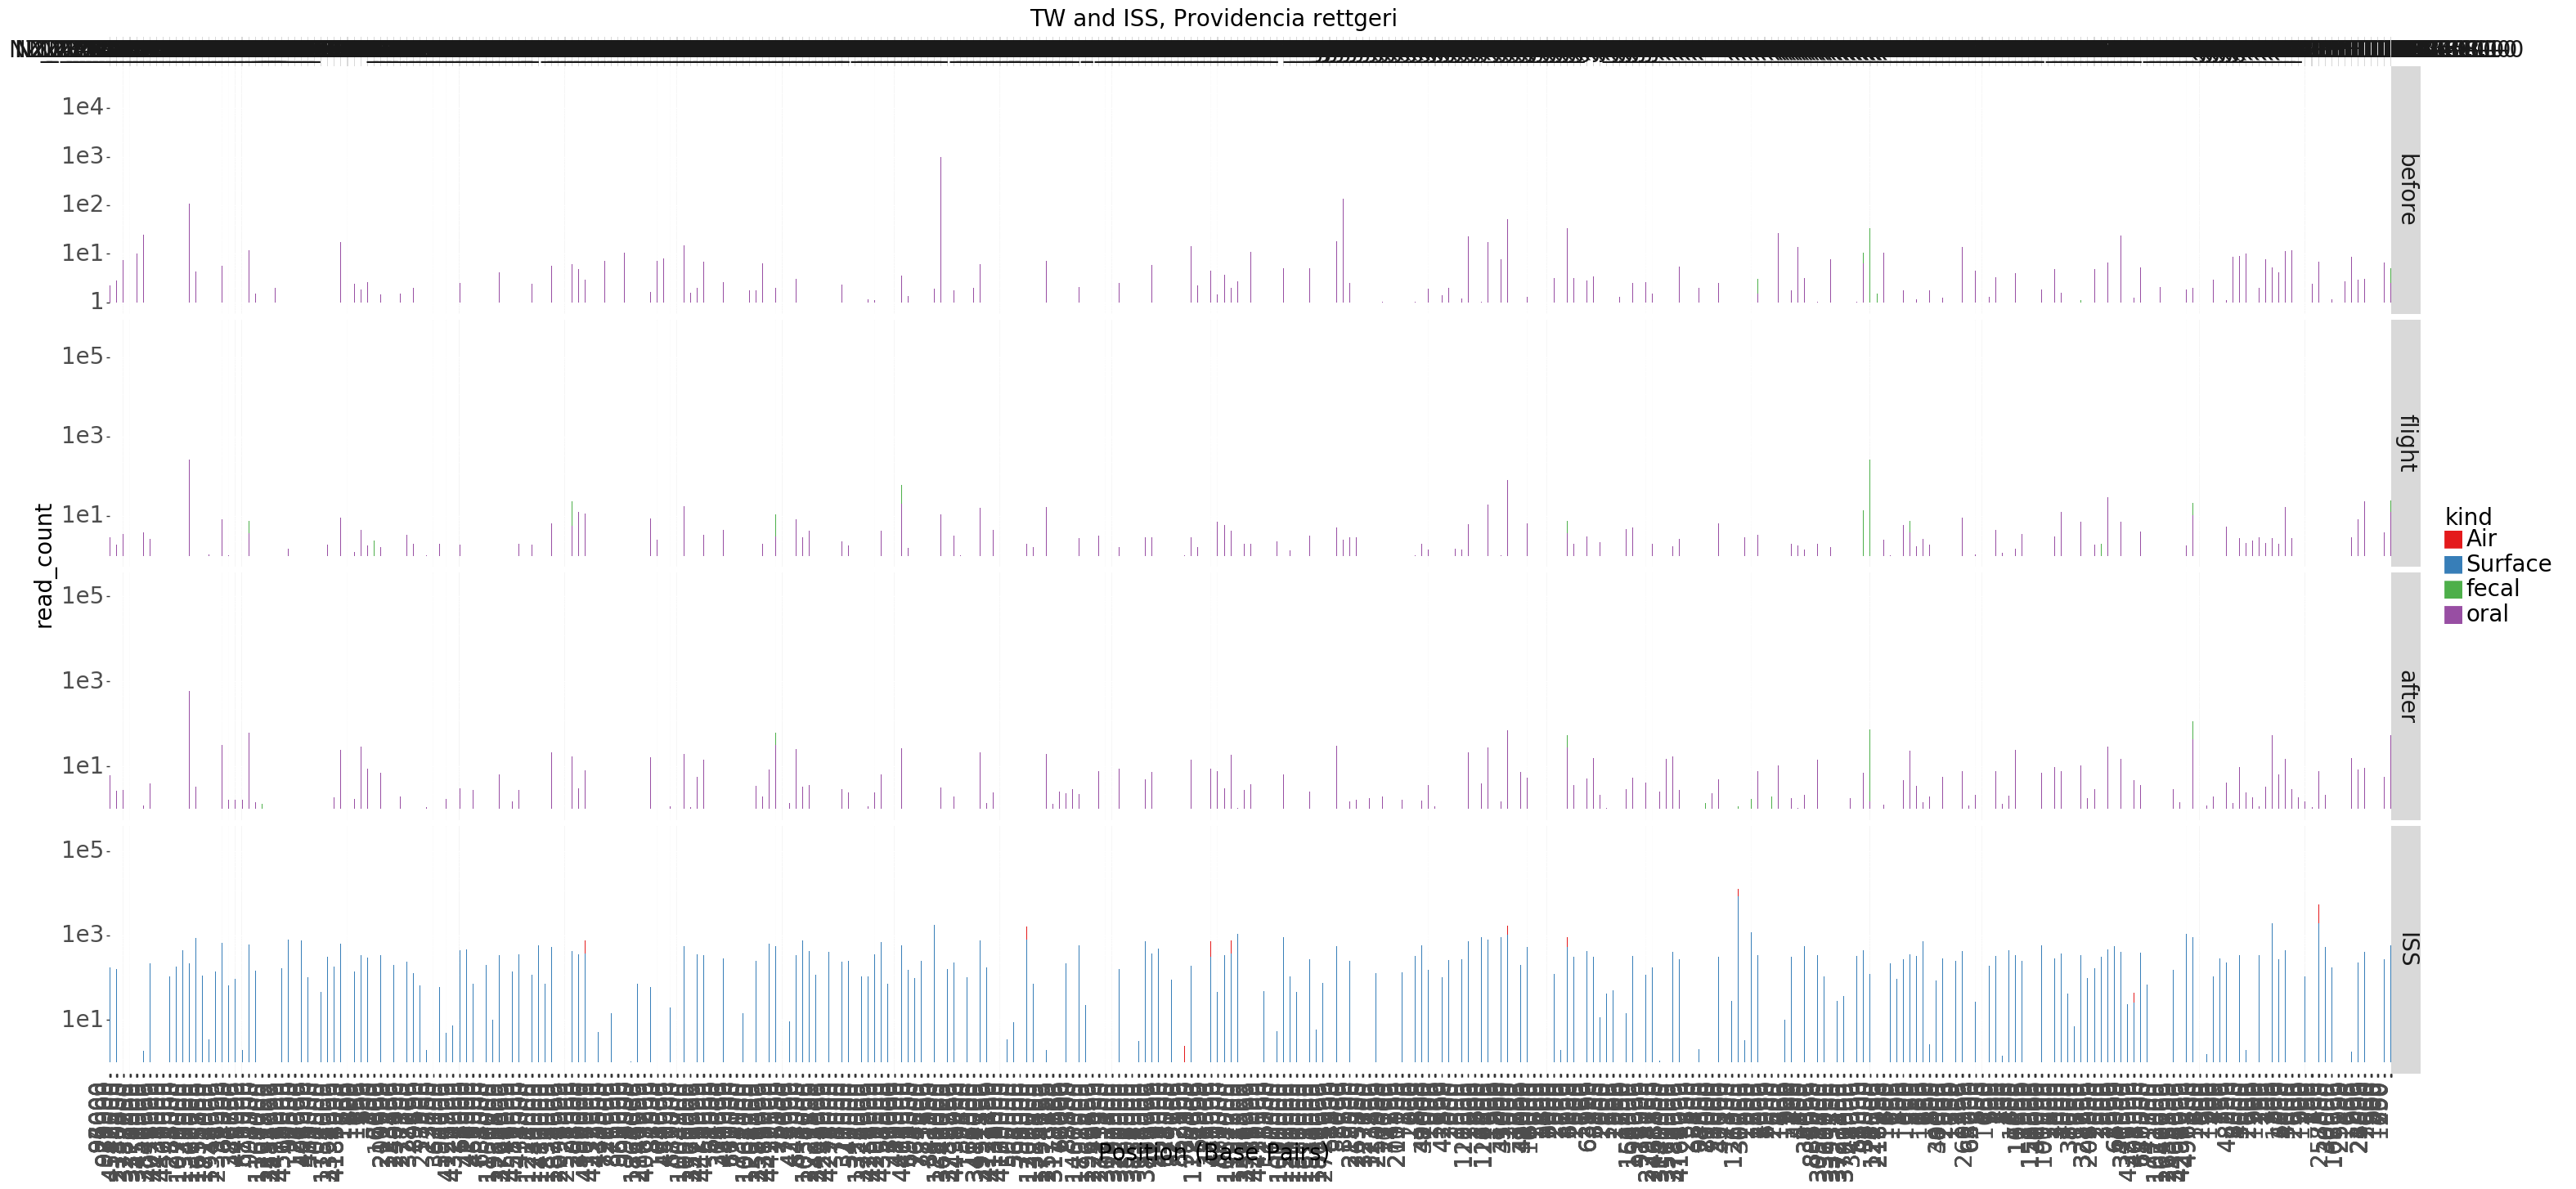

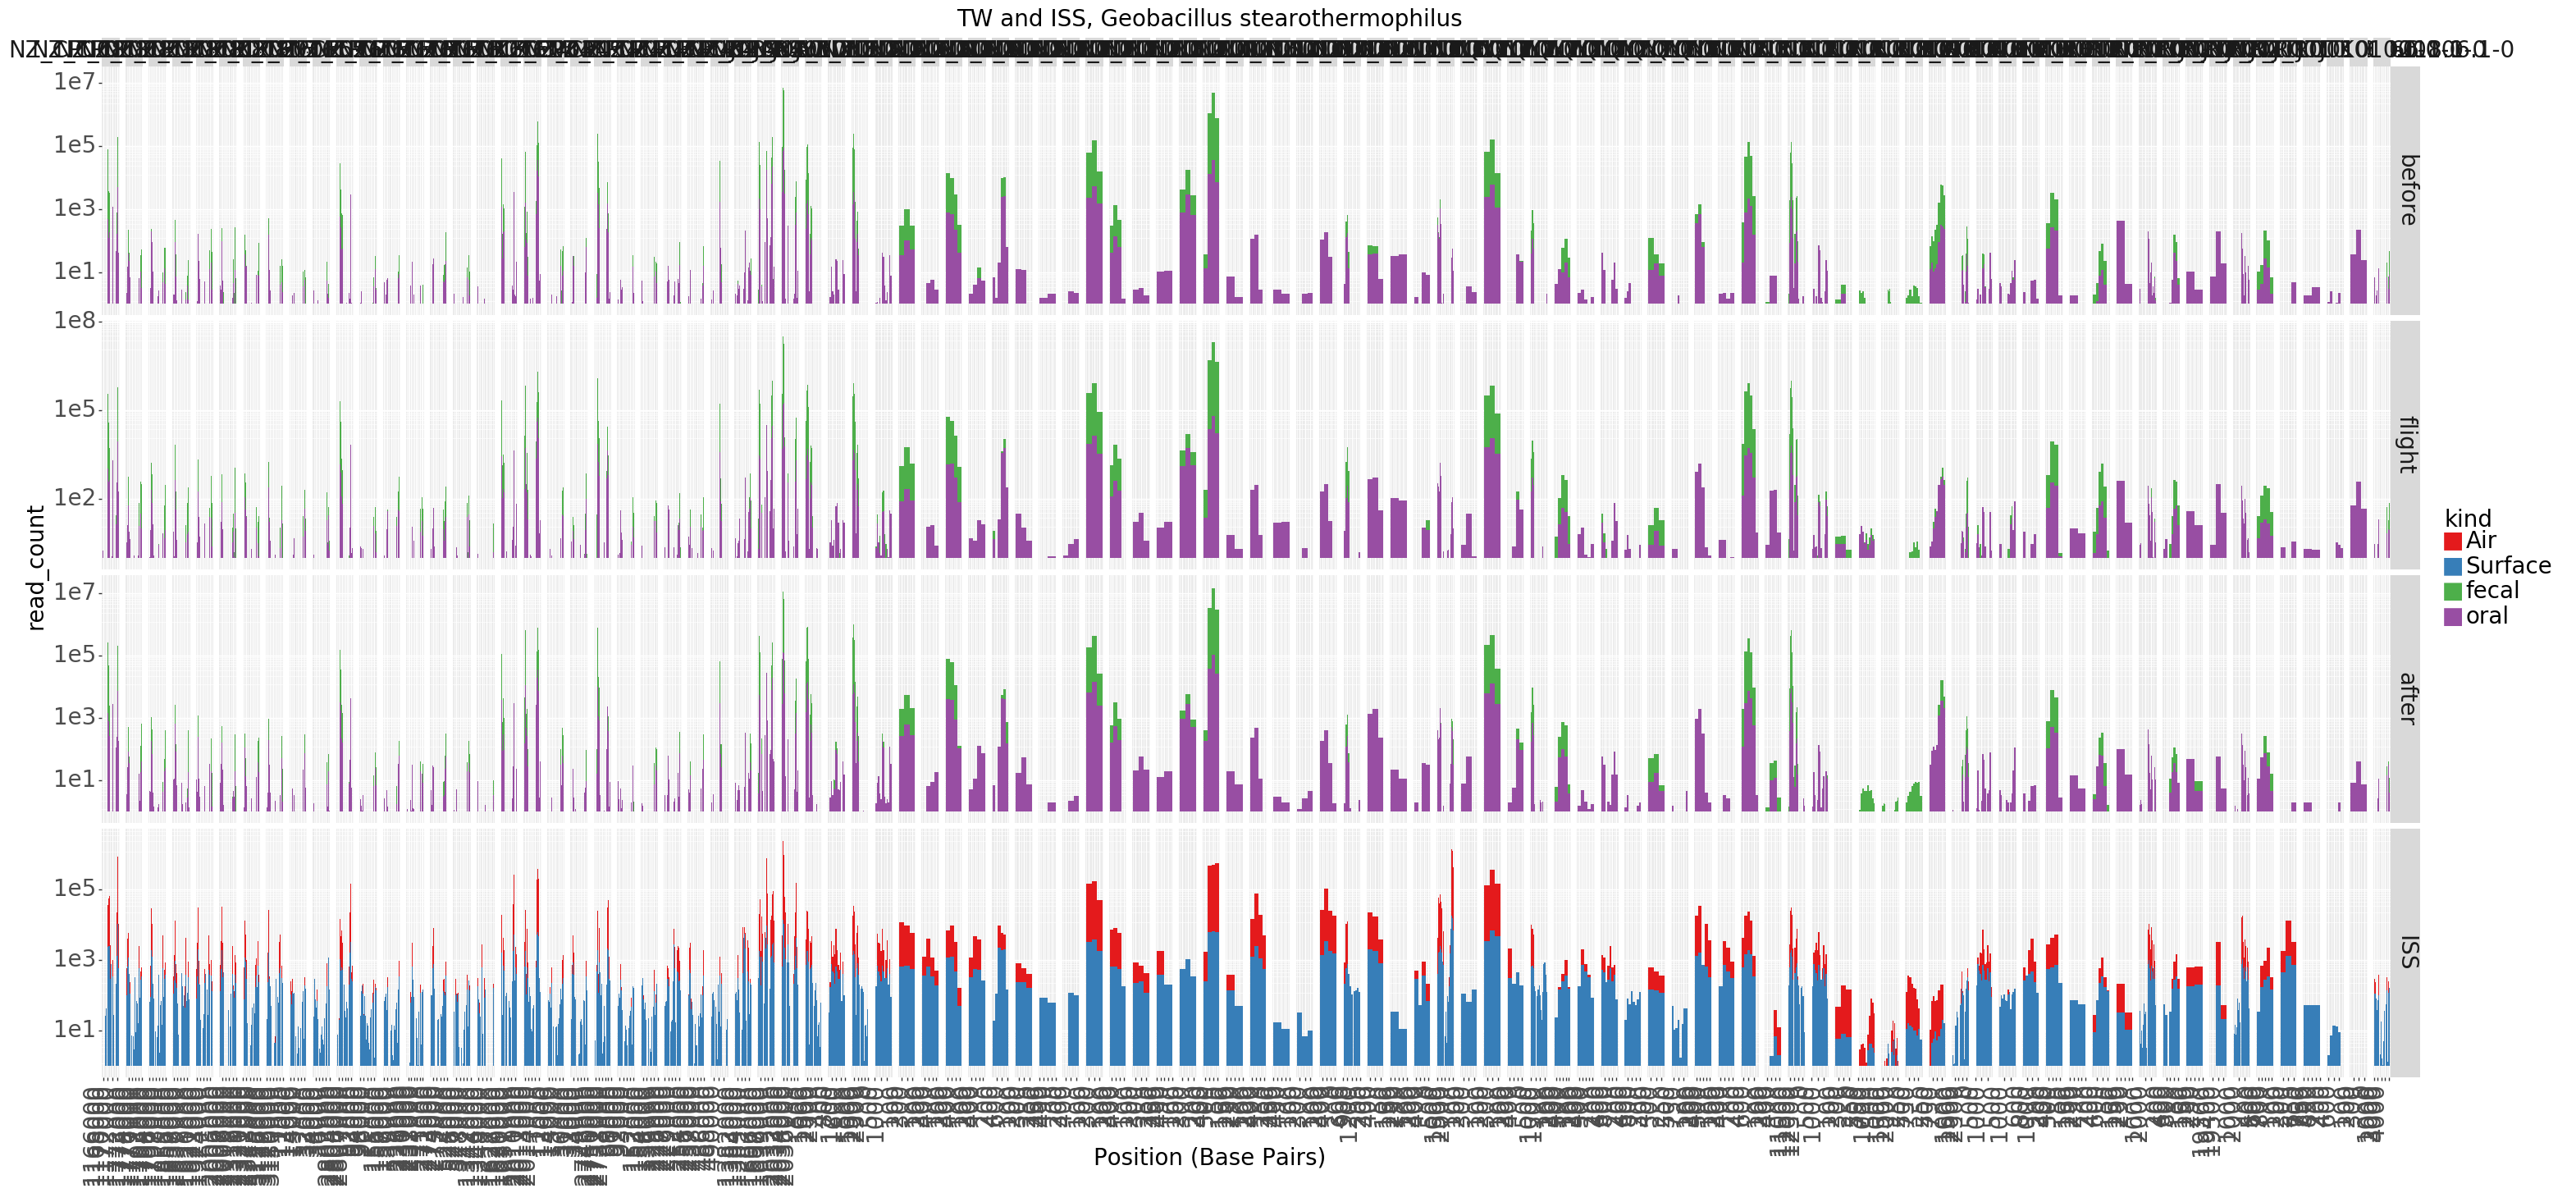

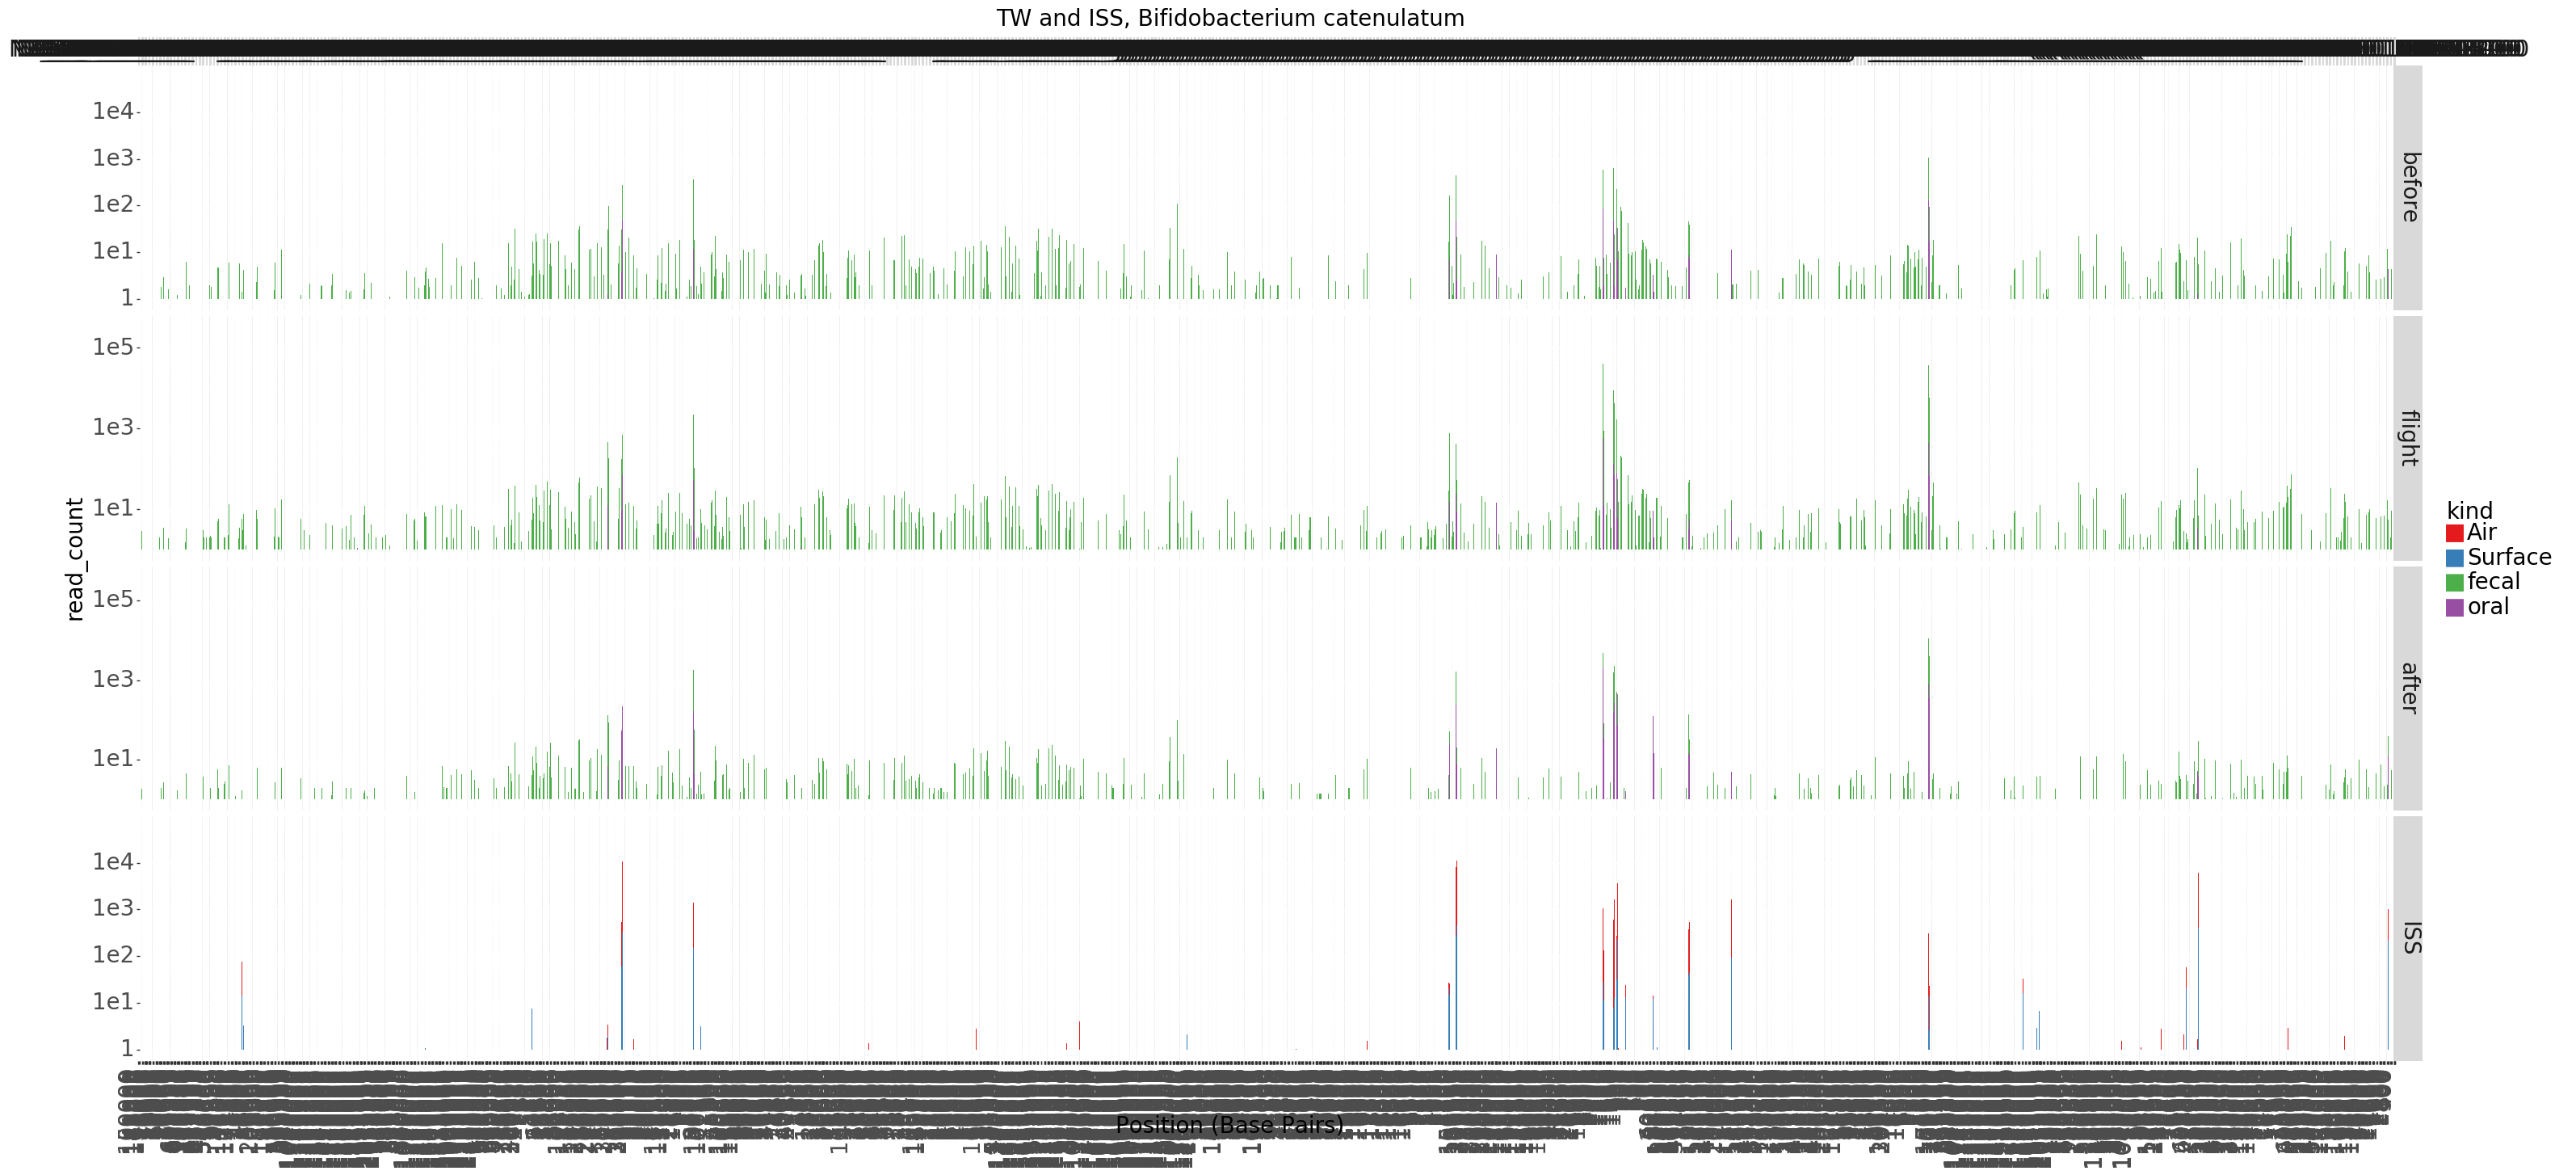

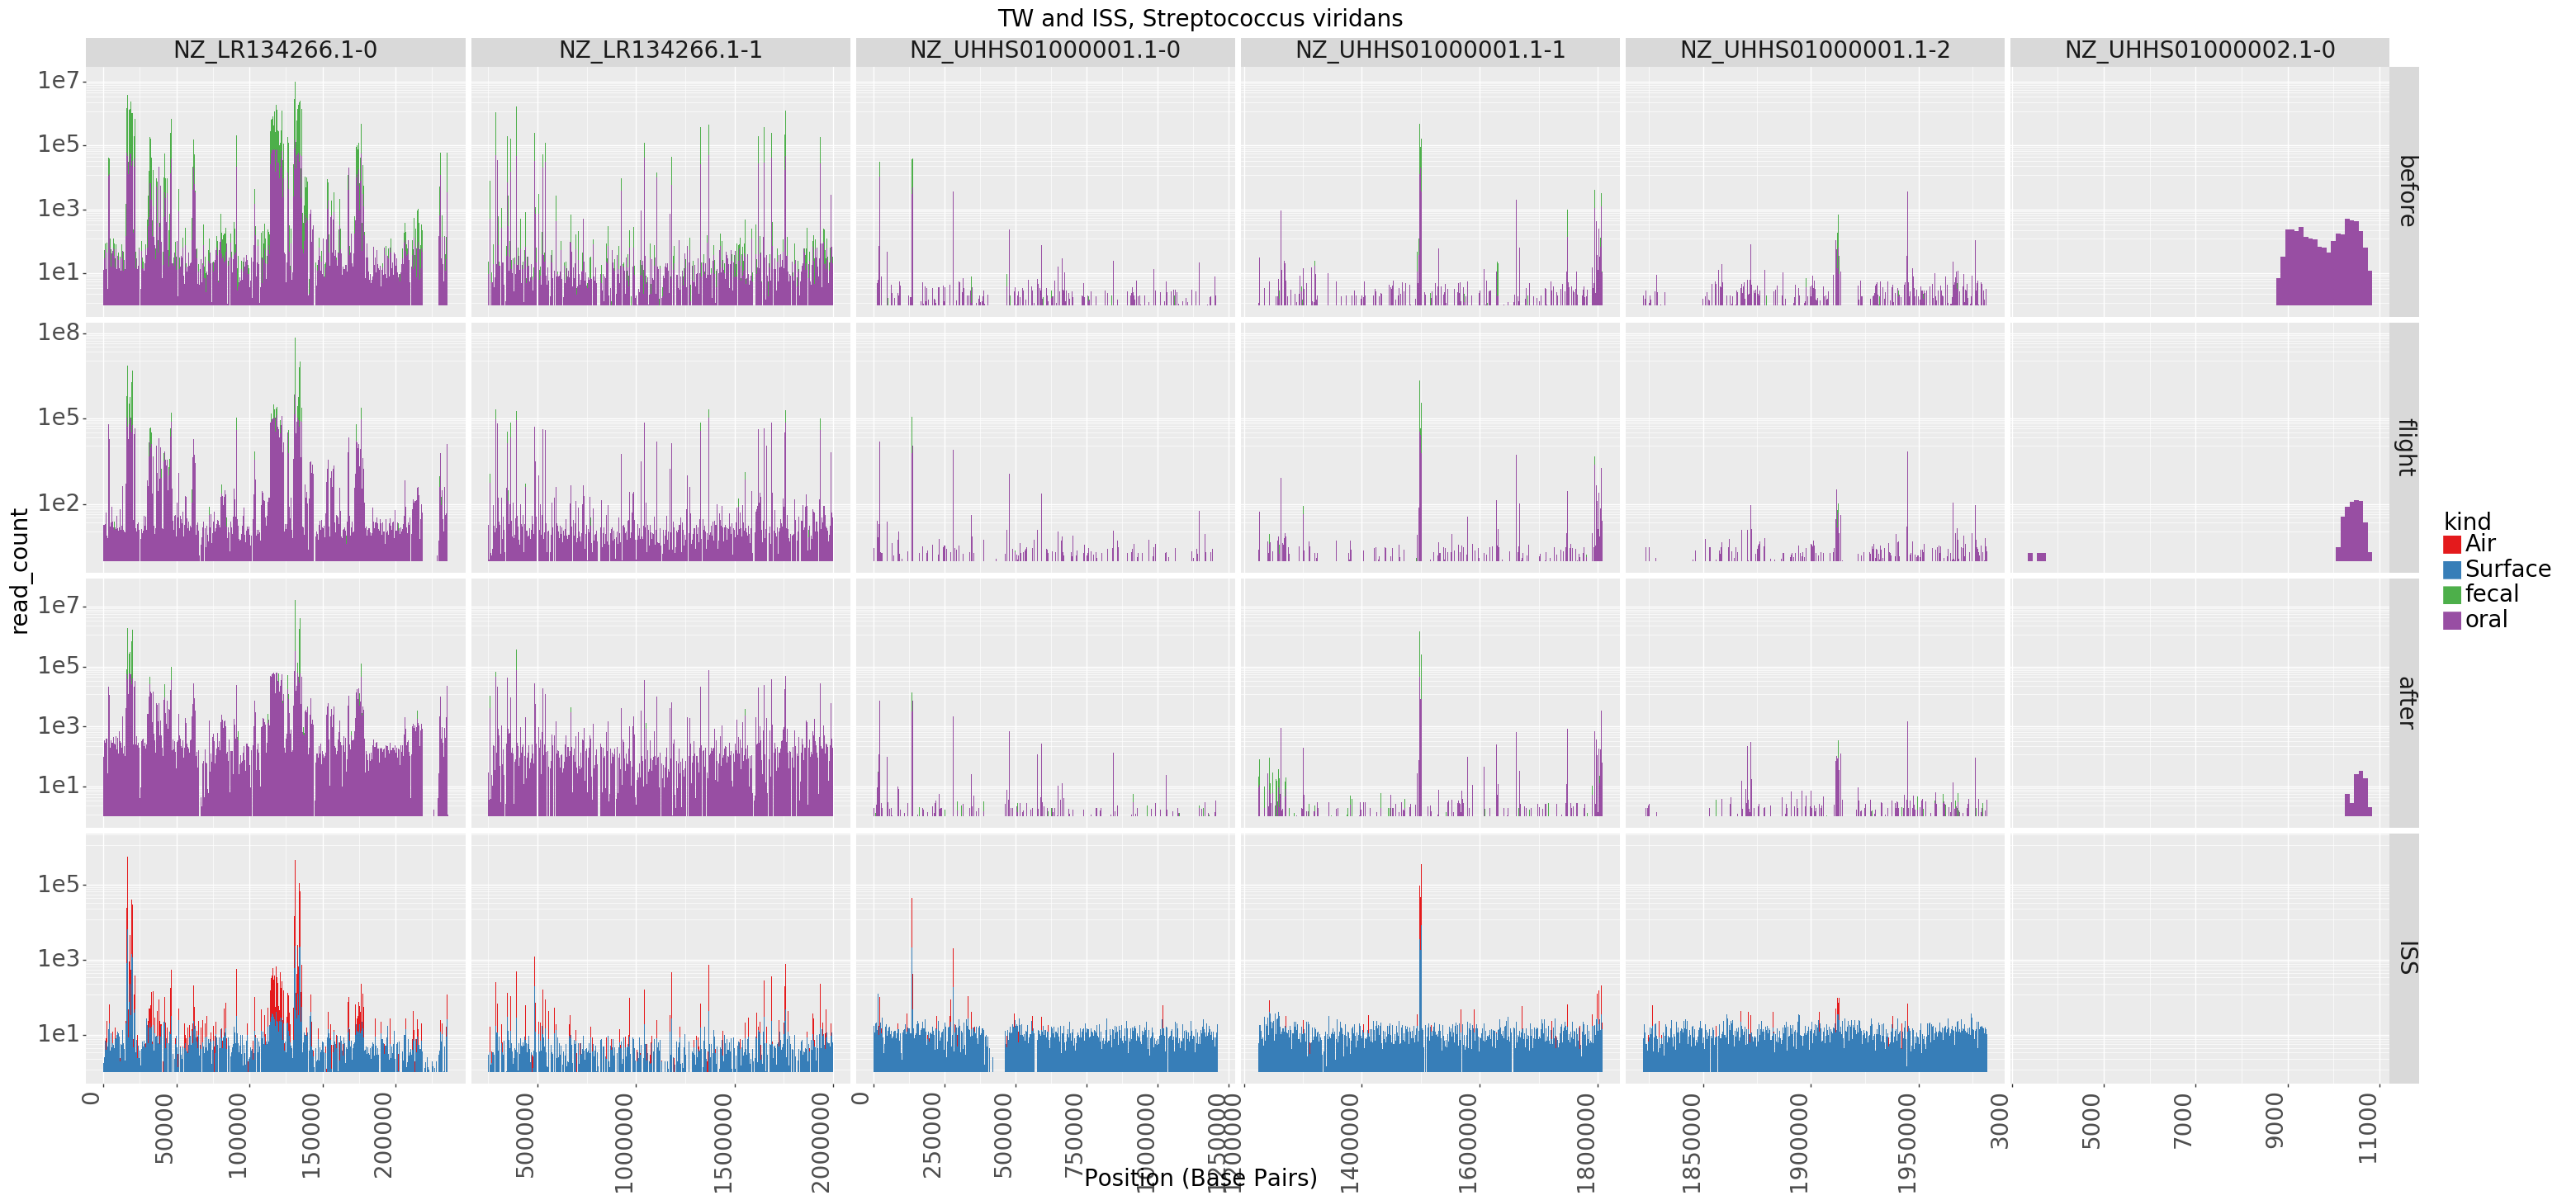

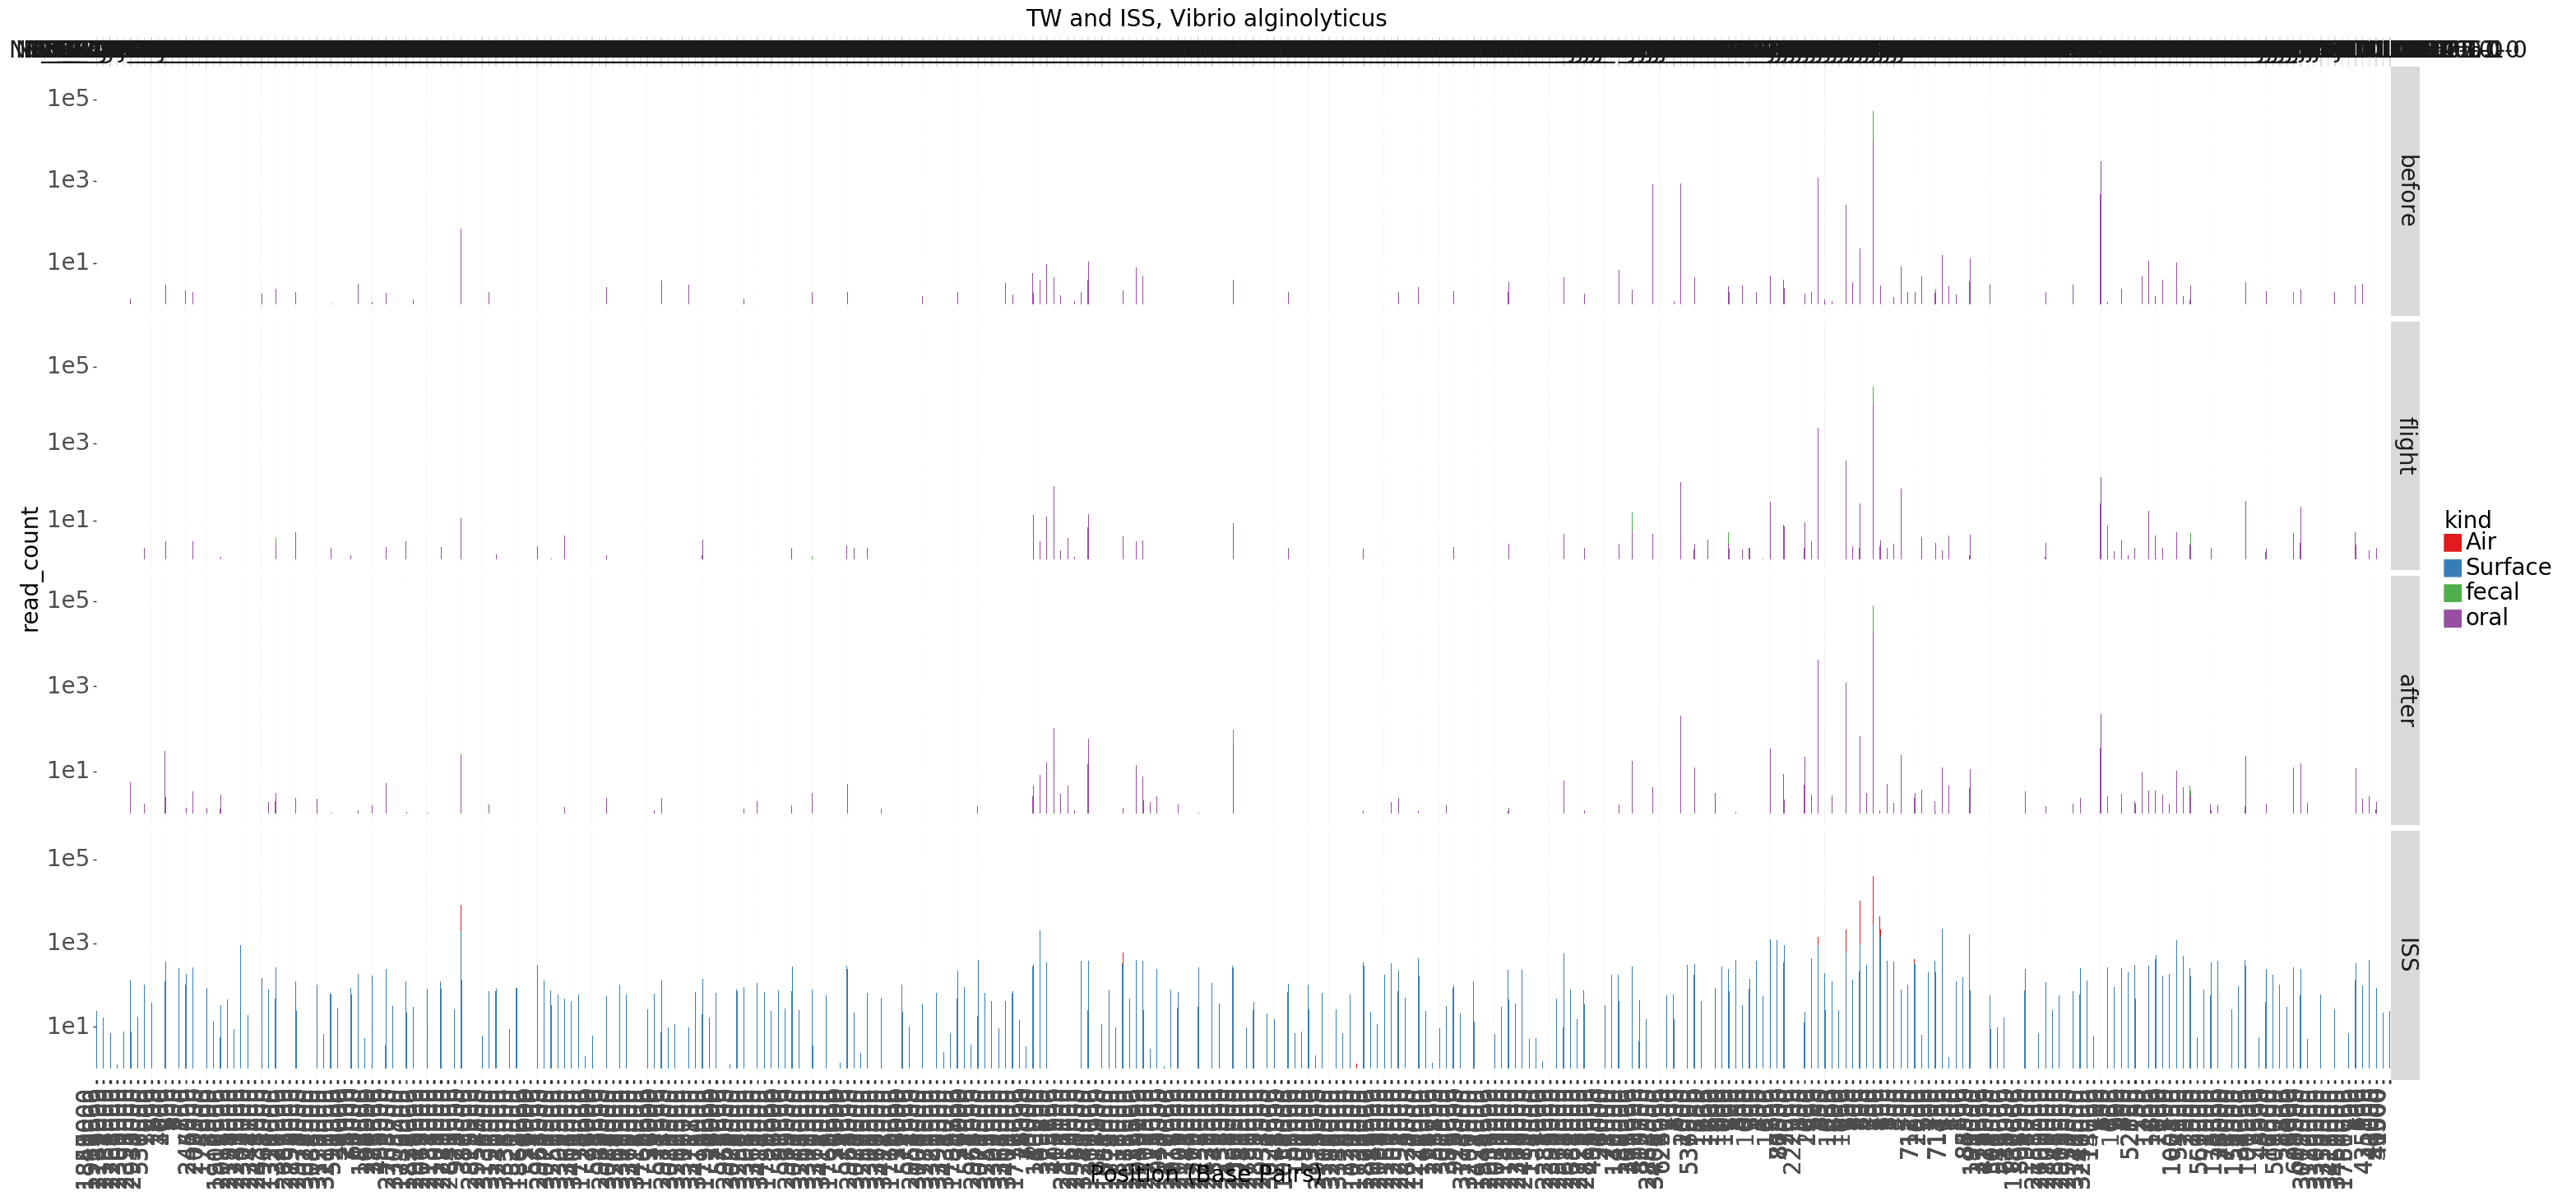

In [ ]:
organisms = list(counts['true_transfer'].sort_values(ascending=False).head(10).index)
plots = [plot_organism(org) for org in organisms]

plots

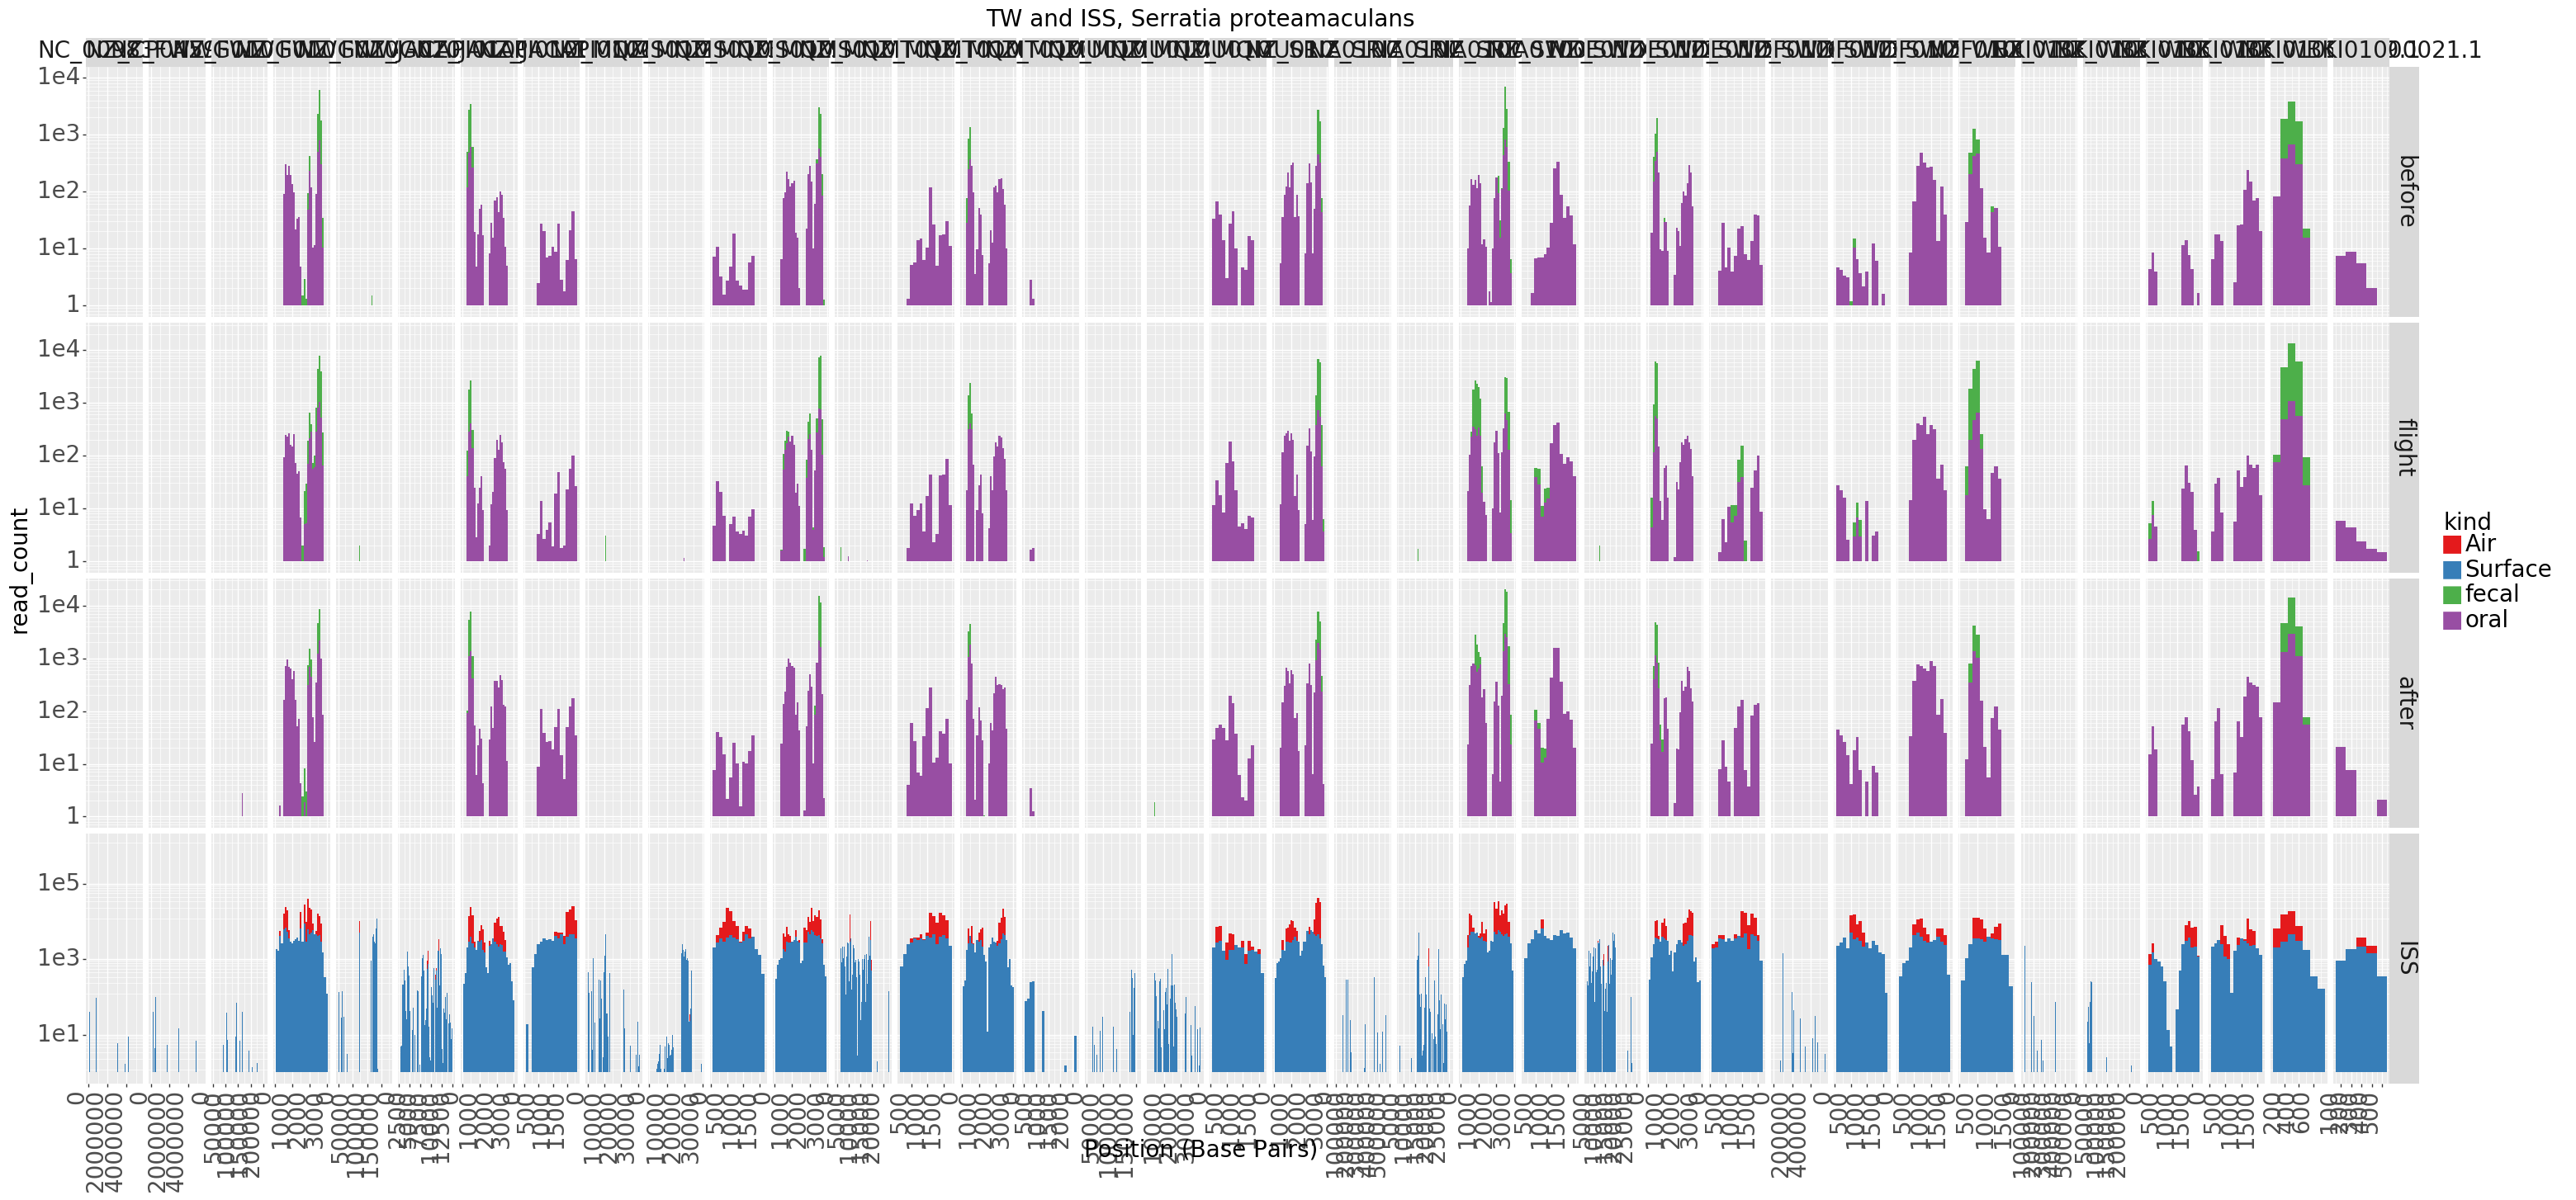

<ggplot: (-9223363302725354622)>

In [26]:
plot_organism('Serratia proteamaculans')

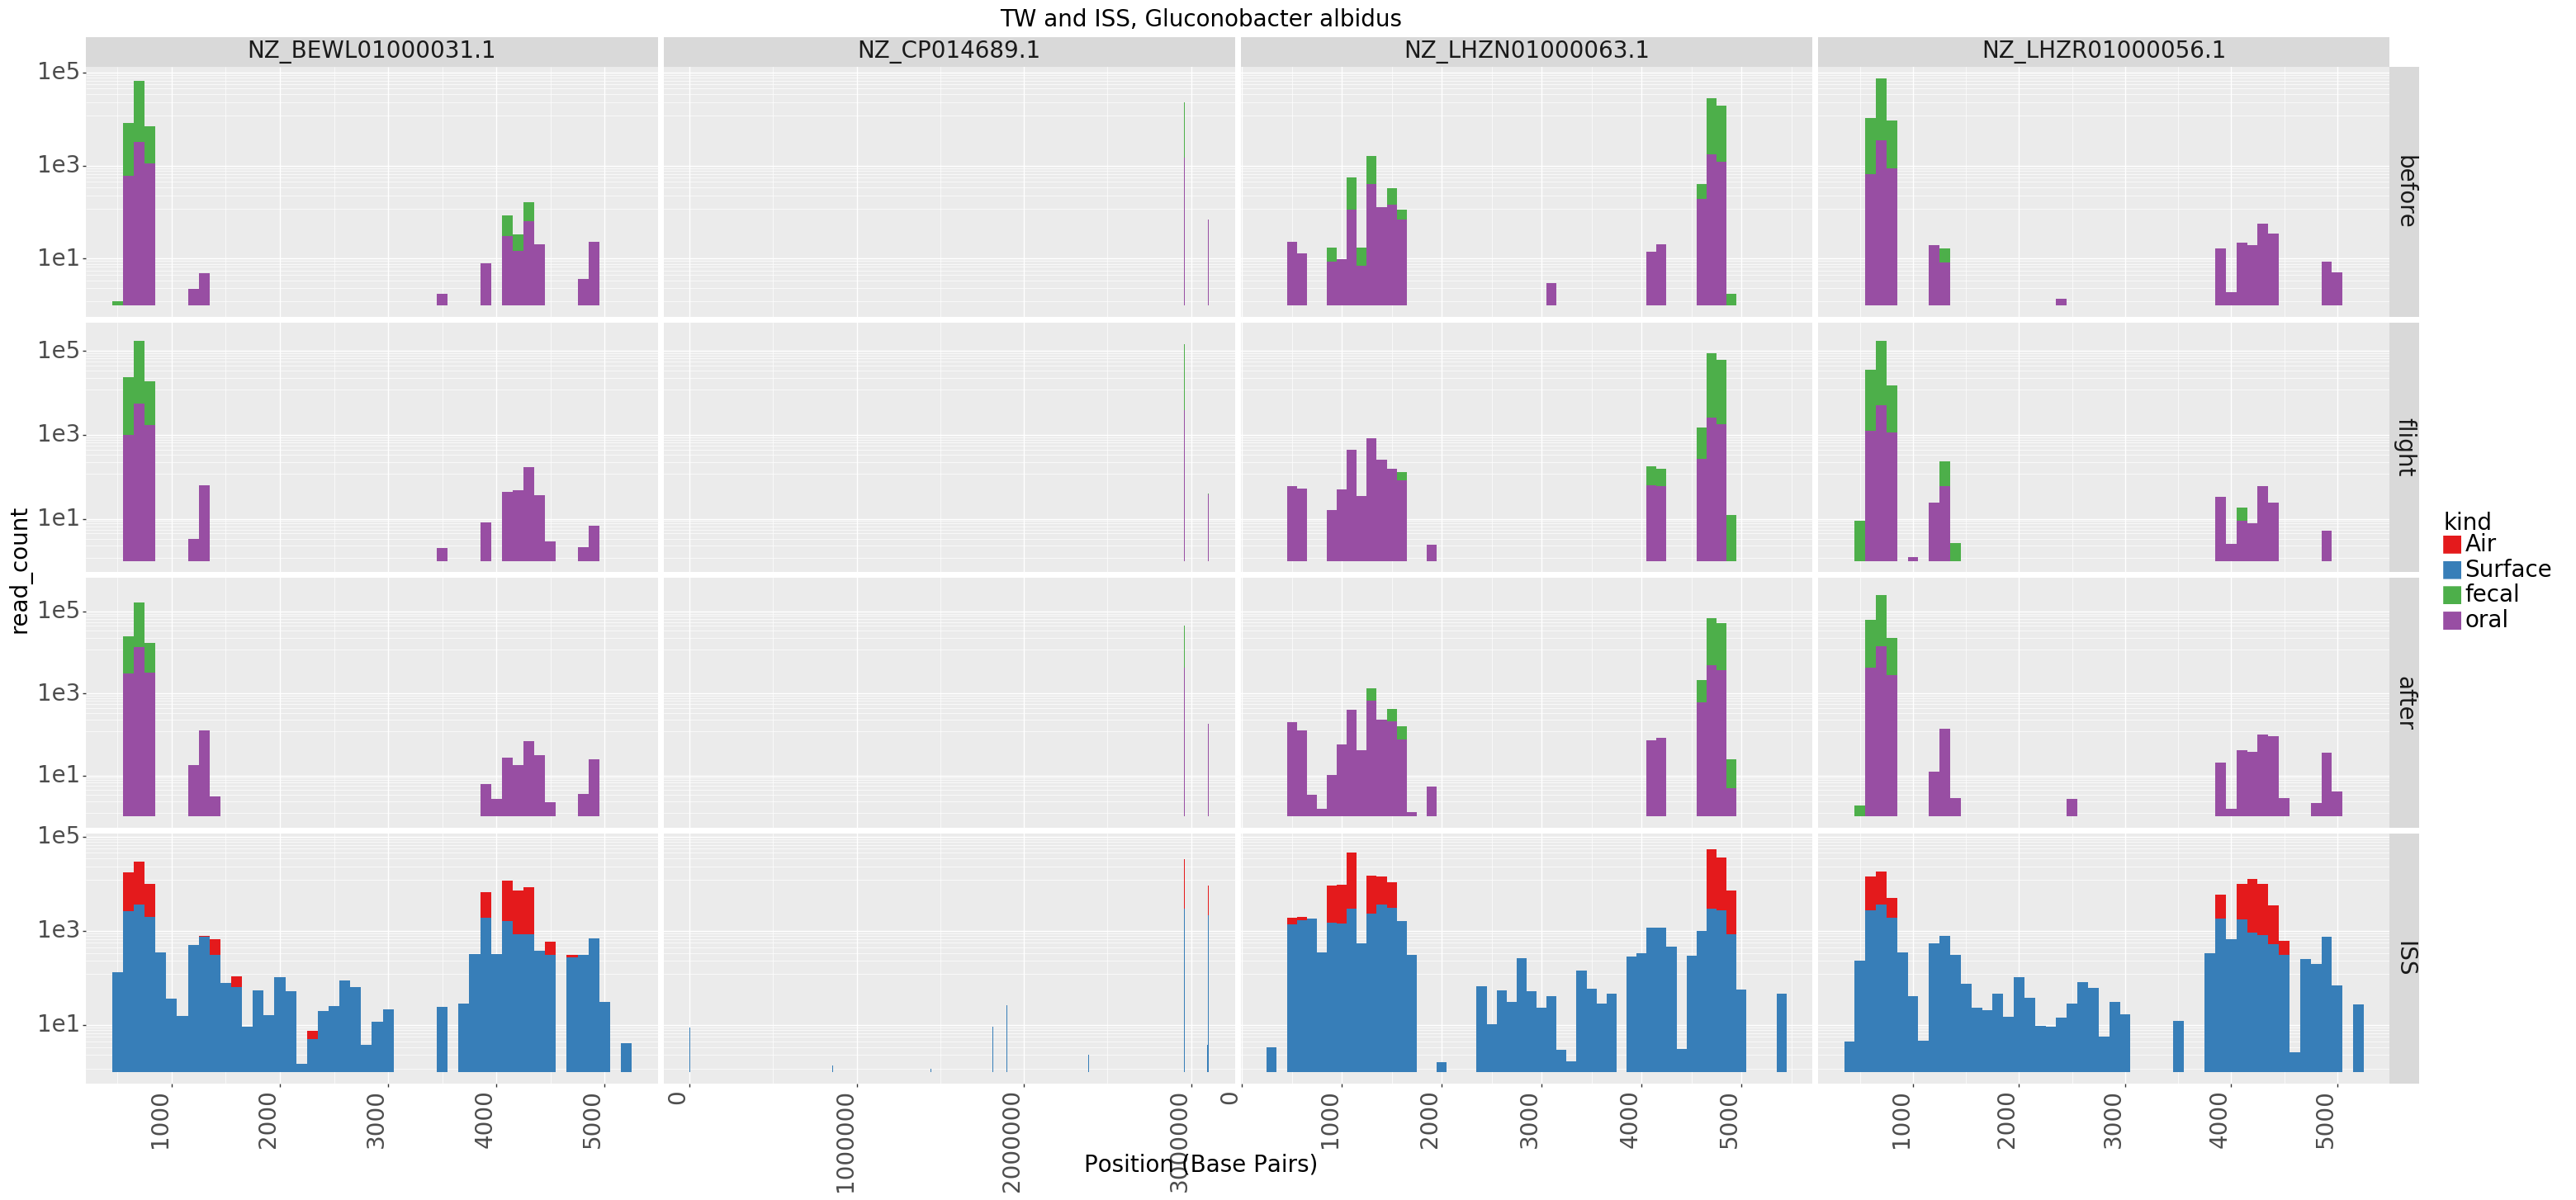

<ggplot: (8734116472654)>

In [25]:
plot_organism('Gluconobacter albidus')

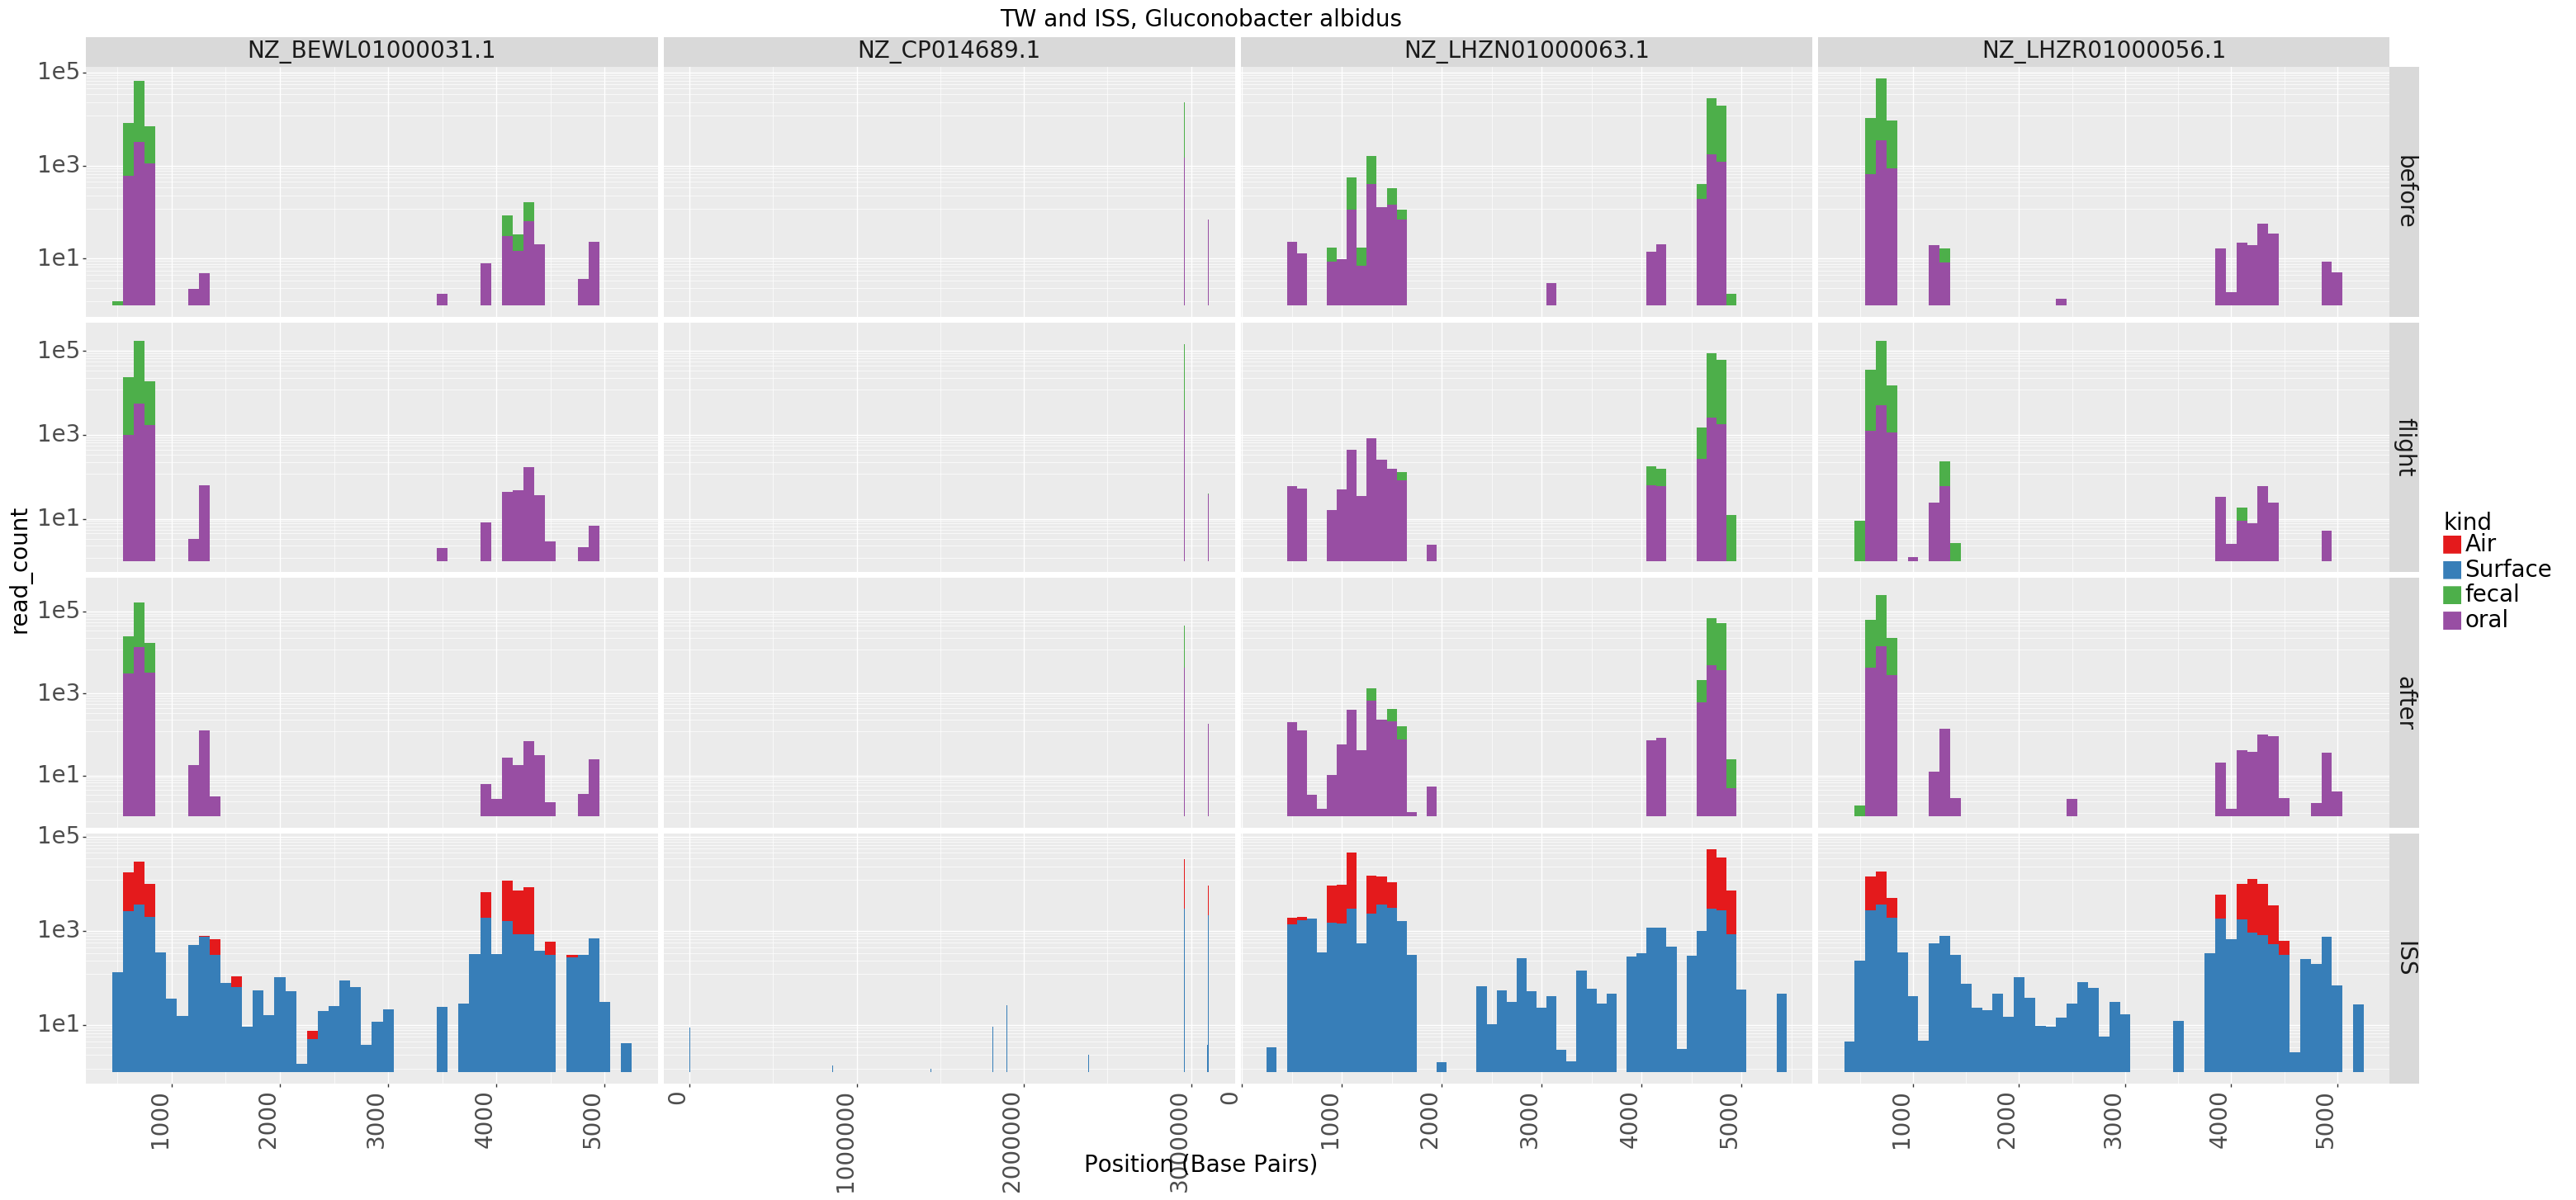

<ggplot: (-9223363302747995346)>

In [19]:
plot_organism('Gluconobacter albidus')

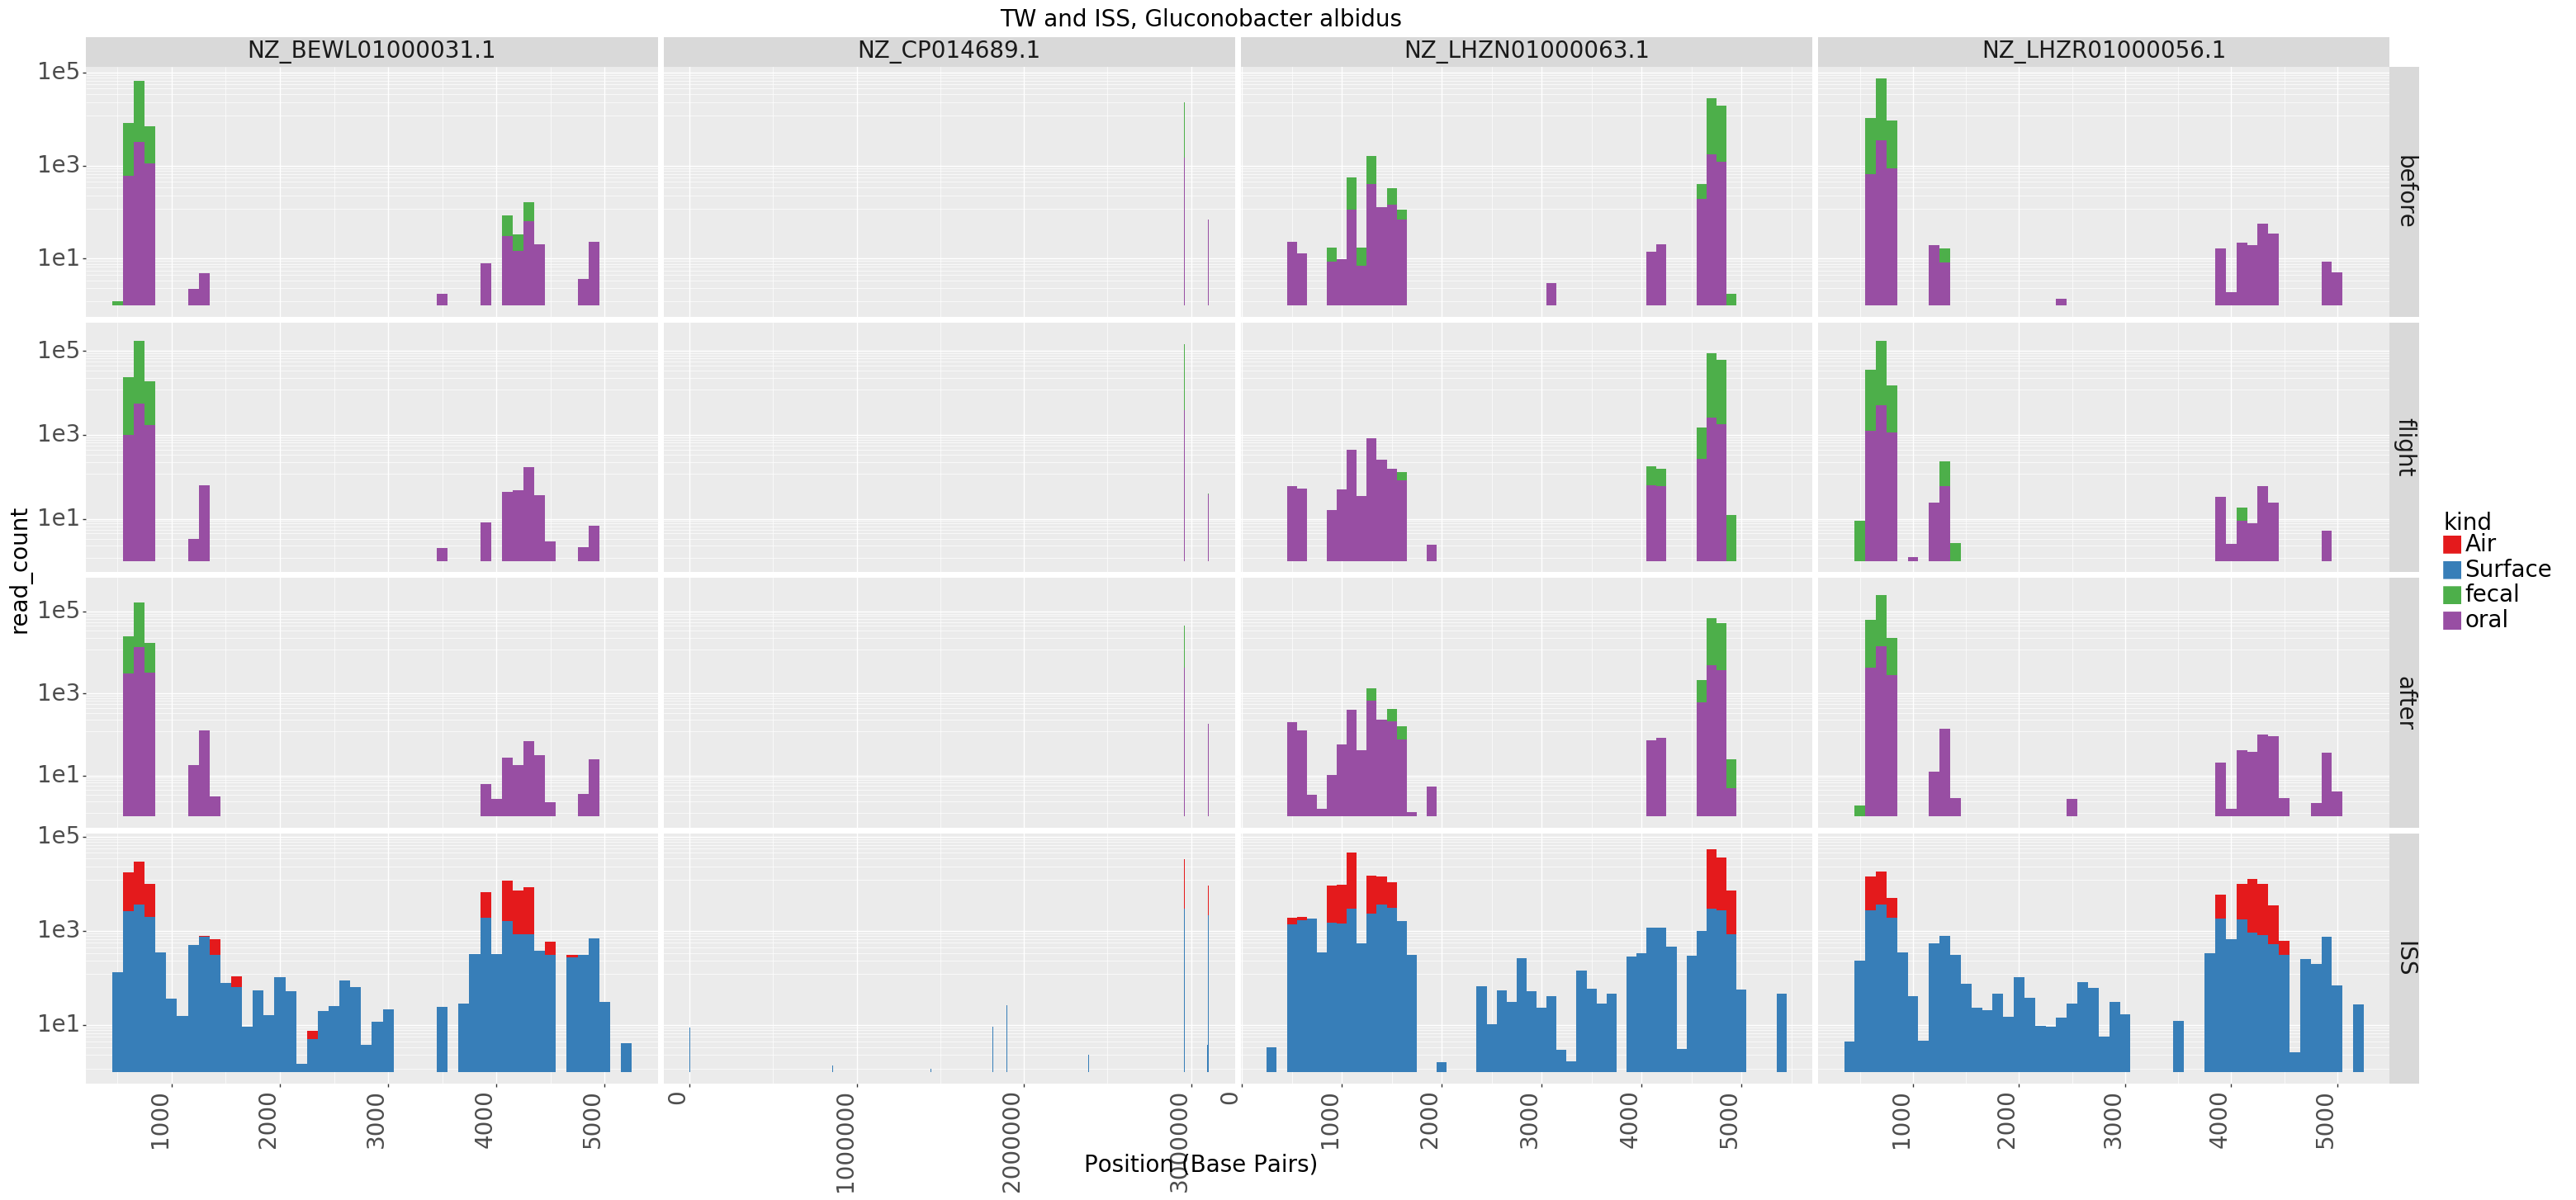

<ggplot: (8734123954559)>

In [15]:
plot_organism('Gluconobacter albidus')

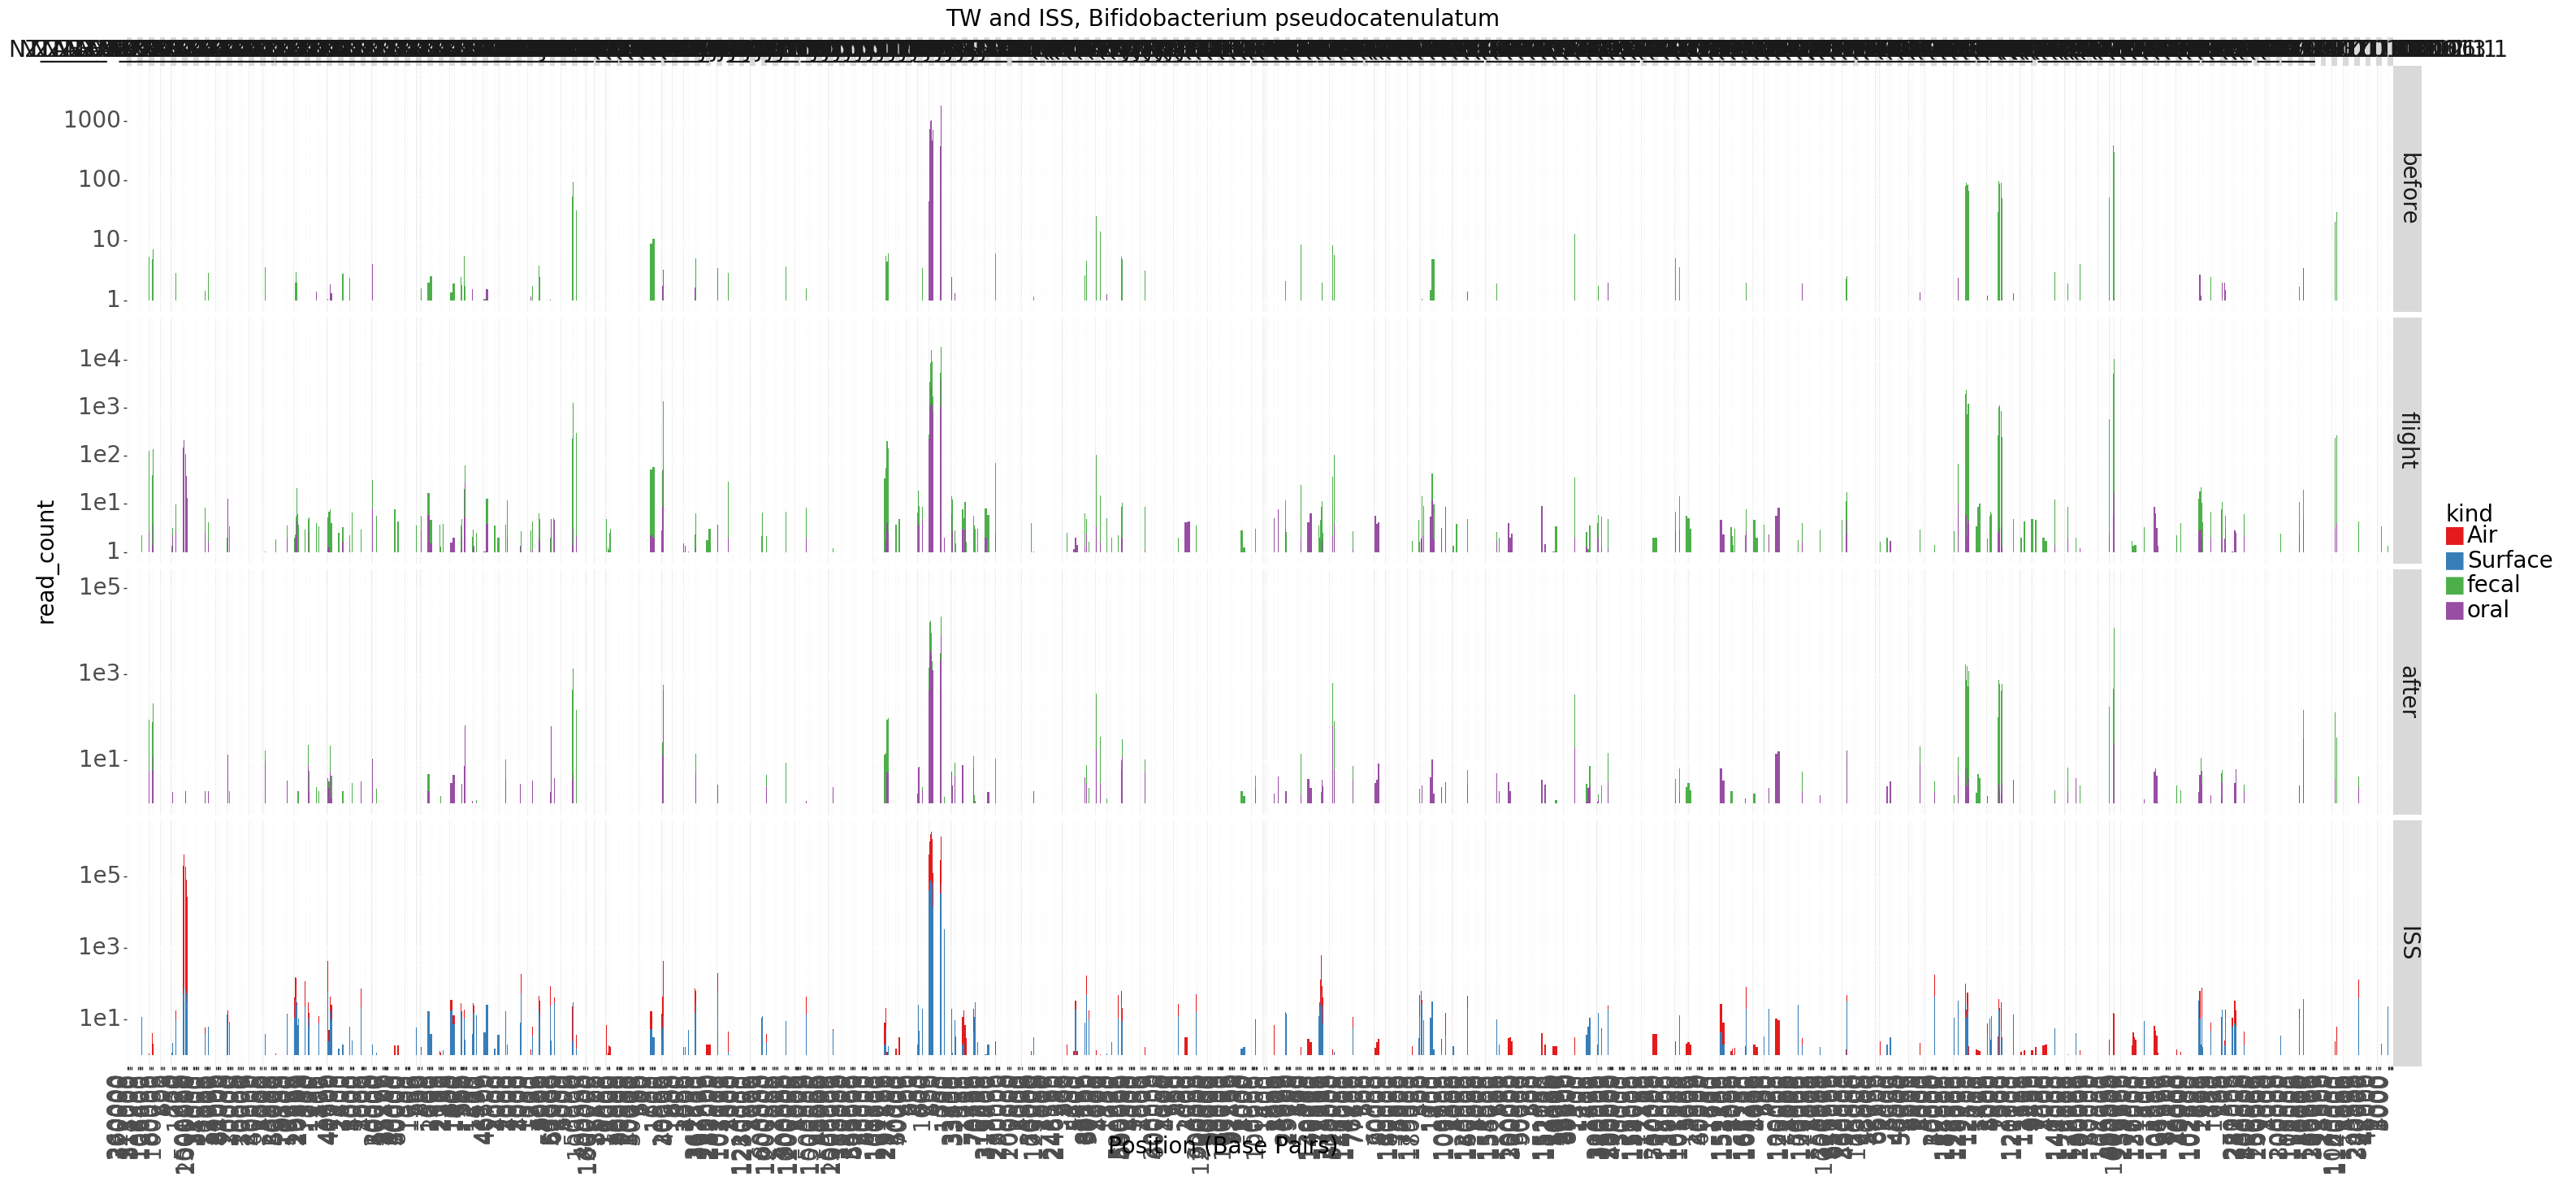

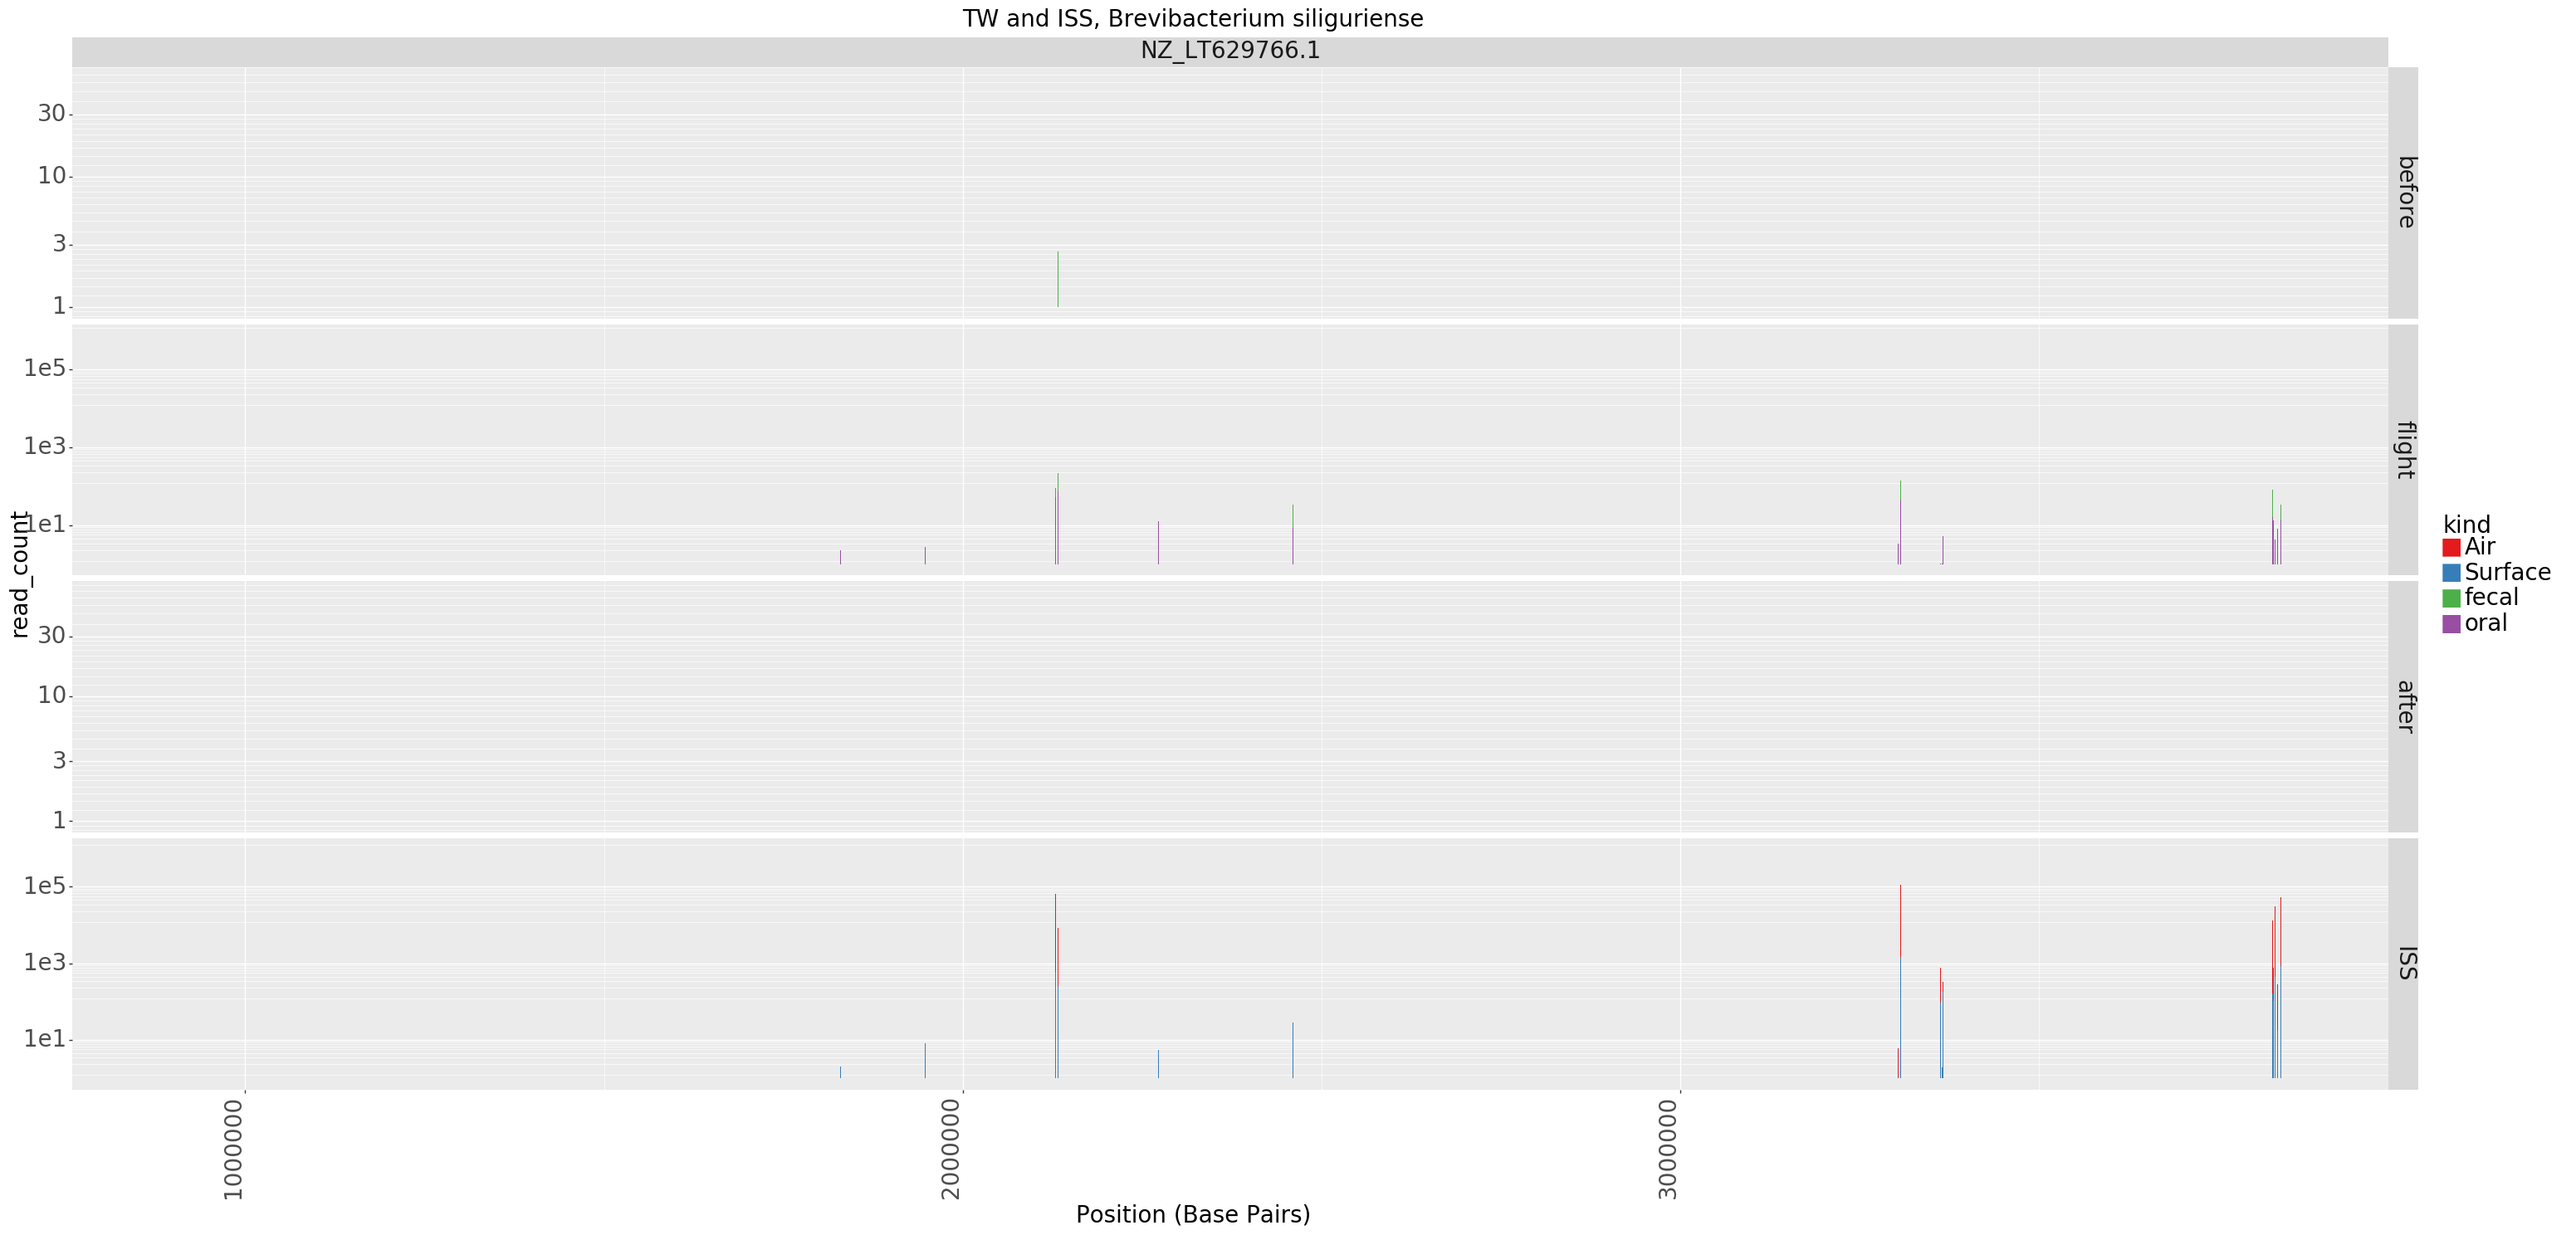

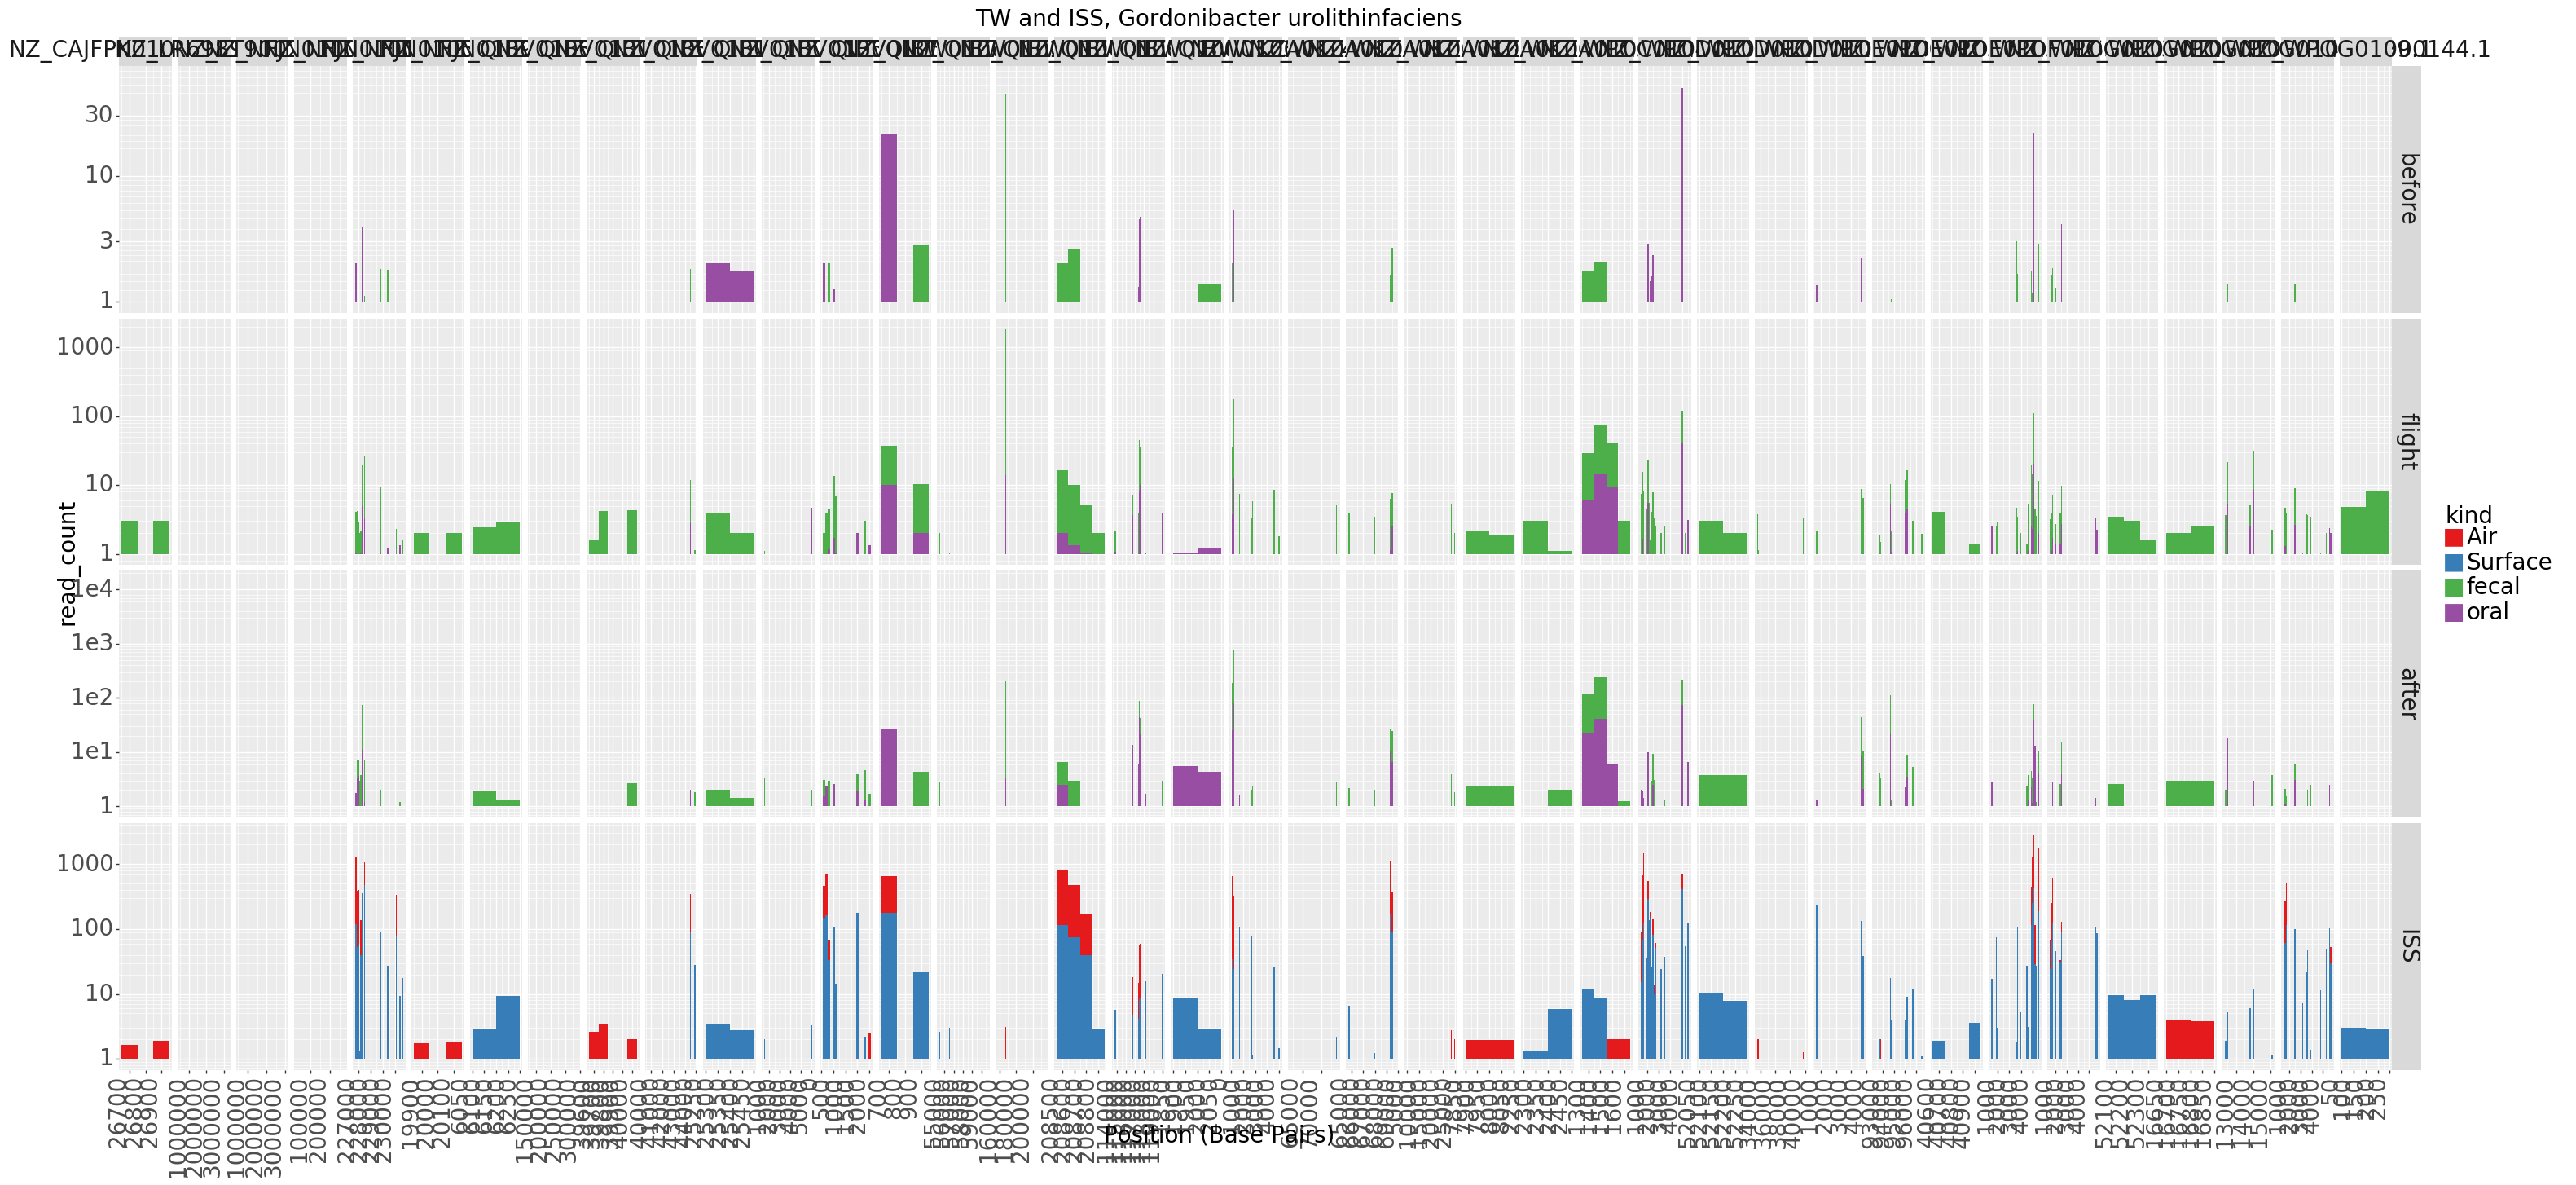

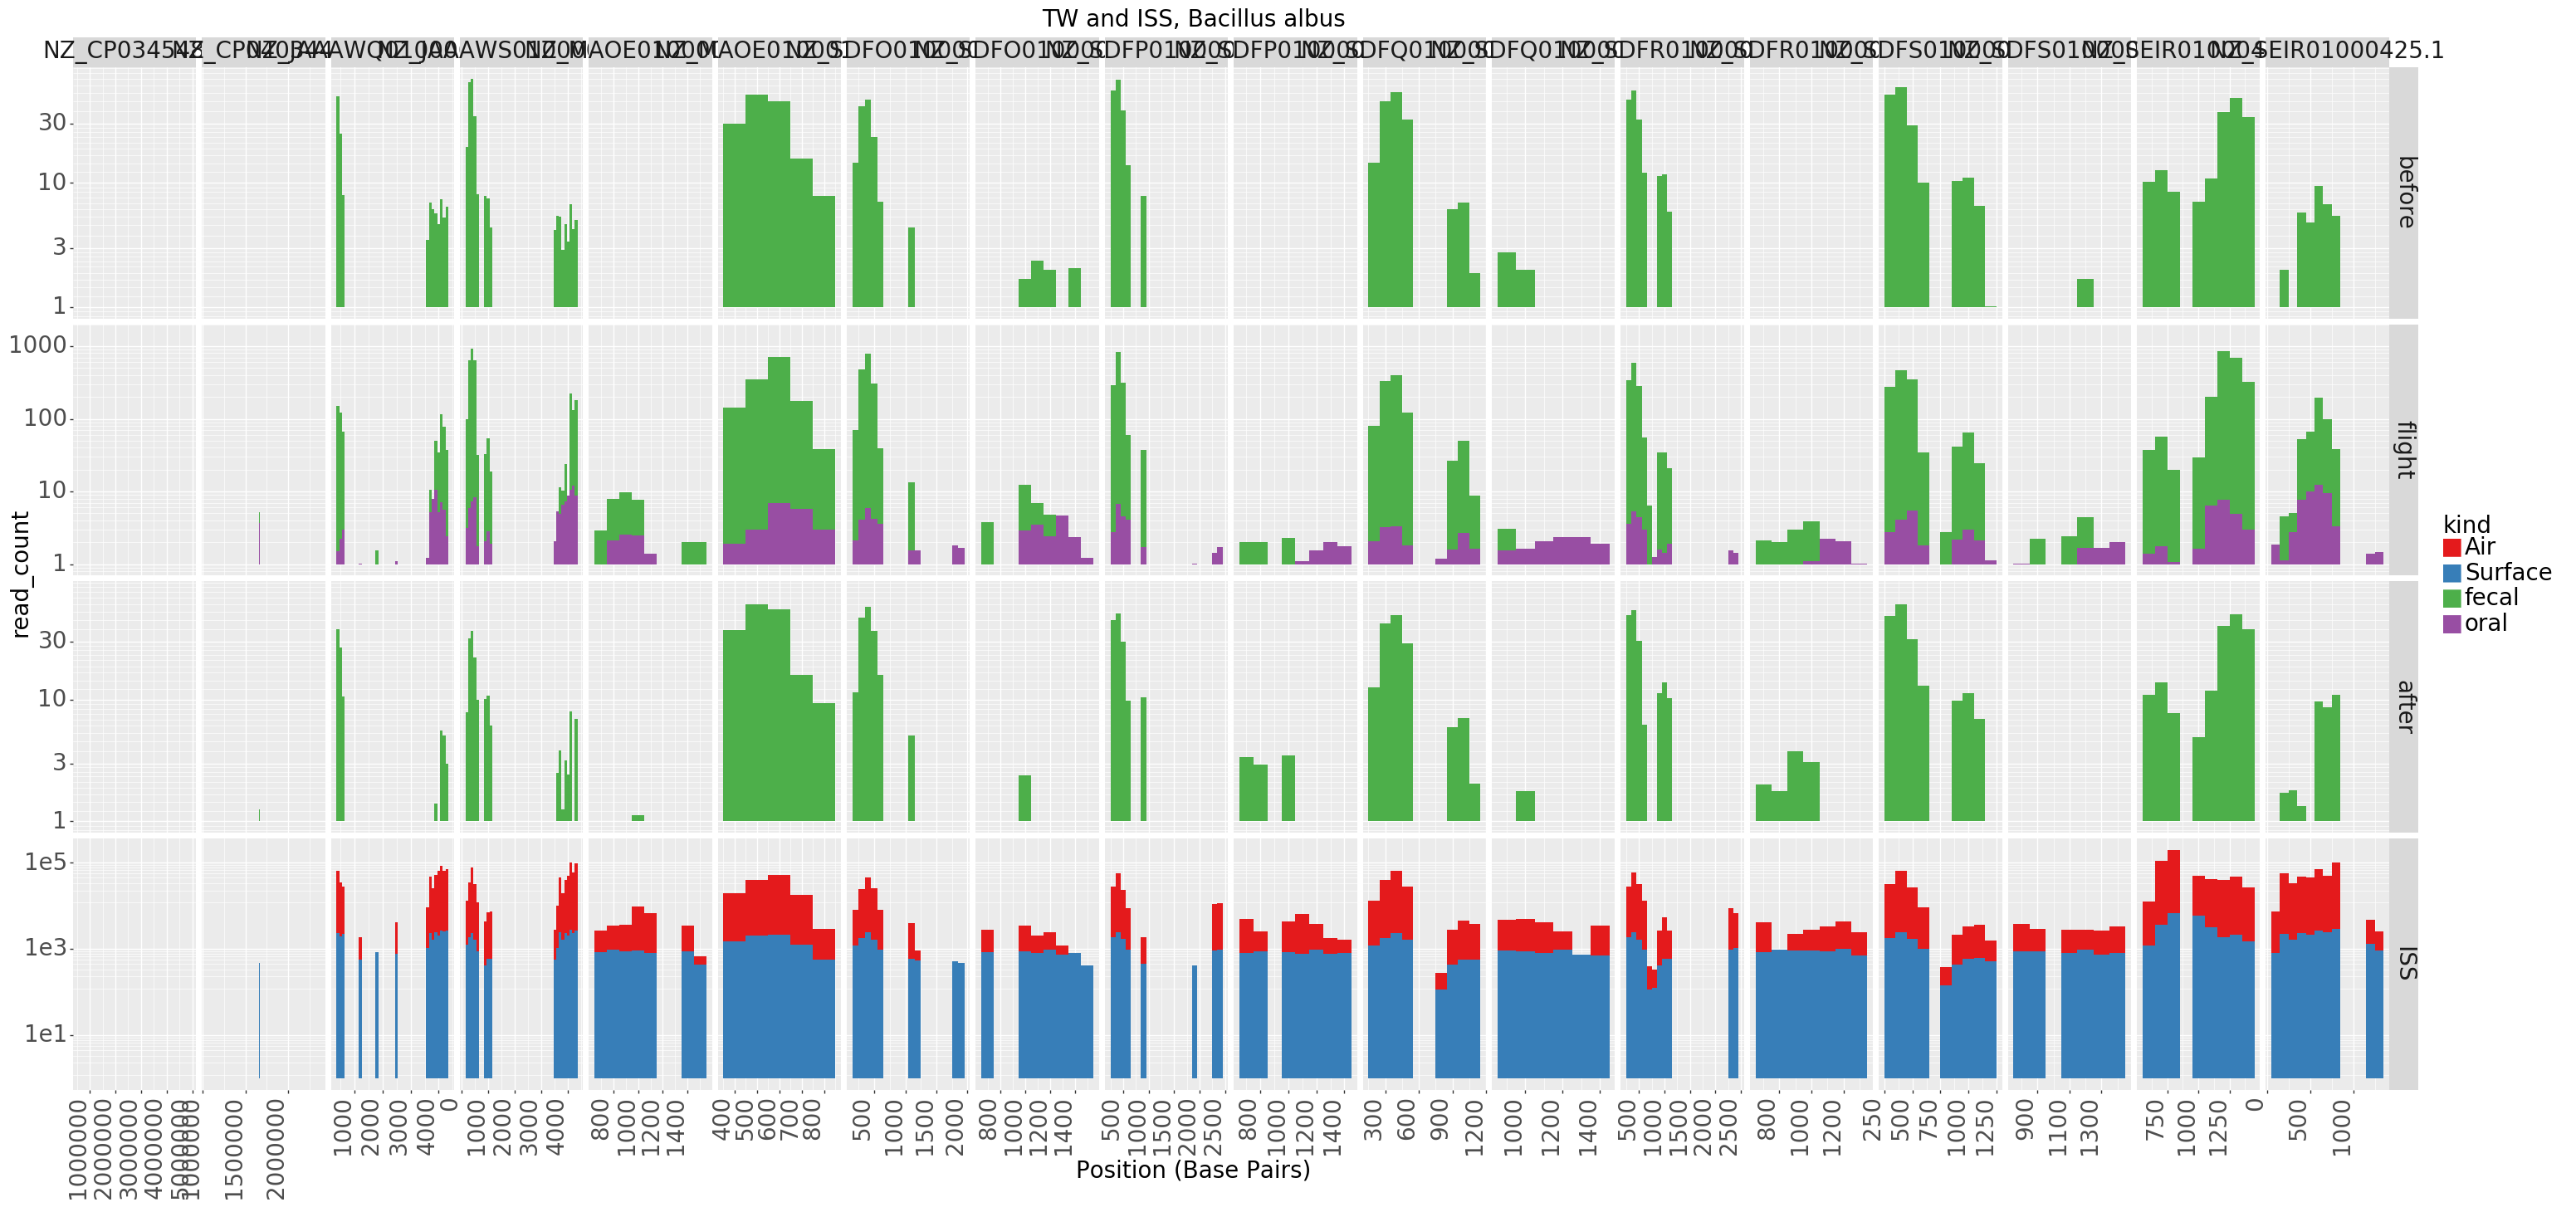

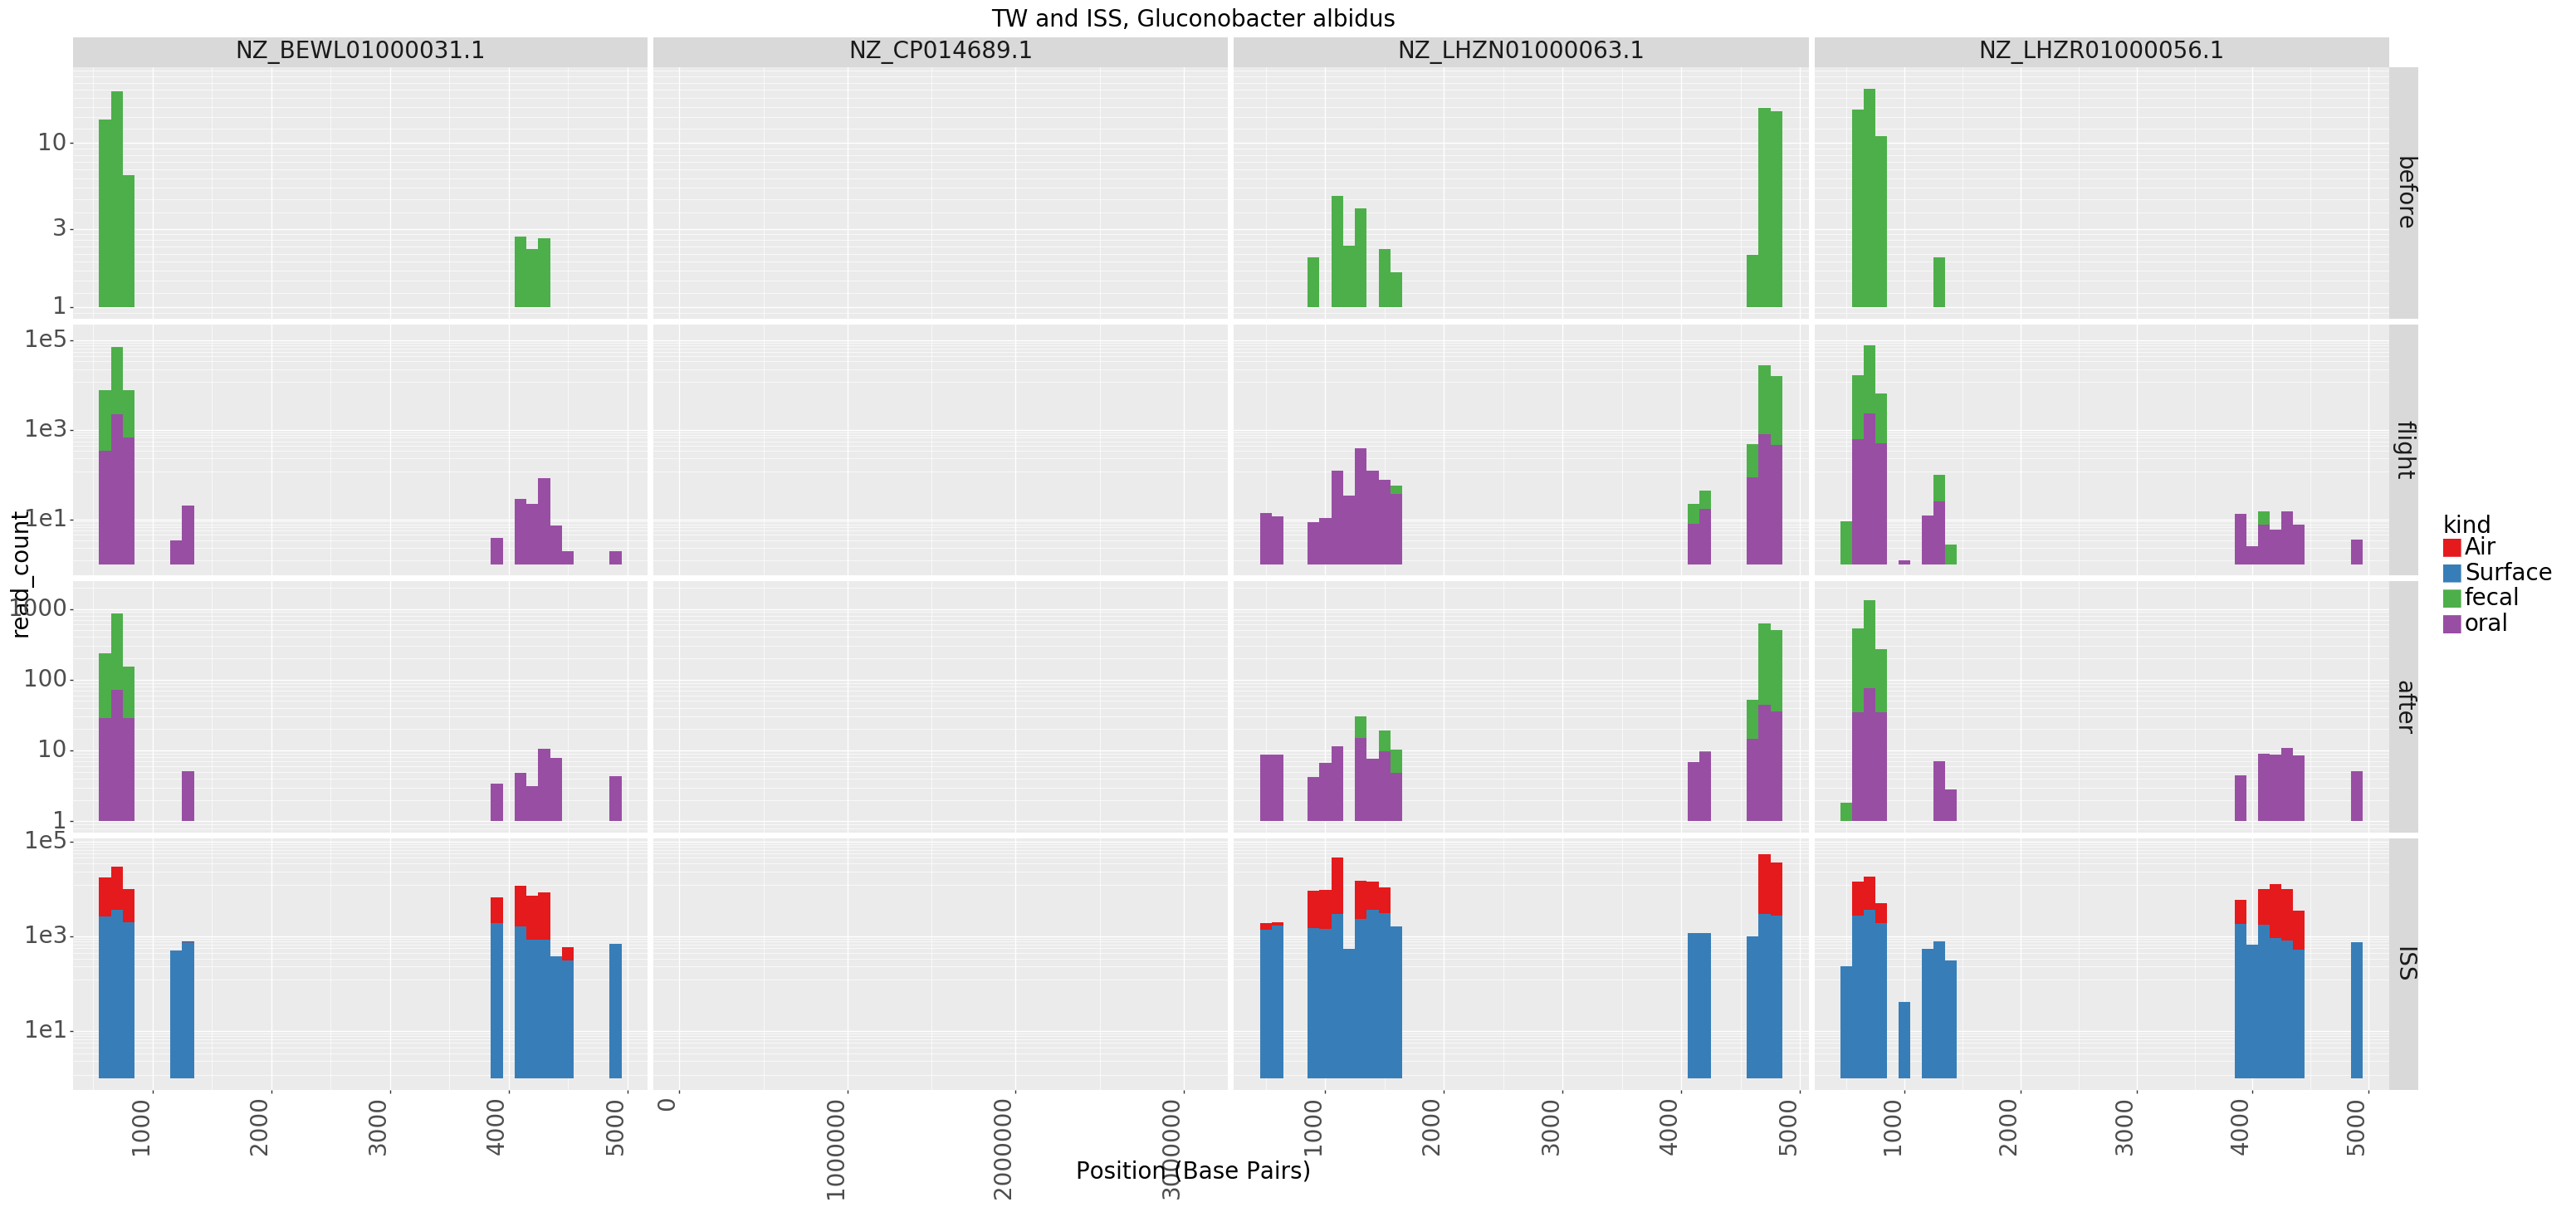

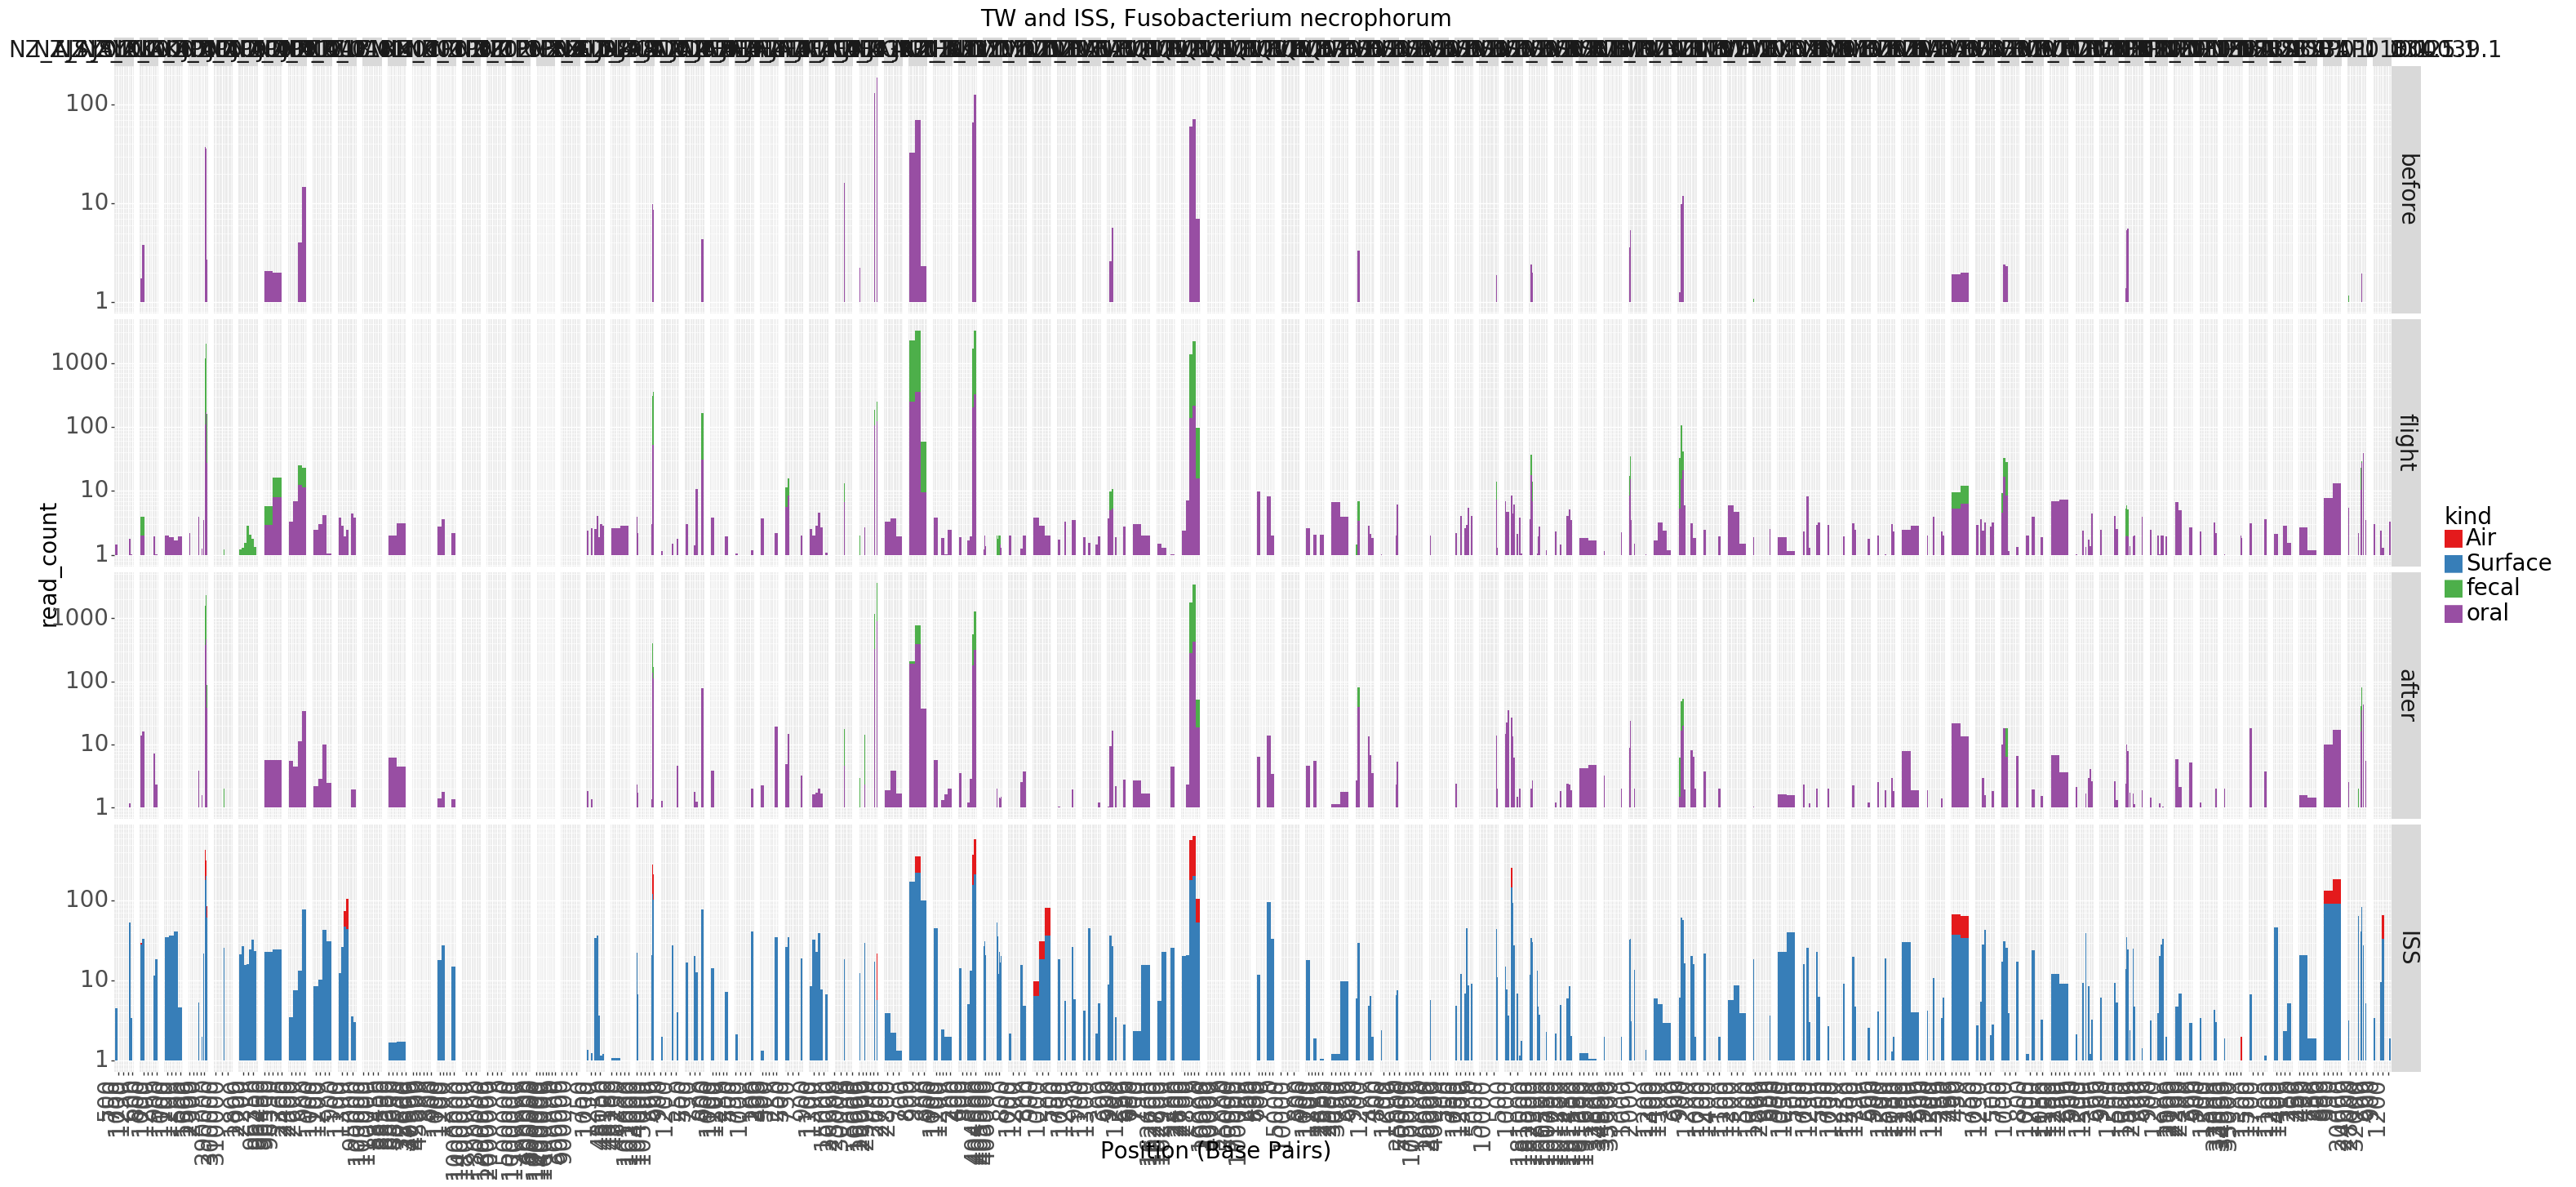

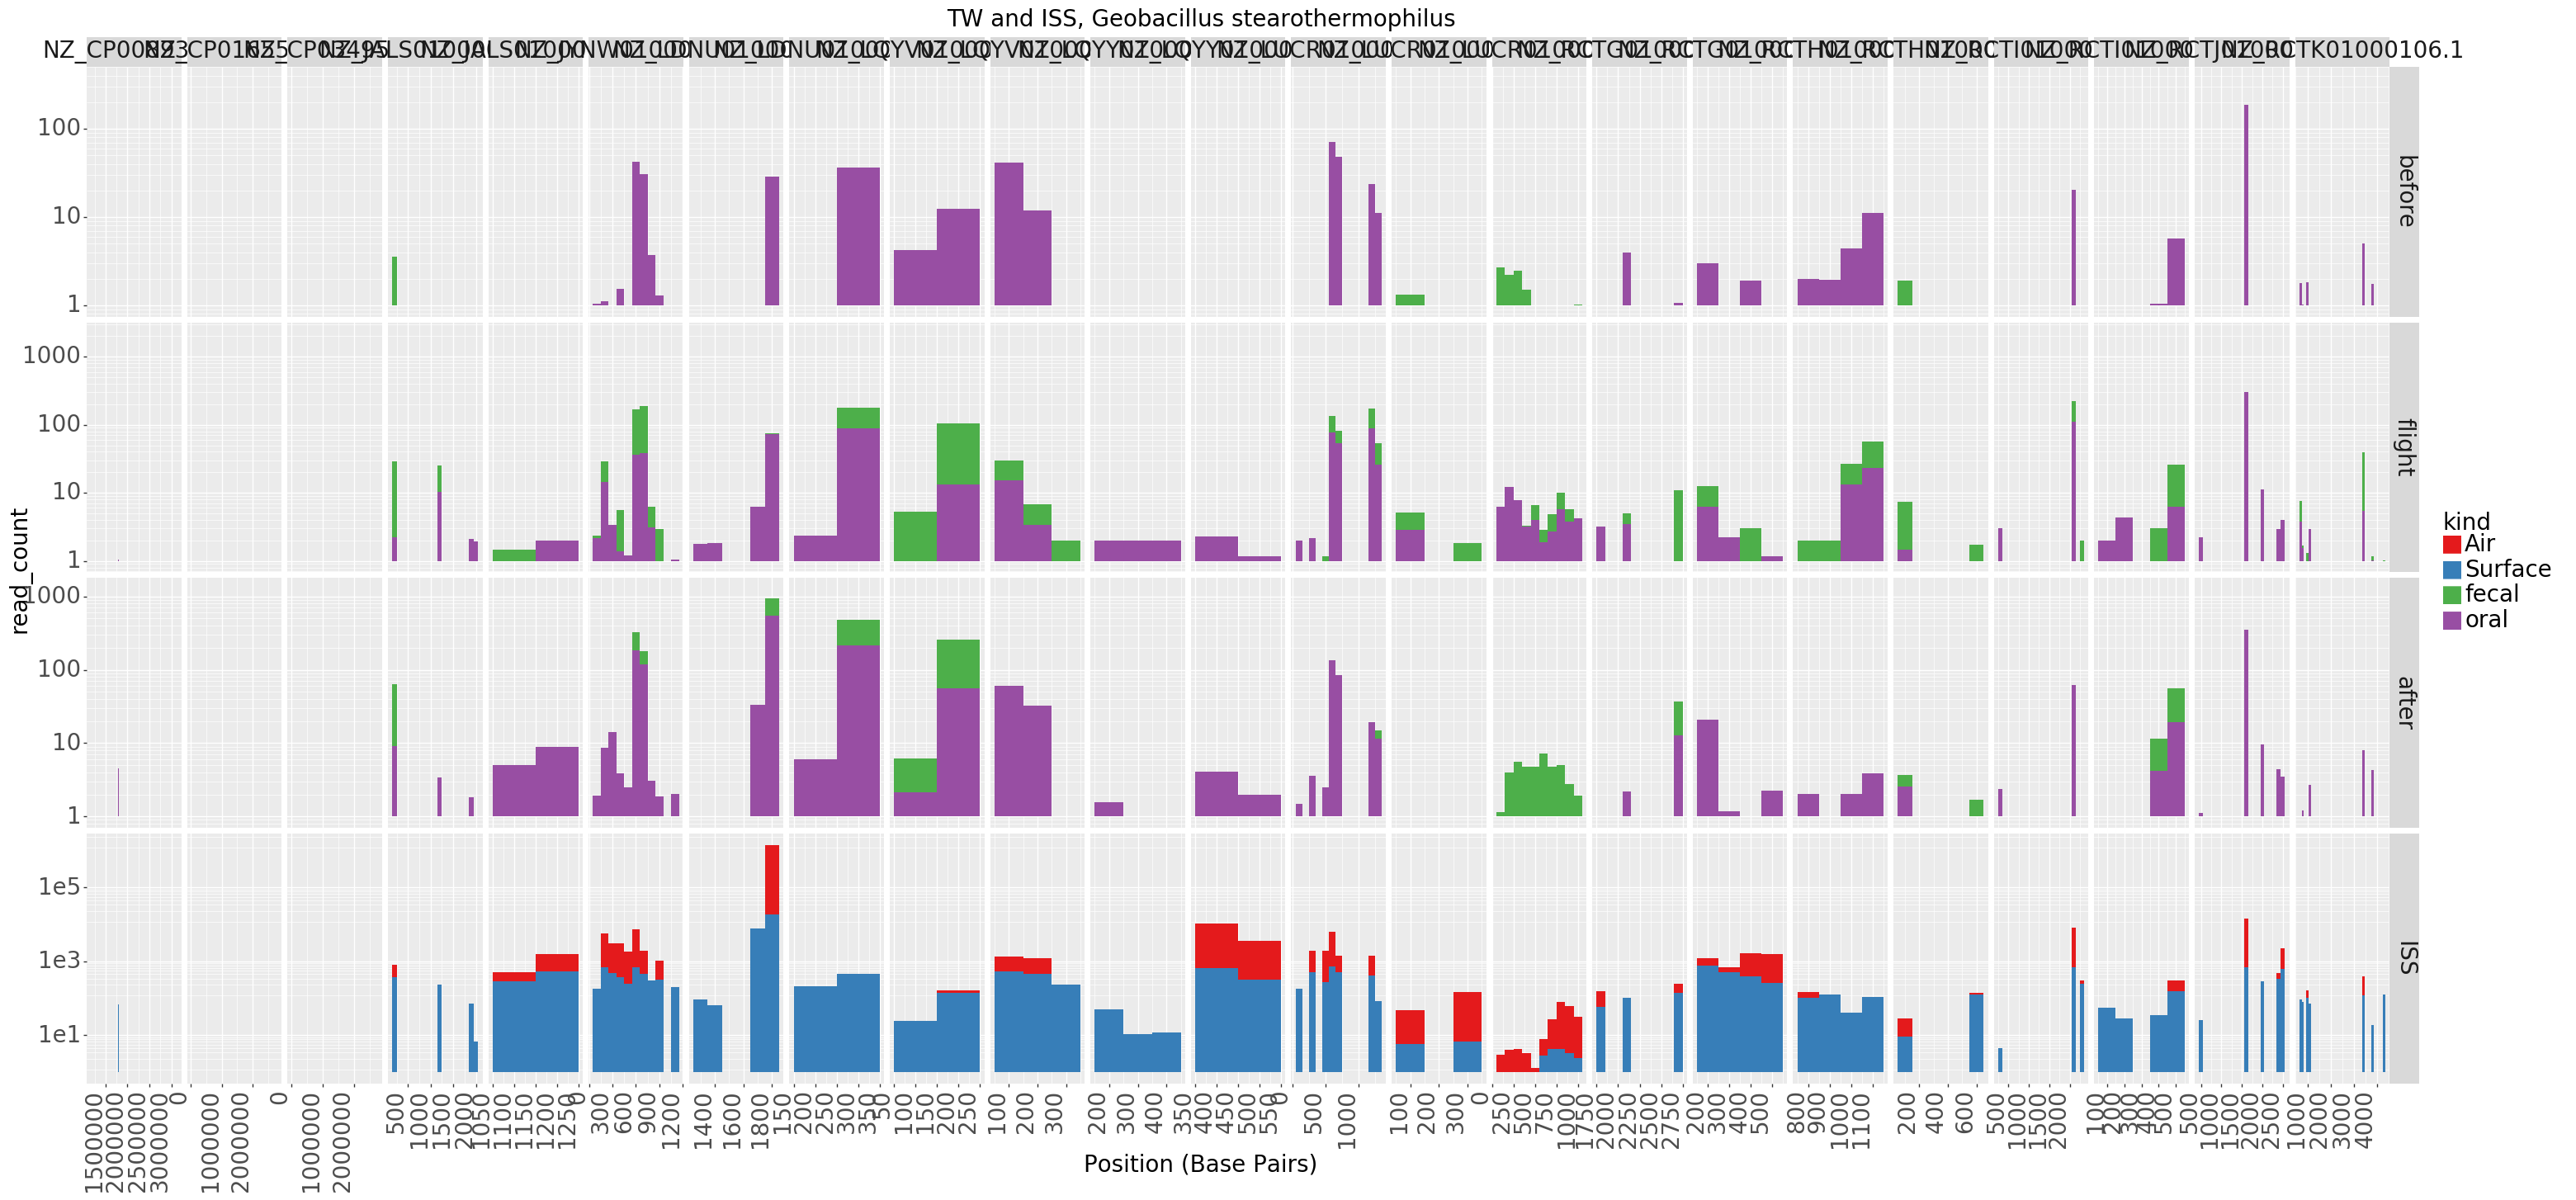

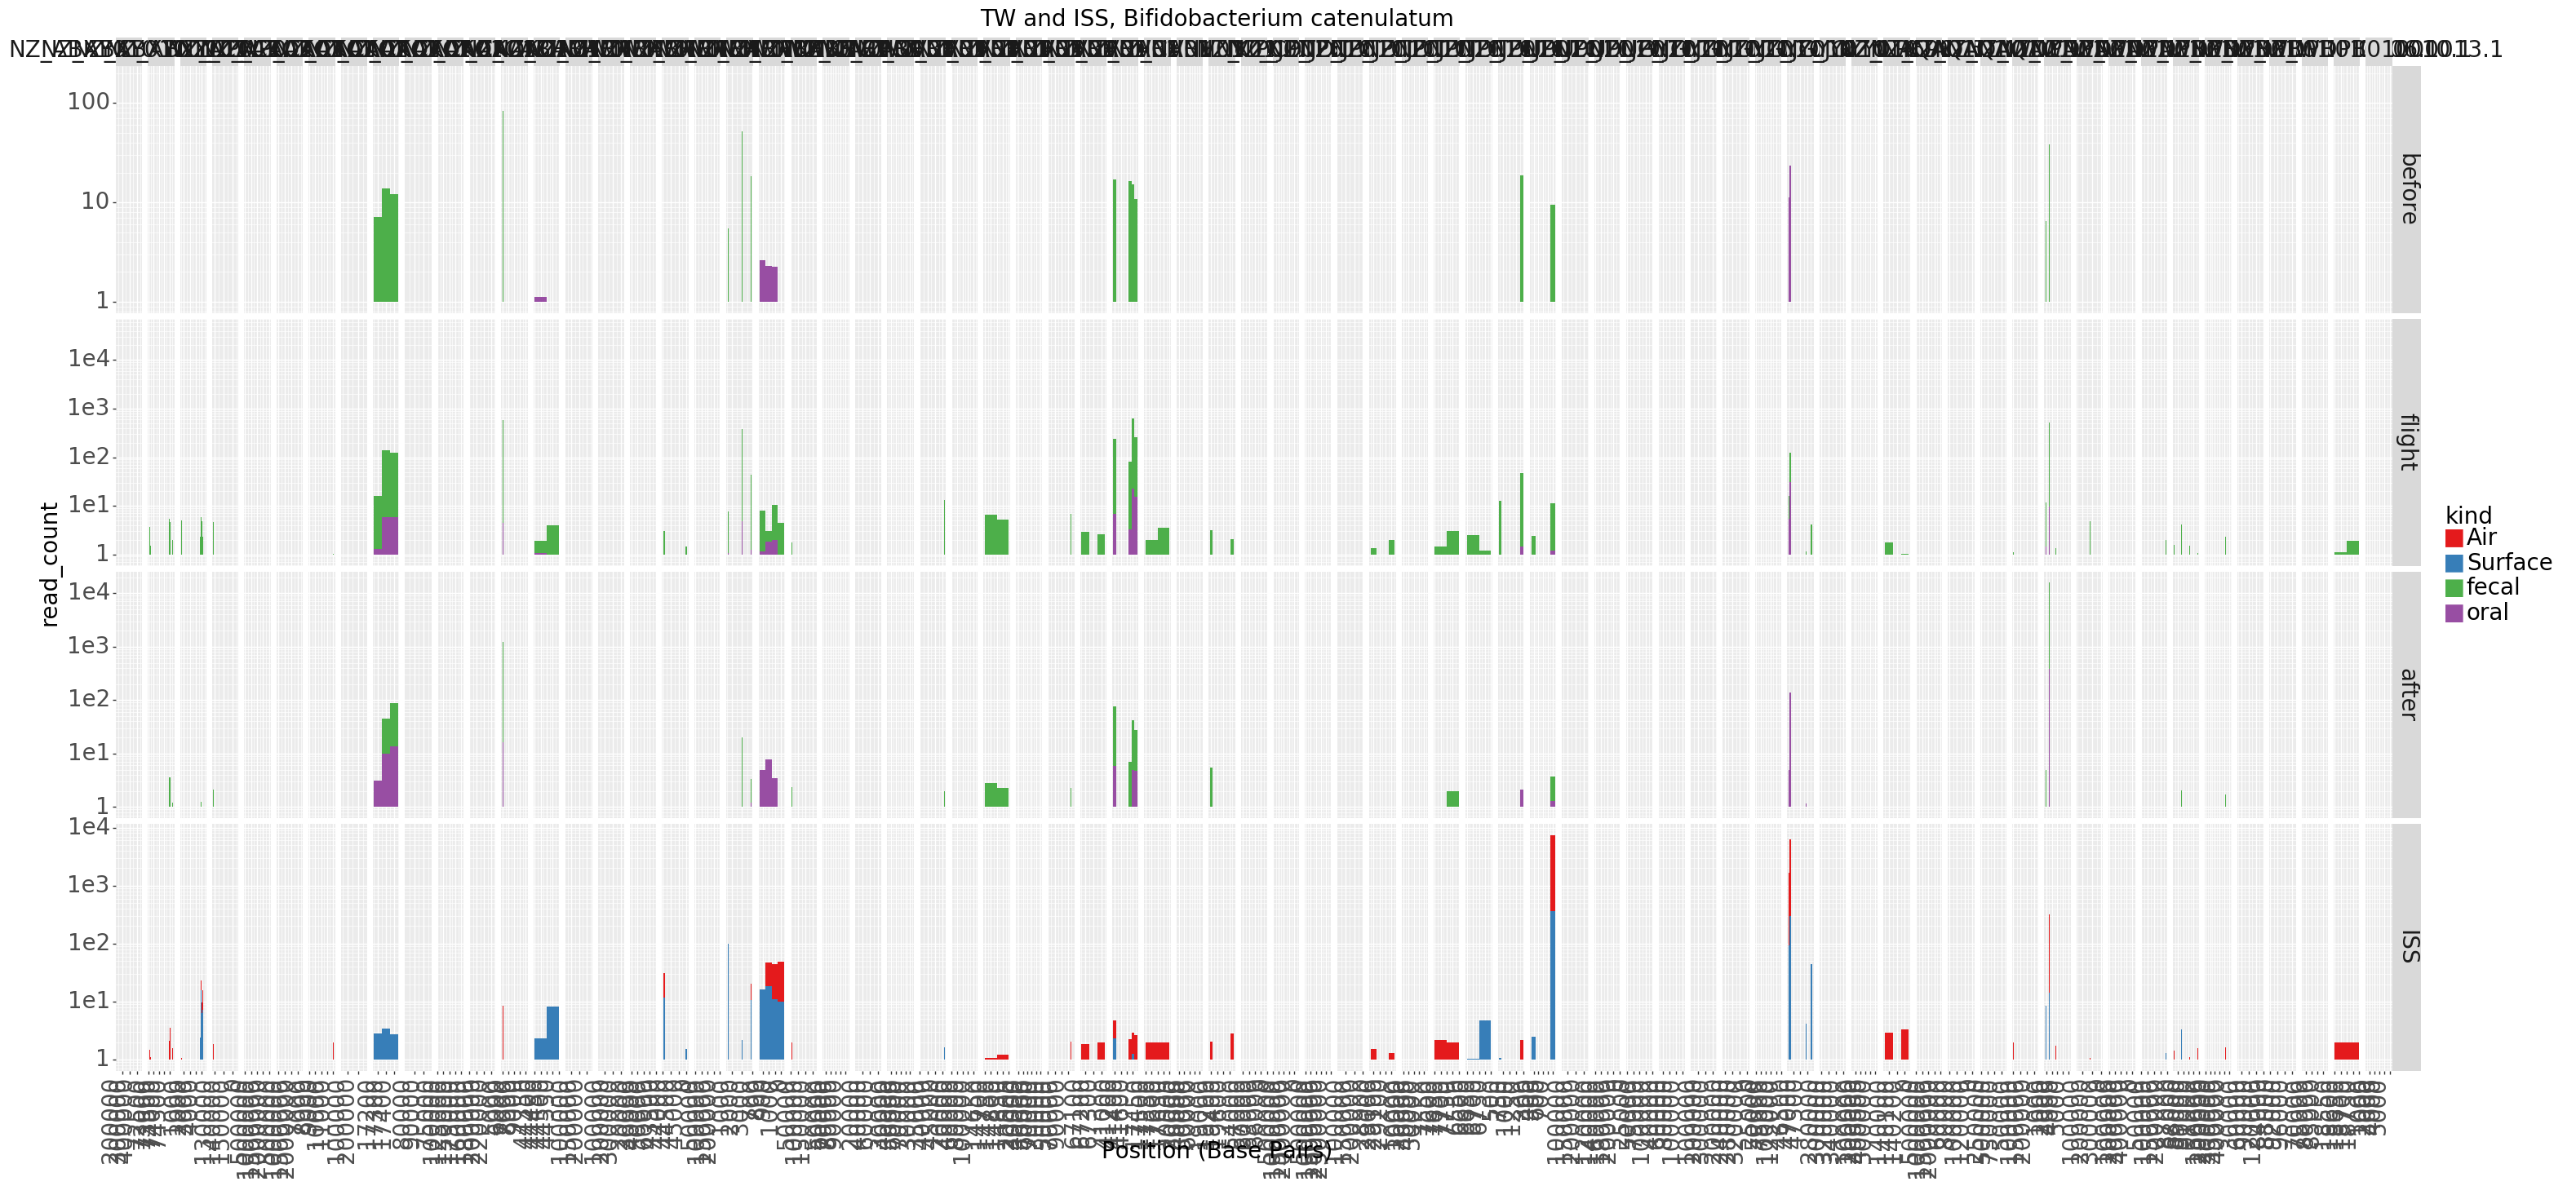

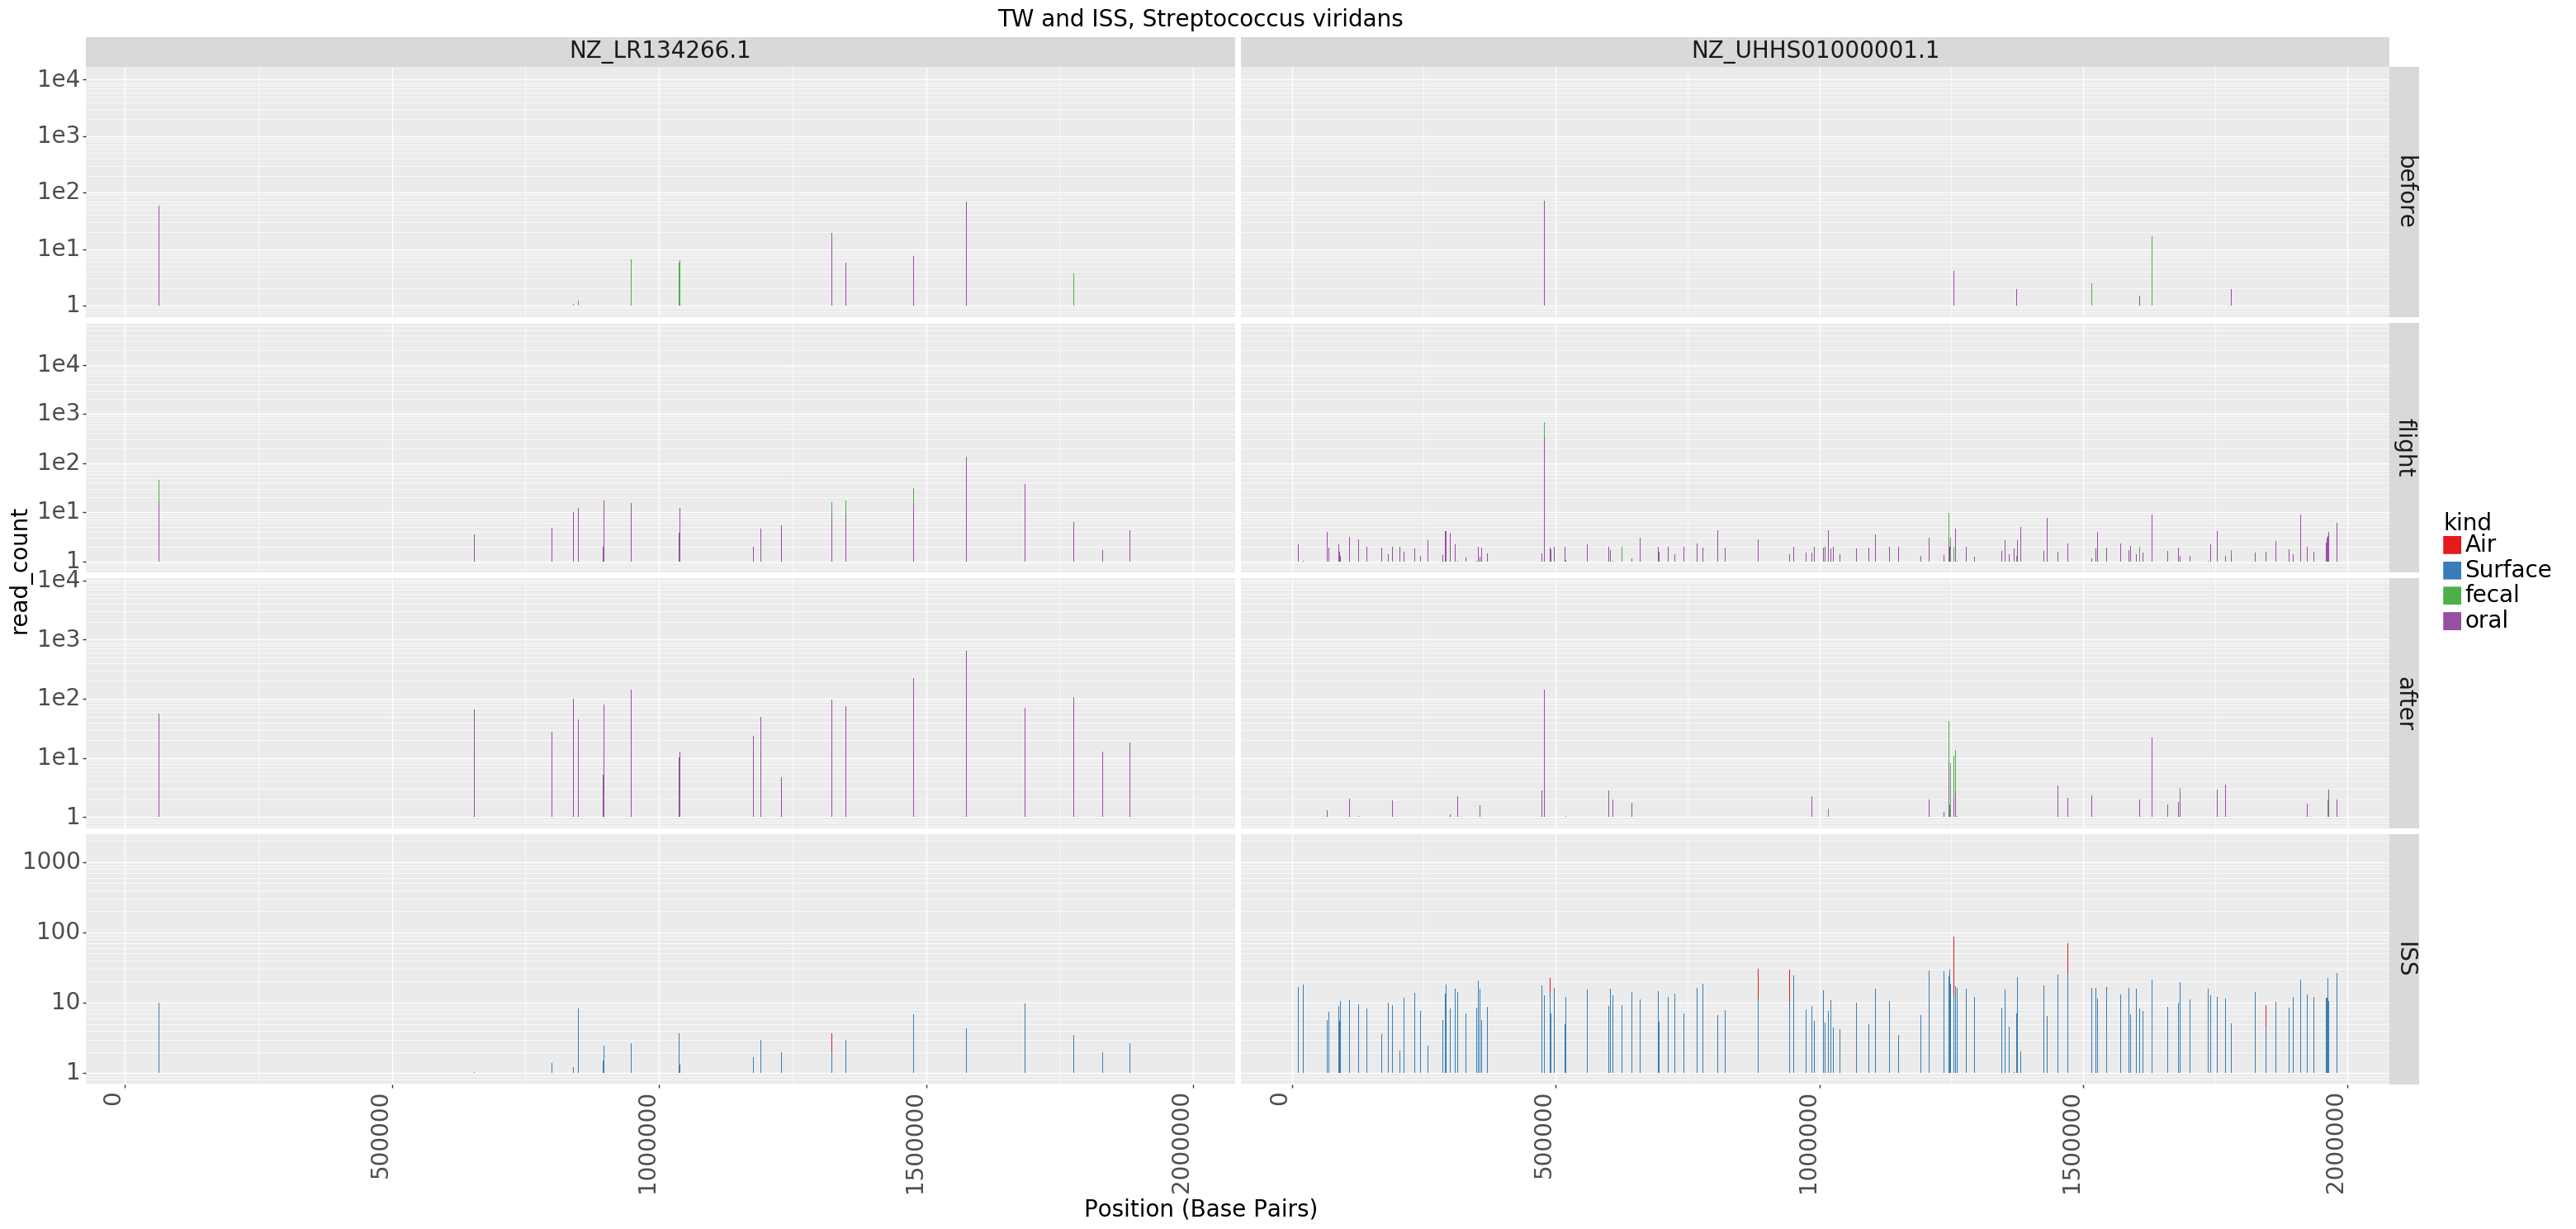

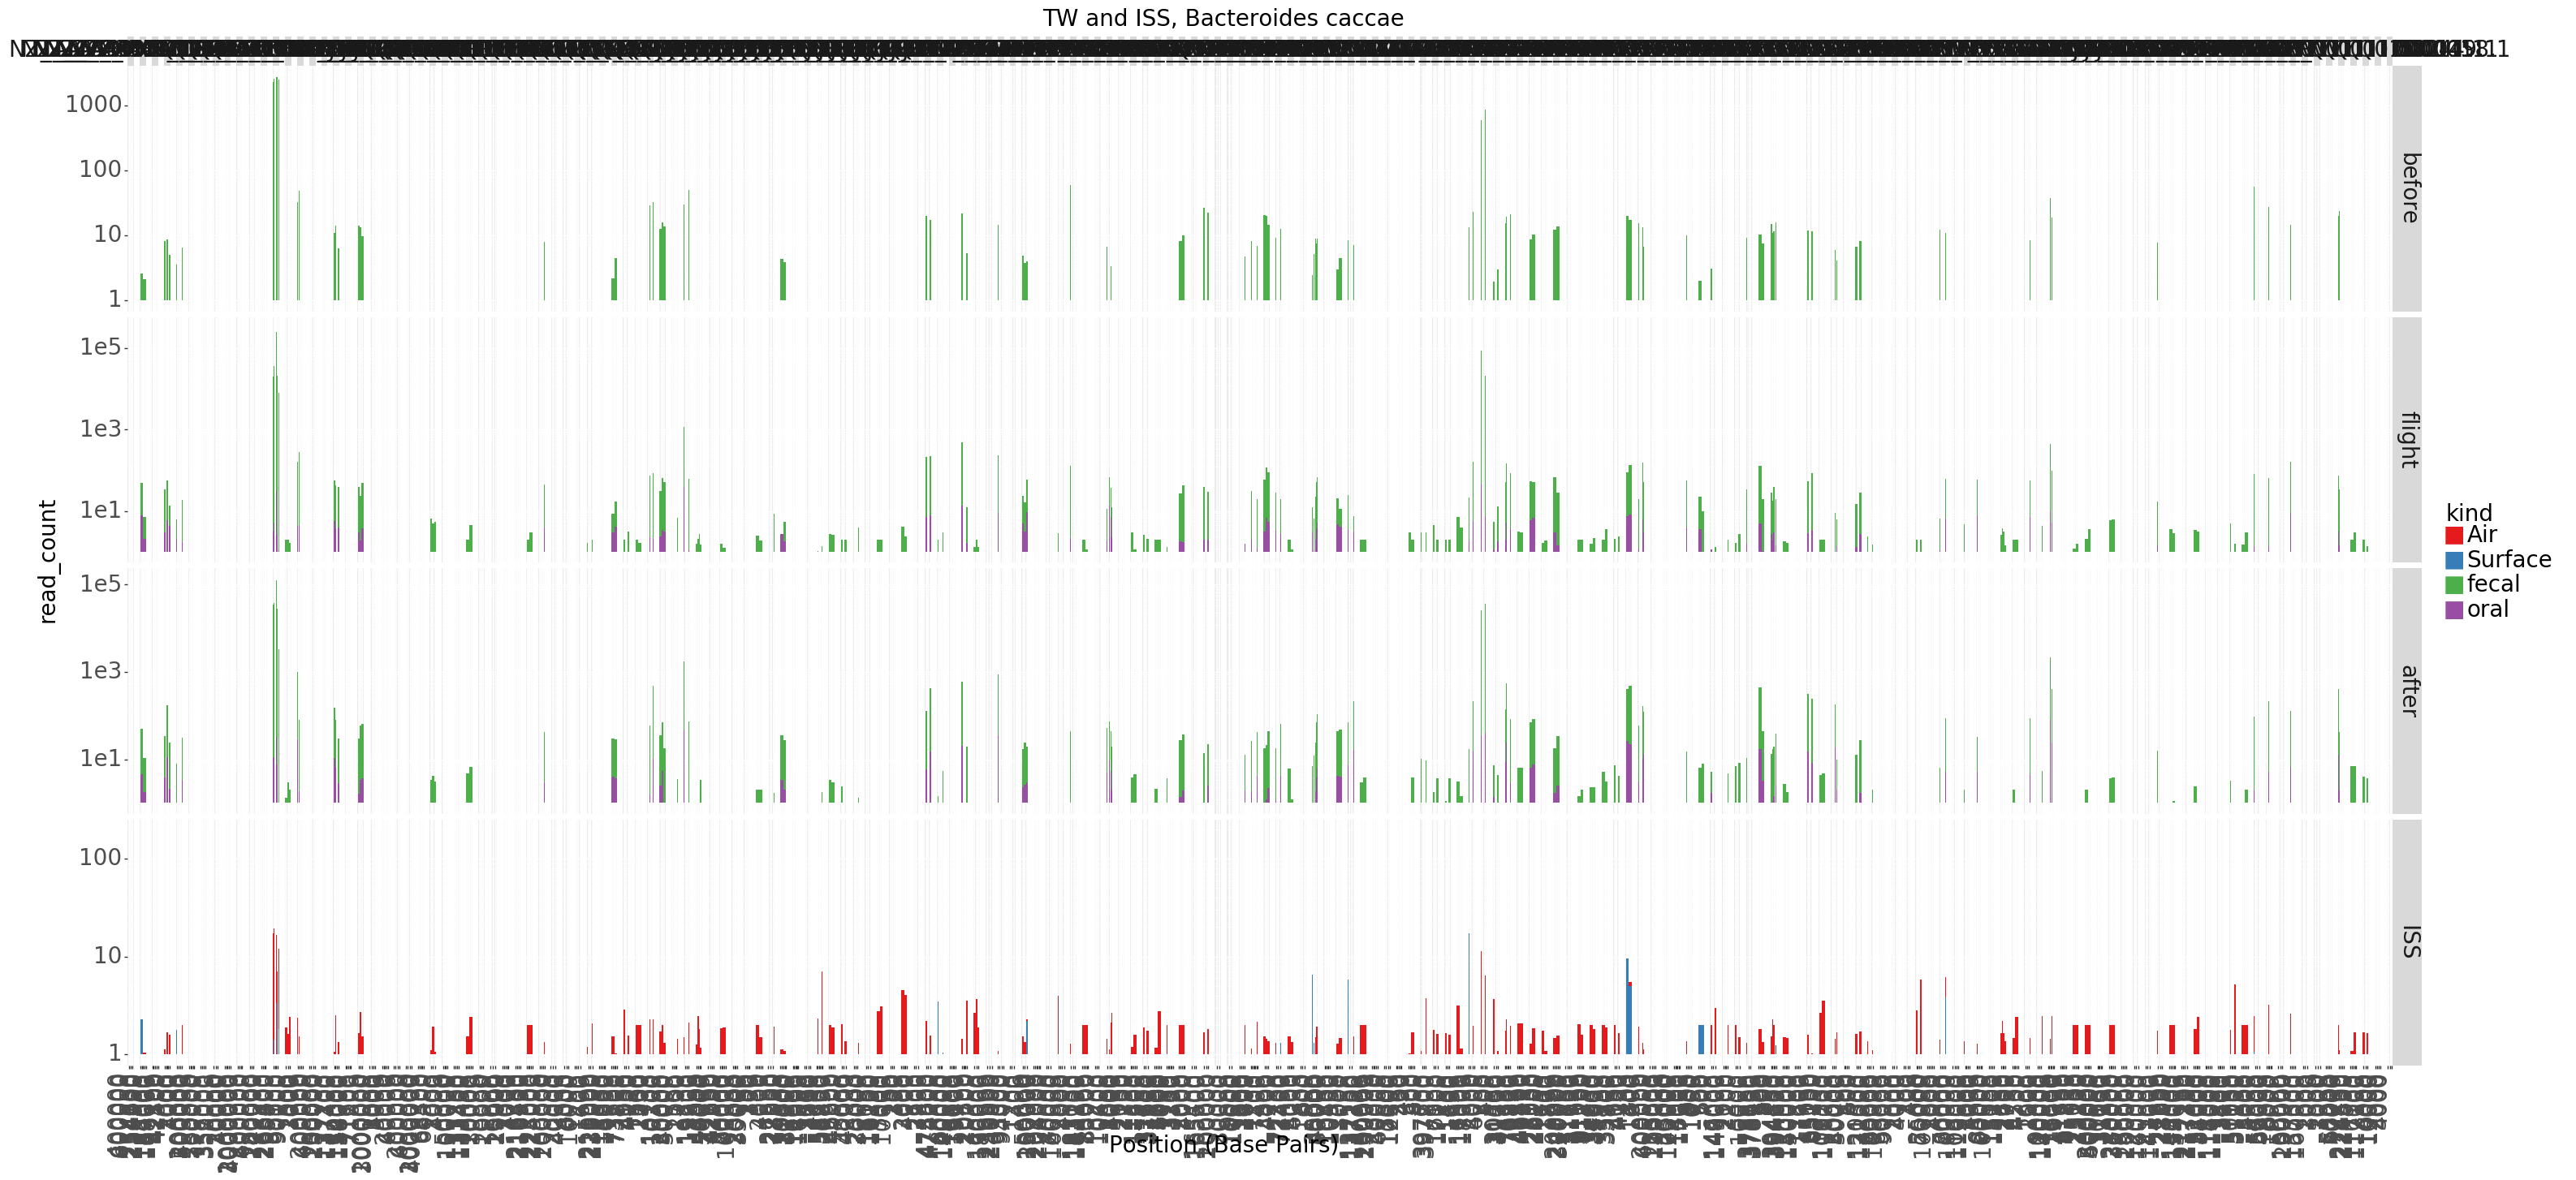

[<ggplot: (8785943928524)>,
 <ggplot: (8785945012558)>,
 <ggplot: (8785945012698)>,
 <ggplot: (-9223363250928086759)>,
 <ggplot: (8785939562781)>,
 <ggplot: (-9223363250915212821)>,
 <ggplot: (8785870736353)>,
 <ggplot: (-9223363250953431173)>,
 <ggplot: (8785901342742)>,
 <ggplot: (8785941482767)>]

In [63]:
organisms = list(counts['true_transfer'].sort_values(ascending=False).head(10).index)
plots = [plot_organism(org) for org in organisms]

plots

In [64]:
transferred['Serratia proteamaculans']

(                     seq     pos         oral       fecal                 both
 438          NC_009832.1  298700    transient     unknown  mixed_part_transfer
 482          NC_009832.1  303300  no_transfer  persistent  mixed_part_transfer
 497          NC_009832.1  308500   persistent     unknown  mixed_part_transfer
 646          NC_009832.1  337000  no_transfer  persistent  mixed_part_transfer
 647          NC_009832.1  337100  no_transfer   transient  mixed_part_transfer
 ...                  ...     ...          ...         ...                  ...
 18683  NZ_WBKI01000015.1     200  no_transfer   transient  mixed_part_transfer
 18696  NZ_WBKI01000015.1    1600   persistent     unknown  mixed_part_transfer
 18697  NZ_WBKI01000015.1    1700  no_transfer   transient  mixed_part_transfer
 18714  NZ_WBKI01000019.1     100  no_transfer   transient  mixed_part_transfer
 18725  NZ_WBKI01000021.1     500   persistent     unknown  mixed_part_transfer
 
 [158 rows x 5 columns],
      time_la

In [67]:
figs.pileup('Serratia proteamaculans', sparse=1)

seq     pos ref_base  read_count read_results quality  \
0      NZ_MQMS01000019.1     624        N           1          ^!T       F   
1      NZ_MQMS01000019.1     625        N           1            T       F   
2      NZ_MQMS01000019.1     626        N           1            G       F   
3      NZ_MQMS01000019.1     627        N           1            C       F   
4      NZ_MQMS01000019.1     628        N           1            A       F   
...                  ...     ...      ...         ...          ...     ...   
20199  NZ_MQMT01000008.1  226733        N           1            a       <   
20200  NZ_MQMT01000008.1  226734        N           1            t       <   
20201  NZ_MQMT01000008.1  226735        N           1            a       B   
20202  NZ_MQMT01000008.1  226736        N           1            t       B   
20203  NZ_MQMT01000008.1  226737        N           1           c$       B   

       sample_name  
0      011515_TW_B  
1      011515_TW_B  
2      011515_TW_B  
3      011515_TW_B  
4      011515_TW_B  
...            ...  
20199      IIIF6SW  
20200      IIIF6SW  
20201      IIIF6SW  
20202      IIIF6SW  
20203      IIIF6SW  

[37902946 rows x 7 columns]

In [68]:
figs.pileup('Fusobacterium necrophorum', sparse=1)

seq   pos ref_base read_count read_results quality  \
0    NZ_FMXX01000067.1  3501        N          1          ^!A       F   
1    NZ_FMXX01000067.1  3502        N          1            A       F   
2    NZ_FMXX01000067.1  3503        N          1            T       F   
3    NZ_FMXX01000067.1  3504        N          1            A       F   
4    NZ_FMXX01000067.1  3505        N          0            *       *   
..                 ...   ...      ...        ...          ...     ...   
132  NZ_NPNE01000033.1   635        N          1            c       F   
133  NZ_NPNE01000033.1   636        N          1            a       F   
134  NZ_NPNE01000033.1   637        N          1            g       B   
135  NZ_NPNE01000033.1   638        N          1            c       B   
136  NZ_NPNE01000033.1   639        N          1           c$       B   

     sample_name  
0    011515_TW_B  
1    011515_TW_B  
2    011515_TW_B  
3    011515_TW_B  
4    011515_TW_B  
..           ...  
132      IIIF6SW  
133      IIIF6SW  
134      IIIF6SW  
135      IIIF6SW  
136      IIIF6SW  

[6557178 rows x 7 columns]